# Finetuning tha last year of fine-rune model

In [1]:
import os
ml_code_path='/home/leilapirhaji/mz_embed_engine/ml'
os.chdir(ml_code_path)

import pandas as pd
import importlib
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
import optuna
import imaplib


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
import random
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


#importing fundtion to get encoder info and perfrom tasks 

from get_finetune_encoder import get_finetune_encoder_from_modelID, get_input_data
from freez_encoder import fine_tune_model


import freez_encoder
importlib.reload(freez_encoder)


%who



[neptune] [warning] NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
2024-09-03 00:01:57.910145: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-03 00:01:57.931080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 00:01:57.956819: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 00:01:57.964679: E external/local_xla/xla/stream_executor/c

DataLoader	 LabelEncoder	 TensorDataset	 accuracy_score	 f1_score	 fine_tune_model	 freez_encoder	 get_finetune_encoder_from_modelID	 get_input_data	 
imaplib	 importlib	 label_encoder	 ml_code_path	 nn	 np	 optim	 optuna	 os	 
pd	 precision_score	 random	 recall_score	 roc_auc_score	 torch	 


## gettin the model ID and info

In [2]:
#input data
input_data_location='/home/leilapirhaji/PROCESSED_DATA_2'
finetune_save_dir='/home/leilapirhaji/finetune_frozen_layer' 


#tasks to predict using encoder
task_list_cat=['Benefit BINARY', 'Nivo Benefit BINARY', 'MSKCC BINARY', 'IMDC BINARY', 'Benefit ORDINAL', 'MSKCC ORDINAL', 'IMDC ORDINAL', 'ORR', 'Benefit', 'IMDC', 'MSKCC', 'Prior_2' ]

#survival tasks
task_list_survival=[ 'OS', 'OS_Event', 'PFS', 'PFS_Event' ]

#pre-train model info  - 1
model_id_pretrain_1='RCC-10290'

#model info
model_id_real_1='RCC-35857'
model_neptune_path_real_1='fine-tune-optuna-RCC-10290-recon-real-modified-loss-Aug29'

model_id_rand_1='RCC-35899'
model_neptune_path_rand_1='fine-tune-optuna-RCC-10290-recon-random-modified-loss-Aug29'

finetune_dic = {
    model_id_pretrain_1: {
        'pretrain_model_id': model_id_pretrain_1,
        'model_id_real': model_id_real_1,
        'model_neptune_path_real': model_neptune_path_real_1,
        'model_id_rand': model_id_rand_1,
        'model_neptune_path_rand': model_neptune_path_rand_1
    }
}

for pretrain_id, model_info in finetune_dic.items():

    print (f'evaluating pre-train model: {pretrain_id}')
    model_id_real = model_info['model_id_real']
    model_neptune_path_real = model_info['model_neptune_path_real']
    model_id_rand = model_info['model_id_rand']
    model_neptune_path_rand = model_info['model_neptune_path_rand']

    # Output locations
    output_path_real = f'{finetune_save_dir}/{model_id_real}'
    os.makedirs(output_path_real, exist_ok=True)

    output_path_rand = f'{finetune_save_dir}/{model_id_rand}'
    os.makedirs(output_path_rand, exist_ok=True)


    #get fine-tuning input data 
    (X_data_train, y_data_train, X_data_val, y_data_val, X_data_test, y_data_test)=get_input_data(input_data_location)

    #latent space with fine-tuned initization
    print (f'getting the encoder for: {model_id_real}')
    (encoder_real, Z_train_real, Z_val_real, Z_test_real, y_data_train, y_data_val, y_data_test)=get_finetune_encoder_from_modelID(model_id_real, input_data_location, output_path_rand, ml_code_path, model_neptune_path_real)


    print (f'getting the encoder for: {model_id_rand}')
    #latent space with rand initization
    (encoder_rand, Z_train_rand, Z_val_rand, Z_test_rand, y_data_train, y_data_val, y_data_test)=get_finetune_encoder_from_modelID(model_id_rand, input_data_location, output_path_rand, ml_code_path, model_neptune_path_rand )


   


evaluating pre-train model: RCC-10290
getting the encoder for: RCC-35857


[neptune] [warning] NeptuneWarning: By default, these monitoring options are disabled in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', 'capture_hardware_metrics'. You can set them to 'True' when initializing the run and the monitoring will continue until you call run.stop() or the kernel stops. NOTE: To track the source files, pass their paths to the 'source_code' argument. For help, see: https://docs.neptune.ai/logging/source_code/


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-35857
Deleted existing file at /home/leilapirhaji/finetune_frozen_layer/RCC-35899/RCC-35857_encoder_state.pth


Fetching file...: 0 [00:00, ?/s]

[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-35857/metadata


/home/leilapirhaji/mz_embed_engine/ml/get_finetune_encoder.py:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder_state_dict = torch.load(model_encoder_file, map_locat

getting the encoder for: RCC-35899
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-35899
Deleted existing file at /home/leilapirhaji/finetune_frozen_layer/RCC-35899/RCC-35899_encoder_state.pth


Fetching file...: 0 [00:00, ?/s]

[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-35899/metadata


/home/leilapirhaji/mz_embed_engine/ml/get_finetune_encoder.py:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder_state_dict = torch.load(model_encoder_file, map_locat

In [3]:
Z_train_real.shape, Z_val_real.shape, Z_test_real.shape, Z_train_rand.shape, Z_val_rand.shape, Z_test_rand.shape, y_data_train.shape, y_data_val.shape, y_data_test.shape, X_data_train.shape, X_data_val.shape, X_data_test.shape

((443, 220),
 (149, 220),
 (149, 220),
 (443, 220),
 (149, 220),
 (149, 220),
 (443, 58),
 (149, 58),
 (149, 58),
 (443, 2736),
 (149, 2736),
 (149, 2736))

## Latent Avergaing - training last layer of the encoder to predict classification tasks 

In [4]:
#makign seeds that are the same for all the tasks
#import set_seed
#from set_seed import set_seed
#seed = set_seed(42)  # Explicitly set and save the seed

#with open('/home/leilapirhaji/mz_embed_engine/ml/seed_Aug31.txt', 'w') as f:
#    f.write(str(seed))
#loading the seed file
with open('/home/leilapirhaji/mz_embed_engine/ml/seed_Aug31.txt', 'r') as f:
    seed = int(f.read())

### optuna optimization

In [ ]:
import optuna

import imaplib
import freez_encoder_latent_avg
importlib.reload(freez_encoder_latent_avg)
from freez_encoder_latent_avg import fine_tune_model, FineTuneModel

task='IMDC BINARY'
num_classes = 2

best_model = None  # Variable to store the best model
best_auc = -float('inf')  # Initialize to a very low value to keep track of the best AUC

def objective(trial):
    global best_model, best_auc
    
    # Hyperparameters to optimize
    num_epochs = trial.suggest_int('num_epochs', 10, 40)
    batch_size = trial.suggest_categorical('batch_size', [16, 32])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-2)
    dropout = trial.suggest_uniform('dropout', 0.1, 0.4)
    task_layer_size = trial.suggest_int('task_layer_size', 32, 64, 128)
    l1_reg_weight = trial.suggest_loguniform('l1_reg_weight', 1e-8, 1e-3)
    l2_reg_weight = trial.suggest_loguniform('l2_reg_weight', 1e-8, 1e-3)

    # Perform fine-tuning with the current hyperparameters
    model, metrics = fine_tune_model(
        encoder=encoder_real,  # Your pre-trained encoder
        X_train=X_data_train, 
        y_data_train=y_data_train[task],
        X_val=X_data_val, 
        y_data_val=y_data_val[task], 
        num_classes=num_classes,  # Your number of classes
        num_epochs=num_epochs,
        batch_size=batch_size,
        learning_rate=learning_rate,
        dropout=dropout,
        task_layer_size=task_layer_size,
        l1_reg_weight=l1_reg_weight,
        l2_reg_weight=l2_reg_weight,
        seed=seed  # Set seed for reproducibility
    )
    
    # Use the AUC score from the last epoch as the objective to maximize
    auc = metrics['AUC'].iloc[-1]

    # Save the model if it has the best AUC so far
    if auc > best_auc:
        best_auc = auc
        best_model = model

    #saving the best model
    torch.save(best_model, f'{finetune_save_dir}/best_model.pth')  # Save the best model

    return auc


# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(f"Best trial: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")


#### getting optuna information

In [31]:
# Convert the study trials to a DataFrame
trials_df = study.trials_dataframe()

# Extract relevant columns: AUC and hyperparameters
trials_df = trials_df[['number', 'value', 'params_num_epochs', 'params_batch_size', 'params_learning_rate', 'params_dropout', 'params_task_layer_size', 'params_l1_reg_weight', 'params_l2_reg_weight']]
trials_df.rename(columns={
    'number': 'Trial Number',
    'value': 'AUC',
    'params_num_epochs': 'Num Epochs',
    'params_batch_size': 'Batch Size',
    'params_learning_rate': 'Learning Rate',
    'params_dropout': 'Dropout',
    'params_task_layer_size': 'Task Layer Size',
    'params_l1_reg_weight': 'L1 Reg Weight',
    'params_l2_reg_weight': 'L2 Reg Weight'
}, inplace=True)

trials_df.to_csv(f'{finetune_save_dir}/optuna_trials_results.csv', index=False)

# Display the DataFrame
trials_df.head()


,Trial Number,AUC,Num Epochs,Batch Size,Learning Rate,Dropout,Task Layer Size,L1 Reg Weight,L2 Reg Weight
0,0,85.664336,19,32,0.000003,0.224120,32,7.435146e-06,1.863977e-06
1,1,84.149184,31,16,0.000686,0.284627,32,8.519621e-05,3.486407e-04
2,2,82.284382,22,32,0.000451,0.329598,32,5.518249e-06,2.054114e-04
3,3,82.517483,29,16,0.000295,0.228226,32,3.239965e-05,1.539170e-04
4,4,87.062937,32,16,0.000001,0.368849,32,1.051749e-07,5.229557e-08


In [12]:
## loading the best model

# Load the best model
#best_model = FineTuneModel()  # Replace with your model class
best_model.load_state_dict(torch.load(f'{finetune_save_dir}/best_model.pth'))



/var/tmp/ipykernel_1326567/2728821347.py:5: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



<All keys matched successfully>

In [9]:
try:
    import optuna.visualization as vis
    vis.plot_optimization_history(study).show()
    vis.plot_param_importances(study).show()
except ImportError:
    print("Optuna visualization is not available. Install optuna[visualization] for plotting.")


#### getting the best model

In [ ]:
# Load the entire model
best_model = torch.load(f'{finetune_save_dir}/best_model_IMDC_latent_avg.pth')

#### predicting the best model on the test data

In [58]:

import best_model_test_eval
importlib.reload(best_model_test_eval)
from best_model_test_eval import evaluate_model



### Training data
# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_data_train.values, dtype=torch.float32)

latent_reps_train = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_train_tensor)[0]  # Assuming first output is mu
    latent_reps_train.append(latent_rep)

latent_rep_train = torch.mean(torch.stack(latent_reps_train), dim=0)



### Validation data
# Convert pandas DataFrames to PyTorch tensors
X_val_tensor = torch.tensor(X_data_val.values, dtype=torch.float32)

latent_reps_val = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_val_tensor)[0]  # Assuming first output is mu
    latent_reps_val.append(latent_rep)

latent_rep_val = torch.mean(torch.stack(latent_reps_val), dim=0)


### Test data
# Convert pandas DataFrames to PyTorch tensors
X_test_tensor = torch.tensor(X_data_test.values, dtype=torch.float32)

latent_reps_test = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_test_tensor)[0]  # Assuming first output is mu
    latent_reps_test.append(latent_rep)

latent_rep_test = torch.mean(torch.stack(latent_reps_test), dim=0)



# # Evaluate on the test set

best_model.eval()  # Set the model to evaluation mode
best_model.latent_mode=True
repeat=10
test_auc=[]
train_auc=[]
val_auc=[] 

for i in range(repeat):

    train_metrics = evaluate_model(
        best_model, 
        latent_rep_train, 
        y_data_train[task], 
        num_classes,
        seed,
        32
    )
  
    val_metrics = evaluate_model(
        best_model, 
        latent_rep_val, 
        y_data_val[task], 
        num_classes,
        seed,
        32
    )

    test_metrics = evaluate_model(
        best_model, 
        latent_rep_test, 
        y_data_test[task], 
        num_classes,
        seed,
        32
    )

    train_auc.append(train_metrics['AUC'])
    val_auc.append(val_metrics['AUC'])
    test_auc.append(test_metrics['AUC'])


train_auc, val_auc, test_auc



Validation Loss: 0.0, Accuracy: 62.58064516129033%, Precision: 82.35294117647058%, Recall: 20.28985507246377%, F1 Score: 32.55813953488372%, AUC: 75.95214020896528%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 73.77049180327869%, Precision: 100.0%, Recall: 27.27272727272727%, F1 Score: 42.857142857142854%, AUC: 91.37529137529138%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 71.9298245614035%, Precision: 88.88888888888889%, Recall: 34.78260869565217%, F1 Score: 50.0%, AUC: 85.6777493606138%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 62.58064516129033%, Precision: 82.35294117647058%, Recall: 20.28985507246377%, F1 Score: 32.55813953488372%, AUC: 75.95214020896528%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 73.77049180327869%, Precision: 100.0%, Recall: 27.27272727272727%, F1 Score: 42.857142857142854%, AUC: 91.37529137529138%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 71.9298245614035%, Precision: 88.88888888888889%, Recall: 34.7826

([0    75.95214
  Name: AUC, dtype: float64,
  0    75.95214
  Name: AUC, dtype: float64,
  0    75.95214
  Name: AUC, dtype: float64,
  0    75.95214
  Name: AUC, dtype: float64,
  0    75.95214
  Name: AUC, dtype: float64,
  0    75.95214
  Name: AUC, dtype: float64,
  0    75.95214
  Name: AUC, dtype: float64,
  0    75.95214
  Name: AUC, dtype: float64,
  0    75.95214
  Name: AUC, dtype: float64,
  0    75.95214
  Name: AUC, dtype: float64],
 [0    91.375291
  Name: AUC, dtype: float64,
  0    91.375291
  Name: AUC, dtype: float64,
  0    91.375291
  Name: AUC, dtype: float64,
  0    91.375291
  Name: AUC, dtype: float64,
  0    91.375291
  Name: AUC, dtype: float64,
  0    91.375291
  Name: AUC, dtype: float64,
  0    91.375291
  Name: AUC, dtype: float64,
  0    91.375291
  Name: AUC, dtype: float64,
  0    91.375291
  Name: AUC, dtype: float64,
  0    91.375291
  Name: AUC, dtype: float64],
 [0    85.677749
  Name: AUC, dtype: float64,
  0    85.677749
  Name: AUC, dtype: float

In [59]:
test_auc

[0    85.677749
 Name: AUC, dtype: float64,
 0    85.677749
 Name: AUC, dtype: float64,
 0    85.677749
 Name: AUC, dtype: float64,
 0    85.677749
 Name: AUC, dtype: float64,
 0    85.677749
 Name: AUC, dtype: float64,
 0    85.677749
 Name: AUC, dtype: float64,
 0    85.677749
 Name: AUC, dtype: float64,
 0    85.677749
 Name: AUC, dtype: float64,
 0    85.677749
 Name: AUC, dtype: float64,
 0    85.677749
 Name: AUC, dtype: float64]

#### Plotting the latent space

/home/leilapirhaji/.local/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



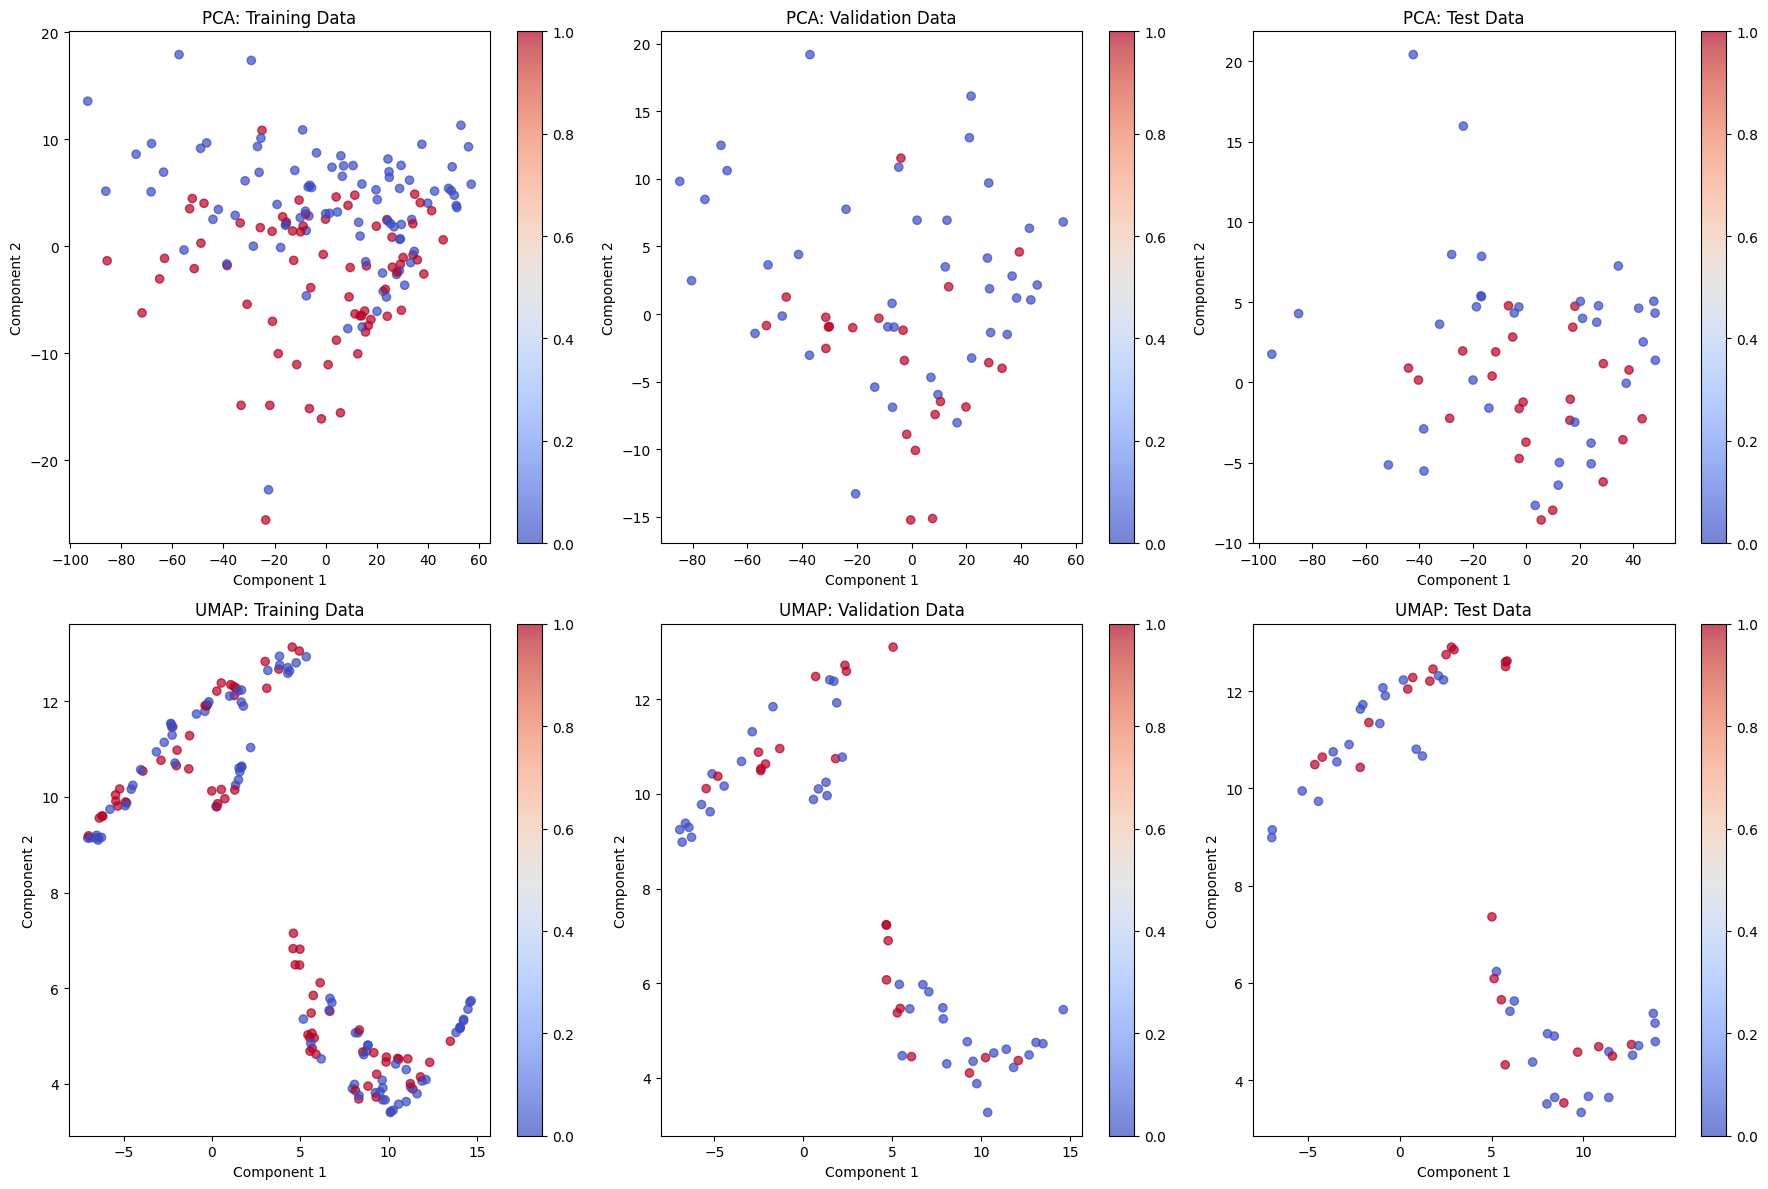

In [68]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

# Assuming y_data_train, y_data_val, and y_data_test are pandas Series or arrays
y_train = y_data_train[task].values
y_val = y_data_val[task].values
y_test = y_data_test[task].values

# Convert latent representations to numpy arrays for visualization
latent_rep_train_np = latent_rep_train.detach().numpy()
latent_rep_val_np = latent_rep_val.detach().numpy()
latent_rep_test_np = latent_rep_test.detach().numpy()

# PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
latent_rep_train_pca = pca.fit_transform(latent_rep_train_np)
latent_rep_val_pca = pca.transform(latent_rep_val_np)
latent_rep_test_pca = pca.transform(latent_rep_test_np)

# UMAP for dimensionality reduction to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
latent_rep_train_umap = umap_reducer.fit_transform(latent_rep_train_np)
latent_rep_val_umap = umap_reducer.transform(latent_rep_val_np)
latent_rep_test_umap = umap_reducer.transform(latent_rep_test_np)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot PCA results
axes[0, 0].scatter(latent_rep_train_pca[:, 0], latent_rep_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
axes[0, 0].set_title('PCA: Training Data')
axes[0, 0].set_xlabel('Component 1')
axes[0, 0].set_ylabel('Component 2')
axes[0, 0].colorbar = plt.colorbar(axes[0, 0].collections[0], ax=axes[0, 0])

axes[0, 1].scatter(latent_rep_val_pca[:, 0], latent_rep_val_pca[:, 1], c=y_val, cmap='coolwarm', alpha=0.7)
axes[0, 1].set_title('PCA: Validation Data')
axes[0, 1].set_xlabel('Component 1')
axes[0, 1].set_ylabel('Component 2')
axes[0, 1].colorbar = plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1])

axes[0, 2].scatter(latent_rep_test_pca[:, 0], latent_rep_test_pca[:, 1], c=y_test, cmap='coolwarm', alpha=0.7)
axes[0, 2].set_title('PCA: Test Data')
axes[0, 2].set_xlabel('Component 1')
axes[0, 2].set_ylabel('Component 2')
axes[0, 2].colorbar = plt.colorbar(axes[0, 2].collections[0], ax=axes[0, 2])

# Plot UMAP results
axes[1, 0].scatter(latent_rep_train_umap[:, 0], latent_rep_train_umap[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
axes[1, 0].set_title('UMAP: Training Data')
axes[1, 0].set_xlabel('Component 1')
axes[1, 0].set_ylabel('Component 2')
axes[1, 0].colorbar = plt.colorbar(axes[1, 0].collections[0], ax=axes[1, 0])

axes[1, 1].scatter(latent_rep_val_umap[:, 0], latent_rep_val_umap[:, 1], c=y_val, cmap='coolwarm', alpha=0.7)
axes[1, 1].set_title('UMAP: Validation Data')
axes[1, 1].set_xlabel('Component 1')
axes[1, 1].set_ylabel('Component 2')
axes[1, 1].colorbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])

axes[1, 2].scatter(latent_rep_test_umap[:, 0], latent_rep_test_umap[:, 1], c=y_test, cmap='coolwarm', alpha=0.7)
axes[1, 2].set_title('UMAP: Test Data')
axes[1, 2].set_xlabel('Component 1')
axes[1, 2].set_ylabel('Component 2')
axes[1, 2].colorbar = plt.colorbar(axes[1, 2].collections[0], ax=axes[1, 2])

# Adjust layout
plt.tight_layout()
plt.show()


/home/leilapirhaji/.local/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



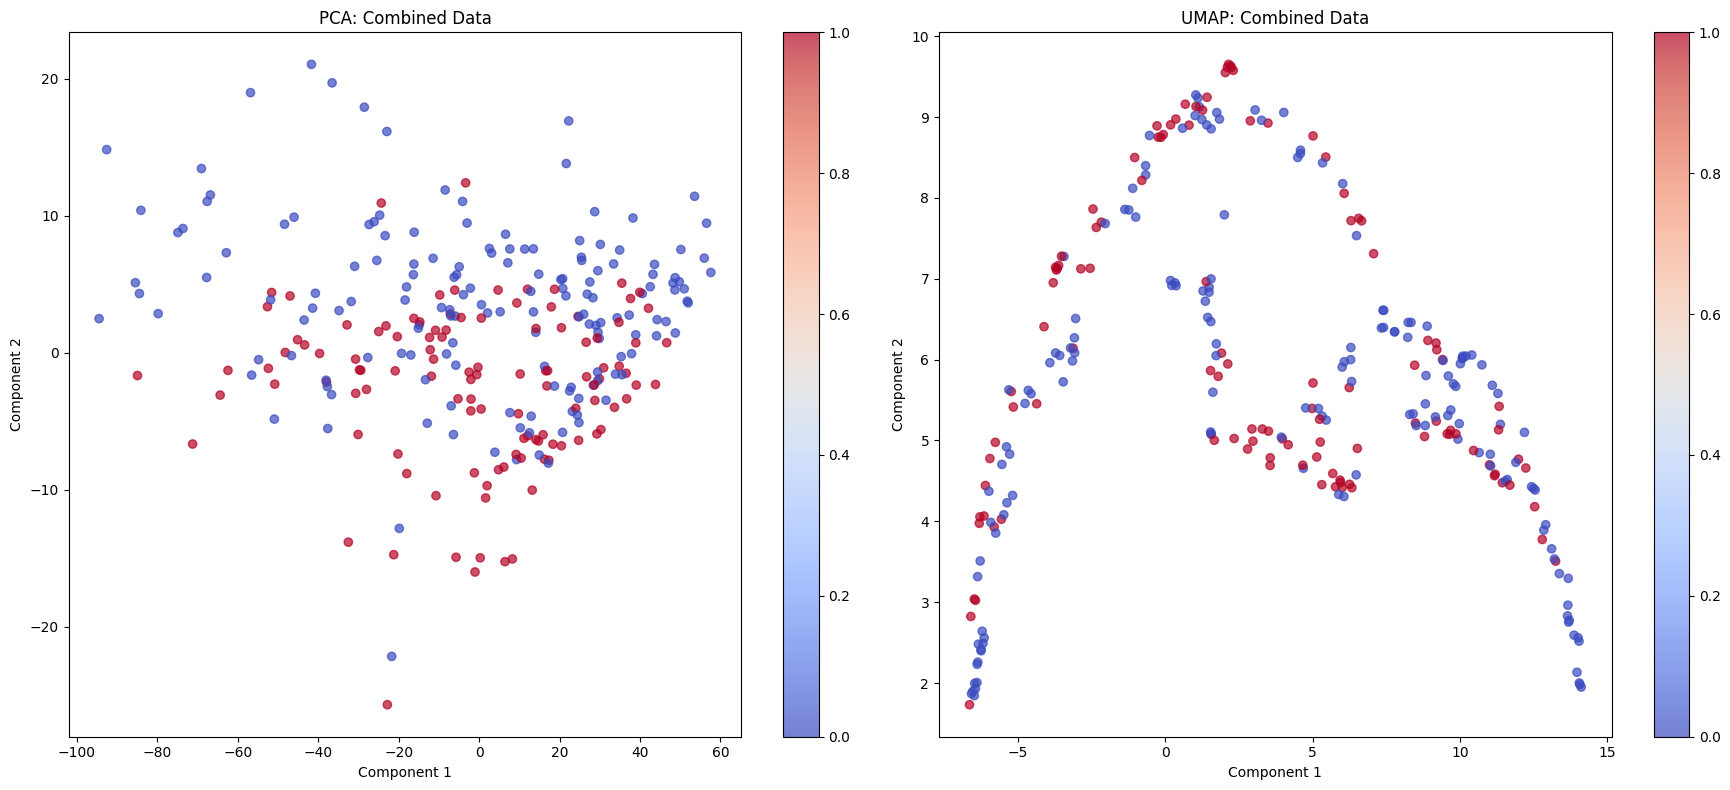

In [69]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

# Assuming y_data_train, y_data_val, and y_data_test are pandas Series or arrays
y_train = y_data_train[task].values
y_val = y_data_val[task].values
y_test = y_data_test[task].values

# Convert latent representations to numpy arrays for visualization
latent_rep_train_np = latent_rep_train.detach().numpy()
latent_rep_val_np = latent_rep_val.detach().numpy()
latent_rep_test_np = latent_rep_test.detach().numpy()

# Concatenate latent representations and labels
latent_rep_all = np.concatenate([latent_rep_train_np, latent_rep_val_np, latent_rep_test_np], axis=0)
y_all = np.concatenate([y_train, y_val, y_test], axis=0)

# PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
latent_rep_all_pca = pca.fit_transform(latent_rep_all)

# UMAP for dimensionality reduction to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
latent_rep_all_umap = umap_reducer.fit_transform(latent_rep_all)

# Create a combined figure for PCA and UMAP
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot combined PCA results
scatter_pca = axes[0].scatter(latent_rep_all_pca[:, 0], latent_rep_all_pca[:, 1], c=y_all, cmap='coolwarm', alpha=0.7)
axes[0].set_title('PCA: Combined Data')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')
axes[0].colorbar = plt.colorbar(scatter_pca, ax=axes[0])

# Plot combined UMAP results
scatter_umap = axes[1].scatter(latent_rep_all_umap[:, 0], latent_rep_all_umap[:, 1], c=y_all, cmap='coolwarm', alpha=0.7)
axes[1].set_title('UMAP: Combined Data')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')
axes[1].colorbar = plt.colorbar(scatter_umap, ax=axes[1])

# Adjust layout
plt.tight_layout()
plt.show()


## Latent avergaing V2

### optuna optimization

In [50]:
import optuna

import imaplib
import freez_encoder_latent_avg_v2
importlib.reload(freez_encoder_latent_avg_v2)
from freez_encoder_latent_avg_v2 import fine_tune_model, FineTuneModel

task='IMDC BINARY'
num_classes = 2

best_model = None  # Variable to store the best model
best_auc = -float('inf')  # Initialize to a very low value to keep track of the best AUC

def objective(trial):
    global best_model, best_auc
    
    # Hyperparameters to optimize
    num_epochs = trial.suggest_int('num_epochs', 10, 40)
    batch_size = trial.suggest_categorical('batch_size', [16, 32])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-2)
    dropout = trial.suggest_uniform('dropout', 0.1, 0.4)
    task_layer_size = trial.suggest_int('task_layer_size', 32, 64, 128)
    l1_reg_weight = trial.suggest_loguniform('l1_reg_weight', 1e-8, 1e-3)
    l2_reg_weight = trial.suggest_loguniform('l2_reg_weight', 1e-8, 1e-3)

    # Perform fine-tuning with the current hyperparameters
    model, metrics = fine_tune_model(
        encoder=encoder_real,  # Your pre-trained encoder
        X_train=X_data_train, 
        y_data_train=y_data_train[task],
        X_val=X_data_val, 
        y_data_val=y_data_val[task], 
        num_classes=num_classes,  # Your number of classes
        num_epochs=num_epochs,
        batch_size=batch_size,
        learning_rate=learning_rate,
        dropout=dropout,
        task_layer_size=task_layer_size,
        l1_reg_weight=l1_reg_weight,
        l2_reg_weight=l2_reg_weight,
        seed=seed  # Set seed for reproducibility
    )
    
    # Use the AUC score from the last epoch as the objective to maximize
    auc = metrics['AUC'].iloc[-1]

    # Save the model if it has the best AUC so far
    if auc > best_auc:
        best_auc = auc
        best_model = model

    #saving the best model
    torch.save(best_model, f'{finetune_save_dir}/best_model_IMDC_latent_avg_v2.pth')  # Save the best model

    return auc


# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(f"Best trial: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")


[I 2024-09-03 04:54:23,343] A new study created in memory with name: no-name-a60dfaff-8e9f-4201-a64d-296ae0f38504
/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/

Epoch 1/11, Loss: 0.6579290798732212
Validation Loss: 0.654785668849945, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.4125874125874%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.6772184584821973
Validation Loss: 0.6567855715751648, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 88.46153846153845%
Epoch 3/11, Loss: 0.6734859560217176
Validation Loss: 0.6491980791091919, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.34498834498834%
Epoch 4/11, Loss: 0.6807267793587276
Validation Loss: 0.6551707267761231, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.06293706293707%
Epoch 5/11, Loss: 0.6620276825768607
Validation Loss: 0.6496785521507263, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.52913752913753%
Epoch 6/11, Loss: 0.6570922817502703
Validation Loss: 0.6461418867111206, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%

[I 2024-09-03 04:54:27,028] Trial 0 finished with value: 87.06293706293707 and parameters: {'num_epochs': 11, 'batch_size': 32, 'learning_rate': 2.971364488022243e-06, 'dropout': 0.37221305880958855, 'task_layer_size': 32, 'l1_reg_weight': 1.544586648034948e-06, 'l2_reg_weight': 3.018615674514463e-05}. Best is trial 0 with value: 87.06293706293707.


Epoch 11/11, Loss: 0.6454791937555585
Validation Loss: 0.6421783208847046, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.06293706293707%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/22, Loss: 0.5601038421903338
Validation Loss: 0.46417126059532166, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 88.11188811188812%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/22, Loss: 0.5449800725494113
Validation Loss: 0.45195945501327517, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 89.86013986013987%
Epoch 3/22, Loss: 0.5638268398387092
Validation Loss: 0.5212873220443726, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 85.3146853146853%
Epoch 4/22, Loss: 0.5535714434725898
Validation Loss: 0.4985254257917404, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 86.94638694638695%
Epoch 5/22, Loss: 0.4971557067973273
Validation Loss: 0.47100250124931337, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 86.5967365967366%
Epoch 6/22, Loss: 0.5030657436166491
Validation Loss: 0.46660620868206026, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.909090909090

[I 2024-09-03 04:54:33,968] Trial 1 finished with value: 82.05128205128204 and parameters: {'num_epochs': 22, 'batch_size': 32, 'learning_rate': 0.0007322118505476775, 'dropout': 0.31703821912349944, 'task_layer_size': 32, 'l1_reg_weight': 1.85327401587314e-07, 'l2_reg_weight': 2.596786258467844e-06}. Best is trial 0 with value: 87.06293706293707.


Epoch 22/22, Loss: 0.43659238730158123
Validation Loss: 0.5023690581321716, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 82.05128205128204%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/37, Loss: 0.5300075433083943
Validation Loss: 0.5300497949123383, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 86.82983682983682%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/37, Loss: 0.552040234208107
Validation Loss: 0.5318981528282165, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 86.82983682983682%
Epoch 3/37, Loss: 0.5548164631639209
Validation Loss: 0.5229179799556732, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 86.94638694638695%
Epoch 4/37, Loss: 0.5734947047063282
Validation Loss: 0.5335333287715912, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 86.48018648018648%
Epoch 5/37, Loss: 0.5350079408713749
Validation Loss: 0.5227495491504669, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 86.94638694638695%
Epoch 6/37, Loss: 0.5346757769584656
Validation Loss: 0.5224440395832062, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.

[I 2024-09-03 04:54:45,897] Trial 2 finished with value: 87.87878787878788 and parameters: {'num_epochs': 37, 'batch_size': 32, 'learning_rate': 2.9654456655366356e-06, 'dropout': 0.21980185434792407, 'task_layer_size': 32, 'l1_reg_weight': 5.6690073571179086e-08, 'l2_reg_weight': 1.9815058143094045e-08}. Best is trial 2 with value: 87.87878787878788.


Epoch 37/37, Loss: 0.49433987055506023
Validation Loss: 0.4813548386096954, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.87878787878788%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 0.7698667741247586


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5338226407766342, Accuracy: 80.32786885245902%, Precision: 75.0%, Recall: 68.18181818181817%, F1 Score: 71.42857142857143%, AUC: 87.2960372960373%
Epoch 2/10, Loss: 0.7021948854838099
Validation Loss: 0.6063457652926445, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 89.86013986013985%
Epoch 3/10, Loss: 0.6740629172750882
Validation Loss: 0.72462700009346, Accuracy: 62.295081967213115%, Precision: 48.837209302325576%, Recall: 95.45454545454545%, F1 Score: 64.61538461538461%, AUC: 87.76223776223777%
Epoch 4/10, Loss: 0.7116370829088348
Validation Loss: 0.7902963876724243, Accuracy: 55.73770491803278%, Precision: 44.680851063829785%, Recall: 95.45454545454545%, F1 Score: 60.86956521739131%, AUC: 81.5850815850816%
Epoch 5/10, Loss: 0.6423840969800949
Validation Loss: 0.687836429476738, Accuracy: 80.32786885245902%, Precision: 65.625%, Recall: 95.45454545454545%, F1 Score: 77.77777777777779%, AUC: 80.1864801

[I 2024-09-03 04:54:51,961] Trial 3 finished with value: 80.41958041958041 and parameters: {'num_epochs': 10, 'batch_size': 16, 'learning_rate': 0.003933016807305149, 'dropout': 0.18654407991504882, 'task_layer_size': 32, 'l1_reg_weight': 1.7609106006430914e-06, 'l2_reg_weight': 2.1390485343474895e-08}. Best is trial 2 with value: 87.87878787878788.


Validation Loss: 0.7238465830683708, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 80.41958041958041%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/26, Loss: 0.8719352984002658


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.7586309492588044, Accuracy: 62.295081967213115%, Precision: 48.64864864864865%, Recall: 81.81818181818183%, F1 Score: 61.016949152542374%, AUC: 71.6783216783217%
Epoch 2/26, Loss: 0.66727906784841
Validation Loss: 0.5927163794636726, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 85.66433566433567%
Epoch 3/26, Loss: 0.7101224091436181
Validation Loss: 0.7085077852010727, Accuracy: 59.01639344262295%, Precision: 46.34146341463415%, Recall: 86.36363636363636%, F1 Score: 60.317460317460316%, AUC: 81.993006993007%
Epoch 4/26, Loss: 0.6789768561720848
Validation Loss: 0.6782522454857827, Accuracy: 75.40983606557377%, Precision: 60.0%, Recall: 95.45454545454545%, F1 Score: 73.68421052631578%, AUC: 84.26573426573427%
Epoch 5/26, Loss: 0.652450510433742
Validation Loss: 0.6617804981768132, Accuracy: 75.40983606557377%, Precision: 66.66666666666666%, Recall: 63.63636363636363%, F1 Score: 65.116279069

[I 2024-09-03 04:55:06,919] Trial 4 finished with value: 76.80652680652682 and parameters: {'num_epochs': 26, 'batch_size': 16, 'learning_rate': 0.003595557962010449, 'dropout': 0.3294368960429491, 'task_layer_size': 32, 'l1_reg_weight': 1.7318301425619826e-06, 'l2_reg_weight': 7.541048609479761e-08}. Best is trial 2 with value: 87.87878787878788.


Validation Loss: 0.7058527022600174, Accuracy: 72.1311475409836%, Precision: 64.70588235294117%, Recall: 50.0%, F1 Score: 56.41025641025641%, AUC: 76.80652680652682%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/36, Loss: 8.353543145315987
Validation Loss: 8.161594581604003, Accuracy: 81.9672131147541%, Precision: 72.0%, Recall: 81.81818181818183%, F1 Score: 76.59574468085107%, AUC: 87.17948717948718%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/36, Loss: 8.182402815137591
Validation Loss: 7.999675559997558, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.64568764568766%
Epoch 3/36, Loss: 8.008736542293004
Validation Loss: 7.88035888671875, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 86.24708624708626%
Epoch 4/36, Loss: 7.907299791063581
Validation Loss: 7.773933601379395, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.48018648018649%
Epoch 5/36, Loss: 7.752489396503994
Validation Loss: 7.664667415618896, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 86.48018648018649%
Epoch 6/36, Loss: 7.6338357244219095
Validation Loss: 7.537151718139649, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.8181818

[I 2024-09-03 04:55:18,524] Trial 5 finished with value: 85.8974358974359 and parameters: {'num_epochs': 36, 'batch_size': 32, 'learning_rate': 0.00014201782411493784, 'dropout': 0.1985438358819476, 'task_layer_size': 32, 'l1_reg_weight': 0.0001169296738170567, 'l2_reg_weight': 6.470793189831185e-08}. Best is trial 2 with value: 87.87878787878788.


Epoch 36/36, Loss: 6.327068328857422
Validation Loss: 6.325359153747558, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 85.8974358974359%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/15, Loss: 1.9702677386147636
Validation Loss: 1.9741502761840821, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 87.41258741258741%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/15, Loss: 1.986415547983987
Validation Loss: 1.9749263048171997, Accuracy: 62.295081967213115%, Precision: 48.78048780487805%, Recall: 90.9090909090909%, F1 Score: 63.49206349206349%, AUC: 87.17948717948718%
Epoch 3/15, Loss: 1.9740006412778581
Validation Loss: 1.9654594659805298, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall: 95.45454545454545%, F1 Score: 66.66666666666666%, AUC: 87.64568764568764%
Epoch 4/15, Loss: 2.002174513680594
Validation Loss: 1.9755343198776245, Accuracy: 60.65573770491803%, Precision: 47.5%, Recall: 86.36363636363636%, F1 Score: 61.29032258064516%, AUC: 86.13053613053613%
Epoch 5/15, Loss: 1.9771609050886971
Validation Loss: 1.970615553855896, Accuracy: 57.377049180327866%, Precision: 45.23809523809524%, Recall: 86.36363636363636%, F1 Score: 59.375%, AUC: 86.48018648018649%
Epoch 6/15, Loss: 1.9661775401660375
Validation Loss: 1.9630024909973145, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 90.9090909090909%, F1 Score

[I 2024-09-03 04:55:23,253] Trial 6 finished with value: 88.34498834498834 and parameters: {'num_epochs': 15, 'batch_size': 32, 'learning_rate': 1.6022491147159048e-06, 'dropout': 0.31168676032119413, 'task_layer_size': 32, 'l1_reg_weight': 2.7131624768099067e-05, 'l2_reg_weight': 0.00011934379114455702}. Best is trial 6 with value: 88.34498834498834.


Epoch 15/15, Loss: 1.9533051678112574
Validation Loss: 1.944983673095703, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 88.34498834498834%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/33, Loss: 1.0683707637446267


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 1.1824071109294891, Accuracy: 60.65573770491803%, Precision: 47.61904761904761%, Recall: 90.9090909090909%, F1 Score: 62.5%, AUC: 82.86713286713288%
Epoch 2/33, Loss: 0.907857963017055
Validation Loss: 0.837007674574852, Accuracy: 81.9672131147541%, Precision: 82.35294117647058%, Recall: 63.63636363636363%, F1 Score: 71.7948717948718%, AUC: 87.1794871794872%
Epoch 3/33, Loss: 0.9560744485684803
Validation Loss: 0.8957309365272522, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.4125874125874%
Epoch 4/33, Loss: 0.9455127439328602
Validation Loss: 0.8766744166612626, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 87.2960372960373%
Epoch 5/33, Loss: 0.9083142387015479
Validation Loss: 0.8599114954471588, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765

[I 2024-09-03 04:55:41,702] Trial 7 finished with value: 87.99533799533799 and parameters: {'num_epochs': 33, 'batch_size': 16, 'learning_rate': 0.0011278426720643742, 'dropout': 0.20064191944517742, 'task_layer_size': 32, 'l1_reg_weight': 7.6265316844201376e-06, 'l2_reg_weight': 2.618262596134249e-05}. Best is trial 6 with value: 88.34498834498834.


Validation Loss: 0.8264658272266387, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 87.99533799533799%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/21, Loss: 0.5494289834584508


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.578109860420227, Accuracy: 67.21311475409836%, Precision: 52.77777777777778%, Recall: 86.36363636363636%, F1 Score: 65.51724137931035%, AUC: 86.24708624708624%
Epoch 2/21, Loss: 0.5629361580525126
Validation Loss: 0.5602769106626511, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 84.14918414918415%
Epoch 3/21, Loss: 0.5425546648246902
Validation Loss: 0.5210333615541458, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.2960372960373%
Epoch 4/21, Loss: 0.5317182657974107
Validation Loss: 0.5103721857070923, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 86.24708624708624%
Epoch 5/21, Loss: 0.5387232324906758
Validation Loss: 0.4932577103376389, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score

[I 2024-09-03 04:55:53,297] Trial 8 finished with value: 86.01398601398603 and parameters: {'num_epochs': 21, 'batch_size': 16, 'learning_rate': 2.2351381596033374e-05, 'dropout': 0.36508476862614814, 'task_layer_size': 32, 'l1_reg_weight': 3.383538878512622e-08, 'l2_reg_weight': 2.075368348987862e-06}. Best is trial 6 with value: 88.34498834498834.


Validation Loss: 0.43266180604696275, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 86.01398601398603%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/21, Loss: 19.499548367091588


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 19.02461795806885, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 87.99533799533799%
Epoch 2/21, Loss: 18.82107162475586
Validation Loss: 18.623507690429687, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.5967365967366%
Epoch 3/21, Loss: 18.56058645248413
Validation Loss: 18.390381050109863, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.22843822843822%
Epoch 4/21, Loss: 18.34103196007865
Validation Loss: 18.24365978240967, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.71328671328672%
Epoch 5/21, Loss: 18.201518195016043
Validation Loss: 18.105958557128908, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 8

[I 2024-09-03 04:56:05,281] Trial 9 finished with value: 85.66433566433568 and parameters: {'num_epochs': 21, 'batch_size': 16, 'learning_rate': 0.00035204751383874117, 'dropout': 0.3670137395244131, 'task_layer_size': 32, 'l1_reg_weight': 0.00039786671081256644, 'l2_reg_weight': 1.5618702982495483e-05}. Best is trial 6 with value: 88.34498834498834.


Validation Loss: 17.545797538757324, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 85.66433566433568%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/15, Loss: 1.858758338860103


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 1.856866478919983, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 86.7132867132867%
Epoch 2/15, Loss: 1.8531917759350367
Validation Loss: 1.8459967374801636, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 86.94638694638695%
Epoch 3/15, Loss: 1.8530648350715637
Validation Loss: 1.8323879480361938, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 87.1794871794872%
Epoch 4/15, Loss: 1.8517940044403076
Validation Loss: 1.8288755416870117, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 87.17948717948718%
Epoch 5/15, Loss: 1.827266241822924
Validation Loss: 1.8149337291717529, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 

[I 2024-09-03 04:56:10,140] Trial 10 finished with value: 88.8111888111888 and parameters: {'num_epochs': 15, 'batch_size': 32, 'learning_rate': 1.9777267992862992e-05, 'dropout': 0.273116736626187, 'task_layer_size': 32, 'l1_reg_weight': 2.845874174705774e-05, 'l2_reg_weight': 0.00048602860563479514}. Best is trial 10 with value: 88.8111888111888.


Epoch 15/15, Loss: 1.7686957802091325
Validation Loss: 1.7102831840515136, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.8111888111888%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/15, Loss: 2.0104890891483853
Validation Loss: 1.979786992073059, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 88.34498834498835%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/15, Loss: 2.006516294819968
Validation Loss: 1.9699956893920898, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 89.16083916083917%
Epoch 3/15, Loss: 2.0090636355536327
Validation Loss: 1.9620853185653686, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 88.22843822843822%
Epoch 4/15, Loss: 2.0030719893319264
Validation Loss: 1.9626595020294189, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 88.57808857808858%
Epoch 5/15, Loss: 1.9872250812394279
Validation Loss: 1.9550432443618775, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 86.94638694638695%
Epoch 6/15, Loss: 1.975615816456931
Validation Loss: 1.9455064296722413, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.3636363636

[I 2024-09-03 04:56:14,872] Trial 11 finished with value: 88.92773892773893 and parameters: {'num_epochs': 15, 'batch_size': 32, 'learning_rate': 1.4061502342560979e-05, 'dropout': 0.10680698379585918, 'task_layer_size': 32, 'l1_reg_weight': 3.2581424058395304e-05, 'l2_reg_weight': 0.0008995141868297808}. Best is trial 11 with value: 88.92773892773893.


Epoch 15/15, Loss: 1.9519867215837752
Validation Loss: 1.8967466592788695, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.92773892773893%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/16, Loss: 2.4418329170772006
Validation Loss: 2.394388484954834, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.46153846153847%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/16, Loss: 2.433285287448338
Validation Loss: 2.383727502822876, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 89.16083916083917%
Epoch 3/16, Loss: 2.4408435991832187
Validation Loss: 2.3768755435943603, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.22843822843822%
Epoch 4/16, Loss: 2.432526809828622
Validation Loss: 2.3794472217559814, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 88.92773892773893%
Epoch 5/16, Loss: 2.4159487996782576
Validation Loss: 2.3726966381073, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 87.41258741258741%
Epoch 6/16, Loss: 2.4017931052616666
Validation Loss: 2.3630040645599366, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.3636

[I 2024-09-03 04:56:19,990] Trial 12 finished with value: 89.16083916083917 and parameters: {'num_epochs': 16, 'batch_size': 32, 'learning_rate': 1.7859643975897045e-05, 'dropout': 0.12236579659106613, 'task_layer_size': 32, 'l1_reg_weight': 4.2606460163168026e-05, 'l2_reg_weight': 0.0007938795516319861}. Best is trial 12 with value: 89.16083916083917.


Epoch 16/16, Loss: 2.407804080418178
Validation Loss: 2.3287055015563967, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.16083916083917%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/16, Loss: 22.492410932268417
Validation Loss: 22.429134368896484, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.11188811188812%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/16, Loss: 22.459462302071707
Validation Loss: 22.40190773010254, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 89.27738927738929%
Epoch 3/16, Loss: 22.44544846670968
Validation Loss: 22.378685760498048, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 88.57808857808858%
Epoch 4/16, Loss: 22.41947283063616
Validation Loss: 22.36716537475586, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 88.6946386946387%
Epoch 5/16, Loss: 22.38697624206543
Validation Loss: 22.345693588256836, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.17948717948718%
Epoch 6/16, Loss: 22.360438346862793
Validation Loss: 22.325857162475586, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636

[I 2024-09-03 04:56:25,339] Trial 13 finished with value: 88.34498834498835 and parameters: {'num_epochs': 16, 'batch_size': 32, 'learning_rate': 2.1716662711310033e-05, 'dropout': 0.1125382775330193, 'task_layer_size': 32, 'l1_reg_weight': 0.0004992199995402423, 'l2_reg_weight': 0.0009595855475857184}. Best is trial 12 with value: 89.16083916083917.


Epoch 16/16, Loss: 22.242495673043386
Validation Loss: 22.190565490722655, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 88.34498834498835%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/28, Loss: 3.6120669501168385
Validation Loss: 3.5875682830810547, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 88.22843822843824%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/28, Loss: 3.609360064779009
Validation Loss: 3.5814022064208983, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 88.57808857808858%
Epoch 3/28, Loss: 3.613257578441075
Validation Loss: 3.5744441032409666, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 88.46153846153847%
Epoch 4/28, Loss: 3.6075297253472463
Validation Loss: 3.5766666412353514, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 88.46153846153845%
Epoch 5/28, Loss: 3.5944896936416626
Validation Loss: 3.5696491241455077, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 87.17948717948718%
Epoch 6/28, Loss: 3.584793652806963
Validation Loss: 3.5642935752868654, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.363636363636

[I 2024-09-03 04:56:34,265] Trial 14 finished with value: 87.87878787878789 and parameters: {'num_epochs': 28, 'batch_size': 32, 'learning_rate': 9.770359692435431e-06, 'dropout': 0.10201120354847475, 'task_layer_size': 32, 'l1_reg_weight': 6.934404392219134e-05, 'l2_reg_weight': 0.00019345602224252003}. Best is trial 12 with value: 89.16083916083917.


Epoch 28/28, Loss: 3.5659632001604353
Validation Loss: 3.5026363849639894, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.87878787878789%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/18, Loss: 0.9969680649893624
Validation Loss: 0.9265015602111817, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.6946386946387%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/18, Loss: 0.9730428584984371
Validation Loss: 0.8987096786499024, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.97668997668997%
Epoch 3/18, Loss: 0.9880895018577576
Validation Loss: 0.8949585199356079, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.57808857808858%
Epoch 4/18, Loss: 0.971683919429779
Validation Loss: 0.9068628668785095, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 89.16083916083917%
Epoch 5/18, Loss: 0.9507102583135877
Validation Loss: 0.8987215995788574, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 87.64568764568766%
Epoch 6/18, Loss: 0.937756040266582
Validation Loss: 0.8813825488090515, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.3636363636363

[I 2024-09-03 04:56:40,212] Trial 15 finished with value: 85.78088578088578 and parameters: {'num_epochs': 18, 'batch_size': 32, 'learning_rate': 7.841551247860678e-05, 'dropout': 0.14978607751782572, 'task_layer_size': 32, 'l1_reg_weight': 9.871479788629812e-06, 'l2_reg_weight': 7.588436414667404e-07}. Best is trial 12 with value: 89.16083916083917.


Epoch 18/18, Loss: 0.9449056897844587
Validation Loss: 0.9033541560173035, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 85.78088578088578%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/29, Loss: 42.149432863507954
Validation Loss: 41.98468551635742, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.1118881118881%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/29, Loss: 41.954377855573384
Validation Loss: 41.84465408325195, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 89.27738927738929%
Epoch 3/29, Loss: 41.84803254263742
Validation Loss: 41.745295715332034, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 88.34498834498834%
Epoch 4/29, Loss: 41.75382859366281
Validation Loss: 41.67788925170898, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 88.6946386946387%
Epoch 5/29, Loss: 41.66719191414969
Validation Loss: 41.60970001220703, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 86.94638694638695%
Epoch 6/29, Loss: 41.598502022879465
Validation Loss: 41.54830780029297, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70

[I 2024-09-03 04:56:49,567] Trial 16 finished with value: 86.24708624708626 and parameters: {'num_epochs': 29, 'batch_size': 32, 'learning_rate': 5.432904177111028e-05, 'dropout': 0.14308138327722372, 'task_layer_size': 32, 'l1_reg_weight': 0.000945624083376646, 'l2_reg_weight': 0.00011913824250274161}. Best is trial 12 with value: 89.16083916083917.


Epoch 29/29, Loss: 40.93696621486119
Validation Loss: 40.92133331298828, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 86.24708624708626%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/13, Loss: 5.878191709518433
Validation Loss: 5.87698335647583, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 86.48018648018649%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/13, Loss: 5.876415729522705
Validation Loss: 5.872759056091309, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 86.82983682983682%
Epoch 3/13, Loss: 5.879120997020176
Validation Loss: 5.866012859344482, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 86.48018648018649%
Epoch 4/13, Loss: 5.87988417489188
Validation Loss: 5.868343257904053, Accuracy: 67.21311475409836%, Precision: 52.77777777777778%, Recall: 86.36363636363636%, F1 Score: 65.51724137931035%, AUC: 86.94638694638695%
Epoch 5/13, Loss: 5.863671166556222
Validation Loss: 5.862445831298828, Accuracy: 65.57377049180327%, Precision: 51.35135135135135%, Recall: 86.36363636363636%, F1 Score: 64.40677966101694%, AUC: 85.8974358974359%
Epoch 6/13, Loss: 5.861191545213972
Validation Loss: 5.859567928314209, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.

[I 2024-09-03 04:56:53,822] Trial 17 finished with value: 86.5967365967366 and parameters: {'num_epochs': 13, 'batch_size': 32, 'learning_rate': 6.598783715324338e-06, 'dropout': 0.14399538642587803, 'task_layer_size': 32, 'l1_reg_weight': 0.0001209554317136141, 'l2_reg_weight': 0.00029466650490157347}. Best is trial 12 with value: 89.16083916083917.


Epoch 13/13, Loss: 5.828996351787022
Validation Loss: 5.837736511230469, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 86.5967365967366%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/19, Loss: 1.0561779992921012
Validation Loss: 0.9690934181213379, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.81118881118881%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/19, Loss: 1.0137548914977483
Validation Loss: 0.9147705912590027, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 90.44289044289044%
Epoch 3/19, Loss: 1.0323563984462194
Validation Loss: 0.9434212684631348, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 88.6946386946387%
Epoch 4/19, Loss: 1.0127298789364951
Validation Loss: 0.9705680012702942, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 88.11188811188812%
Epoch 5/19, Loss: 0.9861480976854052
Validation Loss: 0.9381205201148987, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.06293706293707%
Epoch 6/19, Loss: 0.9742220682757241
Validation Loss: 0.9037575721740723, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Reca

[I 2024-09-03 04:57:00,013] Trial 18 finished with value: 88.6946386946387 and parameters: {'num_epochs': 19, 'batch_size': 32, 'learning_rate': 0.00018242437092154902, 'dropout': 0.24037103345204236, 'task_layer_size': 32, 'l1_reg_weight': 1.0789903486228238e-05, 'l2_reg_weight': 0.0008740695167365114}. Best is trial 12 with value: 89.16083916083917.


Epoch 19/19, Loss: 0.977155476808548
Validation Loss: 0.9136033892631531, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 88.6946386946387%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/25, Loss: 0.5841403731278011
Validation Loss: 0.5518860220909119, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.99533799533799%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/25, Loss: 0.5841847807168961
Validation Loss: 0.5489517569541931, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 89.04428904428904%
Epoch 3/25, Loss: 0.5942522457667759
Validation Loss: 0.5473712027072907, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 88.46153846153847%
Epoch 4/25, Loss: 0.5940407088824681
Validation Loss: 0.553119707107544, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 88.57808857808858%
Epoch 5/25, Loss: 0.5757713083709989
Validation Loss: 0.5486077547073365, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.11188811188812%
Epoch 6/25, Loss: 0.5753804956163678
Validation Loss: 0.5469345986843109, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36

[I 2024-09-03 04:57:08,810] Trial 19 finished with value: 88.81118881118881 and parameters: {'num_epochs': 25, 'batch_size': 32, 'learning_rate': 1.0449981425952858e-06, 'dropout': 0.16942638740466703, 'task_layer_size': 32, 'l1_reg_weight': 4.1258056723162444e-07, 'l2_reg_weight': 5.1803745072222024e-05}. Best is trial 12 with value: 89.16083916083917.


Validation Loss: 0.5372346103191376, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.81118881118881%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/13, Loss: 2.4777363198144093
Validation Loss: 2.4196191310882567, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.46153846153845%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/13, Loss: 2.461776852607727
Validation Loss: 2.3945406913757323, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 89.86013986013987%
Epoch 3/13, Loss: 2.46916994026729
Validation Loss: 2.3865629196166993, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.6946386946387%
Epoch 4/13, Loss: 2.455099872180394
Validation Loss: 2.385294485092163, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 89.39393939393939%
Epoch 5/13, Loss: 2.4330362592424666
Validation Loss: 2.377500867843628, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 88.11188811188812%
Epoch 6/13, Loss: 2.4194882256644115
Validation Loss: 2.365239143371582, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1

[I 2024-09-03 04:57:13,201] Trial 20 finished with value: 88.34498834498834 and parameters: {'num_epochs': 13, 'batch_size': 32, 'learning_rate': 4.77885695381552e-05, 'dropout': 0.12435296211096972, 'task_layer_size': 32, 'l1_reg_weight': 4.3513839862102575e-05, 'l2_reg_weight': 1.0908111140787137e-05}. Best is trial 12 with value: 89.16083916083917.


Validation Loss: 2.349646472930908, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.34498834498834%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/24, Loss: 0.5725205987691879
Validation Loss: 0.5235164582729339, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.34498834498835%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/24, Loss: 0.567884583558355
Validation Loss: 0.5204914450645447, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 89.5104895104895%
Epoch 3/24, Loss: 0.5817108601331711
Validation Loss: 0.5210538983345032, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 88.6946386946387%
Epoch 4/24, Loss: 0.5772371206964765
Validation Loss: 0.5259674251079559, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 89.27738927738929%
Epoch 5/24, Loss: 0.5631511722292218
Validation Loss: 0.5223668932914733, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 87.99533799533799%
Epoch 6/24, Loss: 0.5596520794289452
Validation Loss: 0.5201298534870148, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Sco

[I 2024-09-03 04:57:20,919] Trial 21 finished with value: 89.27738927738929 and parameters: {'num_epochs': 24, 'batch_size': 32, 'learning_rate': 1.0711218579186563e-06, 'dropout': 0.177620287309447, 'task_layer_size': 32, 'l1_reg_weight': 4.3878631303097863e-07, 'l2_reg_weight': 5.532214987355478e-05}. Best is trial 21 with value: 89.27738927738929.


Epoch 24/24, Loss: 0.5643682054110936
Validation Loss: 0.5089838087558747, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 89.27738927738929%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/18, Loss: 0.5513010365622384
Validation Loss: 0.4969730734825134, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.46153846153845%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/18, Loss: 0.5441461077758244
Validation Loss: 0.4907791793346405, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 89.86013986013987%
Epoch 3/18, Loss: 0.5583232854093824
Validation Loss: 0.49010071754455564, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.57808857808858%
Epoch 4/18, Loss: 0.5533491522073746
Validation Loss: 0.49289758801460265, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 89.5104895104895%
Epoch 5/18, Loss: 0.5348416928734098
Validation Loss: 0.48867917656898496, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 88.11188811188812%
Epoch 6/18, Loss: 0.5302314460277557
Validation Loss: 0.4833282709121704, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 

[I 2024-09-03 04:57:26,965] Trial 22 finished with value: 87.64568764568766 and parameters: {'num_epochs': 18, 'batch_size': 32, 'learning_rate': 7.344265210111841e-06, 'dropout': 0.16962142150029674, 'task_layer_size': 32, 'l1_reg_weight': 1.0056013575759777e-08, 'l2_reg_weight': 0.00010149889236780936}. Best is trial 21 with value: 89.27738927738929.


Epoch 18/18, Loss: 0.5315511801413128
Validation Loss: 0.47420085072517393, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.64568764568766%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/24, Loss: 0.5596347515072141
Validation Loss: 0.49731890559196473, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.57808857808858%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/24, Loss: 0.5527660995721817
Validation Loss: 0.4930399715900421, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 89.86013986013987%
Epoch 3/24, Loss: 0.5669319778680801
Validation Loss: 0.4941417157649994, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.92773892773894%
Epoch 4/24, Loss: 0.5620577590806144
Validation Loss: 0.4980584800243378, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 89.62703962703962%
Epoch 5/24, Loss: 0.5456617048808506
Validation Loss: 0.4957143485546112, Accuracy: 85.24590163934425%, Precision: 76.0%, Recall: 86.36363636363636%, F1 Score: 80.85106382978722%, AUC: 88.57808857808858%
Epoch 6/24, Loss: 0.5369184379066739
Validation Loss: 0.49151188135147095, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.363636363636

[I 2024-09-03 04:57:34,673] Trial 23 finished with value: 89.74358974358975 and parameters: {'num_epochs': 24, 'batch_size': 32, 'learning_rate': 3.401673038243279e-06, 'dropout': 0.12414789496260303, 'task_layer_size': 32, 'l1_reg_weight': 3.094654018779525e-07, 'l2_reg_weight': 0.0003530370512944028}. Best is trial 23 with value: 89.74358974358975.


Epoch 24/24, Loss: 0.5394115767308644
Validation Loss: 0.47151923179626465, Accuracy: 81.9672131147541%, Precision: 68.96551724137932%, Recall: 90.9090909090909%, F1 Score: 78.43137254901961%, AUC: 89.74358974358975%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/32, Loss: 0.556036250931876
Validation Loss: 0.49057801365852355, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 88.57808857808858%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/32, Loss: 0.5443726692880902
Validation Loss: 0.48630404472351074, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 90.09324009324008%
Epoch 3/32, Loss: 0.5664637791258949
Validation Loss: 0.48786595463752747, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.04428904428904%
Epoch 4/32, Loss: 0.560926473566464
Validation Loss: 0.49222941398620607, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 89.51048951048952%
Epoch 5/32, Loss: 0.5451181594814573
Validation Loss: 0.4901114284992218, Accuracy: 85.24590163934425%, Precision: 76.0%, Recall: 86.36363636363636%, F1 Score: 80.85106382978722%, AUC: 88.57808857808858%
Epoch 6/32, Loss: 0.5347543954849243
Validation Loss: 0.4858726978302002, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363

[I 2024-09-03 04:57:45,222] Trial 24 finished with value: 89.62703962703962 and parameters: {'num_epochs': 32, 'batch_size': 32, 'learning_rate': 3.234077354243221e-06, 'dropout': 0.13386094307149238, 'task_layer_size': 32, 'l1_reg_weight': 3.153294806191218e-07, 'l2_reg_weight': 7.926779608566048e-06}. Best is trial 23 with value: 89.74358974358975.


Validation Loss: 0.46729315519332887, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 89.62703962703962%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/32, Loss: 0.5616711335522788
Validation Loss: 0.4913442969322205, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 88.81118881118881%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/32, Loss: 0.5531607525689262
Validation Loss: 0.4870404839515686, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 90.32634032634033%
Epoch 3/32, Loss: 0.5714630207845143
Validation Loss: 0.4890513837337494, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.92773892773893%
Epoch 4/32, Loss: 0.5666468186037881
Validation Loss: 0.4938370227813721, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 89.51048951048952%
Epoch 5/32, Loss: 0.5472019187041691
Validation Loss: 0.49187426567077636, Accuracy: 85.24590163934425%, Precision: 76.0%, Recall: 86.36363636363636%, F1 Score: 80.85106382978722%, AUC: 88.57808857808858%
Epoch 6/32, Loss: 0.5417044971670423
Validation Loss: 0.48754202127456664, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363

[I 2024-09-03 04:57:55,775] Trial 25 finished with value: 89.62703962703962 and parameters: {'num_epochs': 32, 'batch_size': 32, 'learning_rate': 3.231758999452989e-06, 'dropout': 0.16523622468252577, 'task_layer_size': 32, 'l1_reg_weight': 4.908982275087482e-07, 'l2_reg_weight': 9.006894066683972e-06}. Best is trial 23 with value: 89.74358974358975.


Epoch 32/32, Loss: 0.568222816501345
Validation Loss: 0.4718938171863556, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 89.62703962703962%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/33, Loss: 0.5055783316493034


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4782445952296257, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.34498834498834%
Epoch 2/33, Loss: 0.525072709790298
Validation Loss: 0.46835816502571104, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.6946386946387%
Epoch 3/33, Loss: 0.5421603077224323
Validation Loss: 0.4560488536953926, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.39393939393939%
Epoch 4/33, Loss: 0.5302892795630864
Validation Loss: 0.469554477930069, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.41258741258741%
Epoch 5/33, Loss: 0.5294485624347415
Validation Loss: 0.45767619609832766, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC:

[I 2024-09-03 04:58:15,145] Trial 26 finished with value: 90.7925407925408 and parameters: {'num_epochs': 33, 'batch_size': 16, 'learning_rate': 3.7603722764276807e-06, 'dropout': 0.15610840415613267, 'task_layer_size': 32, 'l1_reg_weight': 1.4943548450838446e-07, 'l2_reg_weight': 6.790332317698198e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4289612054824829, Accuracy: 83.60655737704919%, Precision: 71.42857142857143%, Recall: 90.9090909090909%, F1 Score: 80.0%, AUC: 90.7925407925408%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/33, Loss: 0.5006493031978607


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4695066049695015, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.46153846153845%
Epoch 2/33, Loss: 0.5255618585007531
Validation Loss: 0.46031122356653215, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.46153846153845%
Epoch 3/33, Loss: 0.5449478796550206
Validation Loss: 0.4480270490050316, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.62703962703962%
Epoch 4/33, Loss: 0.5323086168084826
Validation Loss: 0.46178820431232454, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.41258741258741%
Epoch 5/33, Loss: 0.519743453179087
Validation Loss: 0.4498527154326439, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 89.277389

[I 2024-09-03 04:58:33,633] Trial 27 finished with value: 90.67599067599068 and parameters: {'num_epochs': 33, 'batch_size': 16, 'learning_rate': 4.415084454022361e-06, 'dropout': 0.2617404750990038, 'task_layer_size': 32, 'l1_reg_weight': 1.0725550138402352e-07, 'l2_reg_weight': 3.1637816569377143e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4251838311553001, Accuracy: 83.60655737704919%, Precision: 71.42857142857143%, Recall: 90.9090909090909%, F1 Score: 80.0%, AUC: 90.67599067599068%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.4982081779411861


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4641902282834053, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.46153846153845%
Epoch 2/40, Loss: 0.5228347554802895
Validation Loss: 0.4558002158999443, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.34498834498834%
Epoch 3/40, Loss: 0.5395305710179465
Validation Loss: 0.44321800470352174, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.62703962703962%
Epoch 4/40, Loss: 0.5264230806912694
Validation Loss: 0.45687031745910645, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.41258741258741%
Epoch 5/40, Loss: 0.519242949783802
Validation Loss: 0.44430271834135054, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 89.044289

[I 2024-09-03 04:58:56,214] Trial 28 finished with value: 90.20979020979021 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 5.933786426375846e-06, 'dropout': 0.2710402146816268, 'task_layer_size': 32, 'l1_reg_weight': 9.389644273361445e-08, 'l2_reg_weight': 5.27556157873963e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4271072544157505, Accuracy: 83.60655737704919%, Precision: 71.42857142857143%, Recall: 90.9090909090909%, F1 Score: 80.0%, AUC: 90.20979020979021%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.4939348506075995


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4616898849606514, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.22843822843822%
Epoch 2/40, Loss: 0.5199246161750385
Validation Loss: 0.4535142987966537, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.87878787878789%
Epoch 3/40, Loss: 0.536934916462217
Validation Loss: 0.44120207279920576, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 89.27738927738928%
Epoch 4/40, Loss: 0.5246993580034801
Validation Loss: 0.45497617274522784, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.64568764568766%
Epoch 5/40, Loss: 0.5191136279276439
Validation Loss: 0.44237135648727416, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, A

[I 2024-09-03 04:59:19,712] Trial 29 finished with value: 90.32634032634033 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 5.5058411102142995e-06, 'dropout': 0.27576804677380695, 'task_layer_size': 32, 'l1_reg_weight': 8.98510006617845e-08, 'l2_reg_weight': 3.7333573938366446e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.42681981548666953, Accuracy: 83.60655737704919%, Precision: 71.42857142857143%, Recall: 90.9090909090909%, F1 Score: 80.0%, AUC: 90.32634032634033%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.48800048551389147


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.45859099328517916, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.11188811188812%
Epoch 2/40, Loss: 0.5147812345198223
Validation Loss: 0.45033021122217176, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.87878787878789%
Epoch 3/40, Loss: 0.5327874443360737
Validation Loss: 0.4394818186759949, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 89.16083916083916%
Epoch 4/40, Loss: 0.5210181996226311
Validation Loss: 0.4541030049324036, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.52913752913753%
Epoch 5/40, Loss: 0.5159927372421537
Validation Loss: 0.44278865307569504, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.6946

[I 2024-09-03 04:59:42,078] Trial 30 finished with value: 90.44289044289044 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 1.8531717587174216e-06, 'dropout': 0.2760228343640016, 'task_layer_size': 32, 'l1_reg_weight': 2.202839407319401e-08, 'l2_reg_weight': 3.4533437723798267e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4309143364429474, Accuracy: 86.88524590163934%, Precision: 76.92307692307693%, Recall: 90.9090909090909%, F1 Score: 83.33333333333334%, AUC: 90.44289044289044%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.48729435567344936


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4565087467432022, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.11188811188812%
Epoch 2/40, Loss: 0.512335866689682
Validation Loss: 0.44840270578861235, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.87878787878789%
Epoch 3/40, Loss: 0.5310496602739606
Validation Loss: 0.4376416727900505, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 89.16083916083916%
Epoch 4/40, Loss: 0.5199470892548561
Validation Loss: 0.4523132860660553, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.52913752913753%
Epoch 5/40, Loss: 0.5148485749959946
Validation Loss: 0.44094217121601104, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AU

[I 2024-09-03 05:00:05,378] Trial 31 finished with value: 90.44289044289044 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 1.844734097723286e-06, 'dropout': 0.2826878977281162, 'task_layer_size': 32, 'l1_reg_weight': 1.5328639642415696e-08, 'l2_reg_weight': 2.9847450261103885e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4297783598303795, Accuracy: 86.88524590163934%, Precision: 76.92307692307693%, Recall: 90.9090909090909%, F1 Score: 83.33333333333334%, AUC: 90.44289044289044%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/37, Loss: 0.4832474355186735


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4548365741968155, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.99533799533799%
Epoch 2/37, Loss: 0.5130418113299778
Validation Loss: 0.44693788290023806, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 87.76223776223777%
Epoch 3/37, Loss: 0.5273779471005712
Validation Loss: 0.436157813668251, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 89.16083916083916%
Epoch 4/37, Loss: 0.5212950025285993
Validation Loss: 0.45089883655309676, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.52913752913753%
Epoch 5/37, Loss: 0.5124148705175945
Validation Loss: 0.43942049592733384, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.551020

[I 2024-09-03 05:00:26,660] Trial 32 finished with value: 89.5104895104895 and parameters: {'num_epochs': 37, 'batch_size': 16, 'learning_rate': 2.150161347630922e-06, 'dropout': 0.29760937401577464, 'task_layer_size': 32, 'l1_reg_weight': 1.3068718881835302e-08, 'l2_reg_weight': 1.9131599366108456e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4199355371296406, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 89.5104895104895%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/35, Loss: 0.4843892284802028


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.45456632375717165, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.99533799533799%
Epoch 2/35, Loss: 0.5095552504062653
Validation Loss: 0.44659537076950073, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 87.76223776223777%
Epoch 3/35, Loss: 0.530512164746012
Validation Loss: 0.4359938681125641, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 89.16083916083916%
Epoch 4/35, Loss: 0.516701418374266
Validation Loss: 0.45084901005029676, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.41258741258741%
Epoch 5/35, Loss: 0.5087163607989039
Validation Loss: 0.439389231801033, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040

[I 2024-09-03 05:00:46,672] Trial 33 finished with value: 90.09324009324008 and parameters: {'num_epochs': 35, 'batch_size': 16, 'learning_rate': 1.6510401612273795e-06, 'dropout': 0.24284335419616015, 'task_layer_size': 32, 'l1_reg_weight': 2.564001128601893e-08, 'l2_reg_weight': 1.2656098062794794e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4319549113512039, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 90.09324009324008%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/38, Loss: 0.48213862627744675


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4536597698926926, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.11188811188812%
Epoch 2/38, Loss: 0.50651054084301
Validation Loss: 0.44585627913475034, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 87.76223776223777%
Epoch 3/38, Loss: 0.5276784151792526
Validation Loss: 0.4351448714733124, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 89.04428904428904%
Epoch 4/38, Loss: 0.5105425694159099
Validation Loss: 0.4500055849552155, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.41258741258741%
Epoch 5/38, Loss: 0.5086983059133802
Validation Loss: 0.4383732736110687, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.551020408

[I 2024-09-03 05:01:08,943] Trial 34 finished with value: 88.22843822843824 and parameters: {'num_epochs': 38, 'batch_size': 16, 'learning_rate': 1.947100275793972e-06, 'dropout': 0.22504392852221194, 'task_layer_size': 32, 'l1_reg_weight': 3.65299252324247e-08, 'l2_reg_weight': 1.4762465039205865e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.437822787463665, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 88.22843822843824%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/30, Loss: 0.4855075574346951


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.45538378655910494, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.99533799533799%
Epoch 2/30, Loss: 0.5098999376807895
Validation Loss: 0.44817705601453783, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.76223776223777%
Epoch 3/30, Loss: 0.5188684655087334
Validation Loss: 0.43673811852931976, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 89.04428904428904%
Epoch 4/30, Loss: 0.5259229934641293
Validation Loss: 0.45104822516441345, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.41258741258741%
Epoch 5/30, Loss: 0.5160790123045444
Validation Loss: 0.43875905573368074, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%

[I 2024-09-03 05:01:25,995] Trial 35 finished with value: 89.27738927738928 and parameters: {'num_epochs': 30, 'batch_size': 16, 'learning_rate': 4.524411077408919e-06, 'dropout': 0.34098137865607714, 'task_layer_size': 32, 'l1_reg_weight': 1.0183858917250265e-07, 'l2_reg_weight': 3.981700758551065e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4344236940145493, Accuracy: 83.60655737704919%, Precision: 71.42857142857143%, Recall: 90.9090909090909%, F1 Score: 80.0%, AUC: 89.27738927738928%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/35, Loss: 0.4794364997318813


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4500649034976959, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.99533799533799%
Epoch 2/35, Loss: 0.5074699765869549
Validation Loss: 0.44242998138070105, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 87.76223776223777%
Epoch 3/35, Loss: 0.5262764788099697
Validation Loss: 0.43222814053297043, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 88.92773892773893%
Epoch 4/35, Loss: 0.5157733272228923
Validation Loss: 0.4473417937755585, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.52913752913753%
Epoch 5/35, Loss: 0.509690390101501
Validation Loss: 0.43616926223039626, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.551020

[I 2024-09-03 05:01:45,925] Trial 36 finished with value: 90.20979020979021 and parameters: {'num_epochs': 35, 'batch_size': 16, 'learning_rate': 1.02826999388966e-06, 'dropout': 0.292309532490099, 'task_layer_size': 32, 'l1_reg_weight': 1.695739295449865e-08, 'l2_reg_weight': 5.097444424116937e-08}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.43136333376169206, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 90.20979020979021%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/39, Loss: 0.5206346607633999


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4893808260560036, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.11188811188812%
Epoch 2/39, Loss: 0.5458090443696294
Validation Loss: 0.48296056538820265, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.76223776223777%
Epoch 3/39, Loss: 0.5725271872111729
Validation Loss: 0.4706658601760864, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 89.16083916083917%
Epoch 4/39, Loss: 0.5548488987343652
Validation Loss: 0.4840656191110611, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 87.41258741258741%
Epoch 5/39, Loss: 0.539569976074355
Validation Loss: 0.4704015225172043, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040

[I 2024-09-03 05:02:09,464] Trial 37 finished with value: 89.3939393939394 and parameters: {'num_epochs': 39, 'batch_size': 16, 'learning_rate': 9.499794145423013e-06, 'dropout': 0.26127033202271405, 'task_layer_size': 32, 'l1_reg_weight': 9.341455537610658e-07, 'l2_reg_weight': 2.238998116760959e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4673857778310776, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 89.3939393939394%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/35, Loss: 1.3309601488124048


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 1.2406752467155457, Accuracy: 50.81967213114754%, Precision: 42.0%, Recall: 95.45454545454545%, F1 Score: 58.333333333333336%, AUC: 79.6037296037296%
Epoch 2/35, Loss: 0.836058959364891
Validation Loss: 0.5266567274928093, Accuracy: 70.49180327868852%, Precision: 55.26315789473685%, Recall: 95.45454545454545%, F1 Score: 70.0%, AUC: 86.82983682983682%
Epoch 3/35, Loss: 0.6668628400989941
Validation Loss: 0.6102980494499206, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 95.45454545454545%, F1 Score: 65.625%, AUC: 82.75058275058275%
Epoch 4/35, Loss: 0.6476759325180735
Validation Loss: 0.5283981308341026, Accuracy: 68.85245901639344%, Precision: 53.84615384615385%, Recall: 95.45454545454545%, F1 Score: 68.85245901639344%, AUC: 82.6923076923077%
Epoch 5/35, Loss: 0.6032037170869964
Validation Loss: 0.49825913496315477, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 84.67365967365967%
Epo

/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6933478236198425, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 50.0%
Epoch 17/35, Loss: 0.6958748464073453


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6861023128032684, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 50.0%
Epoch 18/35, Loss: 0.6990613085883004


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6810805797576904, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 50.0%
Epoch 19/35, Loss: 0.6663263906458659


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6785200774669647, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 50.0%
Epoch 20/35, Loss: 0.6912392058542797


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6588635623455048, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 56.29370629370629%
Epoch 21/35, Loss: 0.6837644513164248


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6762916088104248, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 51.28205128205128%
Epoch 22/35, Loss: 0.682704895734787


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6155114084482193, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 62.41258741258741%
Epoch 23/35, Loss: 0.7207507235663277


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6978025376796723, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 56.29370629370629%
Epoch 24/35, Loss: 0.6559044708098684


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6734238862991333, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 41.72494172494173%
Epoch 25/35, Loss: 0.7326953315309116


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6809358537197113, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 50.0%
Epoch 26/35, Loss: 0.6849089797054019


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6789264440536499, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 50.0%
Epoch 27/35, Loss: 0.6863404874290738


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6746148586273193, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 50.0%
Epoch 28/35, Loss: 0.6961341138396945


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6712435126304627, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 50.0%
Epoch 29/35, Loss: 0.6512983693308863


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6680851638317108, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 51.28205128205128%
Epoch 30/35, Loss: 0.6591012999415398


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.674488639831543, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 50.0%
Epoch 31/35, Loss: 0.6510610356926918


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.5844772726297378, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 67.54079254079255%
Epoch 32/35, Loss: 0.6710648770843234
Validation Loss: 0.7111633658409119, Accuracy: 65.57377049180327%, Precision: 60.0%, Recall: 13.636363636363635%, F1 Score: 22.22222222222222%, AUC: 60.19813519813519%
Epoch 33/35, Loss: 0.7278441158788544


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.6790259599685669, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 52.62237762237763%
Epoch 34/35, Loss: 0.6905415079423359


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Validation Loss: 0.7099545538425446, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 57.51748251748252%
Epoch 35/35, Loss: 0.6775957122445107


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-09-03 05:02:30,217] Trial 38 finished with value: 50.0 and parameters: {'num_epochs': 35, 'batch_size': 16, 'learning_rate': 0.008032484220522117, 'dropout': 0.2237444976139874, 'task_layer_size': 32, 'l1_reg_weight': 5.6758460214617594e-08, 'l2_reg_weight': 1.1194807197062253e-08}. Best is trial 26 with value: 90.7925407925408.
/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

Validation Loss: 0.6768682718276977, Accuracy: 63.934426229508205%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 50.0%
Fine-tuning completed.
Epoch 1/33, Loss: 1.258307236645903


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.9534422039985657, Accuracy: 50.81967213114754%, Precision: 42.0%, Recall: 95.45454545454545%, F1 Score: 58.333333333333336%, AUC: 79.13752913752914%
Epoch 2/33, Loss: 1.1362050952655929
Validation Loss: 0.6036899566650391, Accuracy: 67.21311475409836%, Precision: 52.94117647058824%, Recall: 81.81818181818183%, F1 Score: 64.28571428571429%, AUC: 80.3030303030303%
Epoch 3/33, Loss: 0.8483449928462505
Validation Loss: 0.48045569062232973, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 84.96503496503497%
Epoch 4/33, Loss: 0.8743316233158112
Validation Loss: 0.47319407761096954, Accuracy: 81.9672131147541%, Precision: 73.91304347826086%, Recall: 77.27272727272727%, F1 Score: 75.55555555555556%, AUC: 84.49883449883451%
Epoch 5/33, Loss: 0.7426708960639579
Validation Loss: 0.5158337518572808, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC

[I 2024-09-03 05:02:49,220] Trial 39 finished with value: 89.27738927738929 and parameters: {'num_epochs': 33, 'batch_size': 16, 'learning_rate': 3.8238256382642644e-05, 'dropout': 0.3365764208615784, 'task_layer_size': 32, 'l1_reg_weight': 1.7183021444466266e-07, 'l2_reg_weight': 1.0180233645105028e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.46946264803409576, Accuracy: 81.9672131147541%, Precision: 67.74193548387096%, Recall: 95.45454545454545%, F1 Score: 79.24528301886792%, AUC: 89.27738927738929%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/38, Loss: 1.7432220024721963


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 2.318312573432922, Accuracy: 37.704918032786885%, Precision: 36.666666666666664%, Recall: 100.0%, F1 Score: 53.65853658536586%, AUC: 77.50582750582751%
Epoch 2/38, Loss: 1.9563223549297877
Validation Loss: 2.187841463088989, Accuracy: 36.0655737704918%, Precision: 35.59322033898305%, Recall: 95.45454545454545%, F1 Score: 51.85185185185185%, AUC: 78.2051282051282%
Epoch 3/38, Loss: 1.8886506812913078
Validation Loss: 2.0965491056442263, Accuracy: 36.0655737704918%, Precision: 36.0655737704918%, Recall: 100.0%, F1 Score: 53.01204819277109%, AUC: 81.81818181818183%
Epoch 4/38, Loss: 1.8758340350219183
Validation Loss: 2.000052070617676, Accuracy: 37.704918032786885%, Precision: 36.206896551724135%, Recall: 95.45454545454545%, F1 Score: 52.5%, AUC: 79.95337995337995%
Epoch 5/38, Loss: 1.5881491090570177
Validation Loss: 1.901130747795105, Accuracy: 39.34426229508197%, Precision: 36.84210526315789%, Recall: 95.45454545454545%, F1 Score: 53.16455696202531%, AUC: 81.235431235

[I 2024-09-03 05:03:11,798] Trial 40 finished with value: 85.1981351981352 and parameters: {'num_epochs': 38, 'batch_size': 16, 'learning_rate': 2.427268822981428e-06, 'dropout': 0.29599454830509536, 'task_layer_size': 32, 'l1_reg_weight': 3.5746869543580787e-06, 'l2_reg_weight': 1.0602339445847617e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.9203644692897797, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 85.1981351981352%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 1.257166713476181


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 1.760394322872162, Accuracy: 37.704918032786885%, Precision: 36.666666666666664%, Recall: 100.0%, F1 Score: 53.65853658536586%, AUC: 78.2051282051282%
Epoch 2/40, Loss: 1.426159320133073
Validation Loss: 1.5900256395339967, Accuracy: 39.34426229508197%, Precision: 36.84210526315789%, Recall: 95.45454545454545%, F1 Score: 53.16455696202531%, AUC: 79.13752913752914%
Epoch 3/40, Loss: 1.3196859758879458
Validation Loss: 1.449306035041809, Accuracy: 37.704918032786885%, Precision: 36.206896551724135%, Recall: 95.45454545454545%, F1 Score: 52.5%, AUC: 82.28438228438229%
Epoch 4/40, Loss: 1.2750518550830228
Validation Loss: 1.3118771493434906, Accuracy: 39.34426229508197%, Precision: 36.84210526315789%, Recall: 95.45454545454545%, F1 Score: 53.16455696202531%, AUC: 81.23543123543124%
Epoch 5/40, Loss: 0.9967192132025957
Validation Loss: 1.1853543639183044, Accuracy: 44.26229508196721%, Precision: 38.88888888888889%, Recall: 95.45454545454545%, F1 Score: 55.26315789473685%, A

[I 2024-09-03 05:03:34,653] Trial 41 finished with value: 87.76223776223776 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 3.670518438595067e-06, 'dropout': 0.27695564763133756, 'task_layer_size': 32, 'l1_reg_weight': 6.803031582506545e-08, 'l2_reg_weight': 4.1679426427523385e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.44139169454574584, Accuracy: 78.68852459016394%, Precision: 68.0%, Recall: 77.27272727272727%, F1 Score: 72.3404255319149%, AUC: 87.76223776223776%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 1.2298362446682793


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 1.6288754165172576, Accuracy: 39.34426229508197%, Precision: 36.84210526315789%, Recall: 95.45454545454545%, F1 Score: 53.16455696202531%, AUC: 79.02097902097903%
Epoch 2/40, Loss: 1.3499628805688448
Validation Loss: 1.4294282913208007, Accuracy: 39.34426229508197%, Precision: 36.84210526315789%, Recall: 95.45454545454545%, F1 Score: 53.16455696202531%, AUC: 79.72027972027972%
Epoch 3/40, Loss: 1.2416719131703888
Validation Loss: 1.252481961250305, Accuracy: 40.98360655737705%, Precision: 37.5%, Recall: 95.45454545454545%, F1 Score: 53.84615384615385%, AUC: 82.983682983683%
Epoch 4/40, Loss: 1.2203082480866994
Validation Loss: 1.089473259449005, Accuracy: 45.90163934426229%, Precision: 39.62264150943396%, Recall: 95.45454545454545%, F1 Score: 56.00000000000001%, AUC: 82.63403263403262%
Epoch 5/40, Loss: 0.9207229071429798
Validation Loss: 0.9624955713748932, Accuracy: 49.18032786885246%, Precision: 41.17647058823529%, Recall: 95.45454545454545%, F1 Score: 57.5342465753

[I 2024-09-03 05:03:57,736] Trial 42 finished with value: 88.46153846153847 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 4.847479192925142e-06, 'dropout': 0.31574746682375837, 'task_layer_size': 32, 'l1_reg_weight': 1.333444149604621e-07, 'l2_reg_weight': 3.411720331672419e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.44352157711982726, Accuracy: 81.9672131147541%, Precision: 72.0%, Recall: 81.81818181818183%, F1 Score: 76.59574468085107%, AUC: 88.46153846153847%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/37, Loss: 1.0312018761677402


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 1.2459140181541444, Accuracy: 40.98360655737705%, Precision: 37.5%, Recall: 95.45454545454545%, F1 Score: 53.84615384615385%, AUC: 80.65268065268066%
Epoch 2/37, Loss: 1.0680078938603401
Validation Loss: 0.9001939684152603, Accuracy: 50.81967213114754%, Precision: 41.66666666666667%, Recall: 90.9090909090909%, F1 Score: 57.14285714285714%, AUC: 81.93473193473194%
Epoch 3/37, Loss: 0.8854603376239538
Validation Loss: 0.623326200246811, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 86.13053613053613%
Epoch 4/37, Loss: 0.8493010758289269
Validation Loss: 0.505847992002964, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 86.48018648018649%
Epoch 5/37, Loss: 0.6643137402300324
Validation Loss: 0.44425519108772277, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156

[I 2024-09-03 05:04:19,632] Trial 43 finished with value: 89.27738927738929 and parameters: {'num_epochs': 37, 'batch_size': 16, 'learning_rate': 1.1748841320103724e-05, 'dropout': 0.25222315904961656, 'task_layer_size': 32, 'l1_reg_weight': 2.4763508269499816e-08, 'l2_reg_weight': 2.2945943812581636e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.43244771659374237, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.27738927738929%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/34, Loss: 1.036337022270475


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 1.5008413016796112, Accuracy: 40.98360655737705%, Precision: 37.5%, Recall: 95.45454545454545%, F1 Score: 53.84615384615385%, AUC: 80.41958041958041%
Epoch 2/34, Loss: 1.1723282156246049
Validation Loss: 1.3995520532131196, Accuracy: 39.34426229508197%, Precision: 36.84210526315789%, Recall: 95.45454545454545%, F1 Score: 53.16455696202531%, AUC: 81.11888111888112%
Epoch 3/34, Loss: 1.1701300564621175
Validation Loss: 1.3448848366737365, Accuracy: 42.62295081967213%, Precision: 38.18181818181819%, Recall: 95.45454545454545%, F1 Score: 54.54545454545454%, AUC: 83.21678321678321%
Epoch 4/34, Loss: 1.1242583090705531
Validation Loss: 1.2989950716495513, Accuracy: 44.26229508196721%, Precision: 38.88888888888889%, Recall: 95.45454545454545%, F1 Score: 55.26315789473685%, AUC: 81.46853146853148%
Epoch 5/34, Loss: 1.1093020111854588
Validation Loss: 1.222452312707901, Accuracy: 47.540983606557376%, Precision: 40.38461538461539%, Recall: 95.45454545454545%, F1 Score: 56.756756

[I 2024-09-03 05:04:40,368] Trial 44 finished with value: 86.94638694638695 and parameters: {'num_epochs': 34, 'batch_size': 16, 'learning_rate': 1.4979437323330903e-06, 'dropout': 0.2060584881661948, 'task_layer_size': 32, 'l1_reg_weight': 4.339985430517798e-08, 'l2_reg_weight': 3.697676748191375e-08}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4967696458101273, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 86.94638694638695%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/38, Loss: 1.2926949629826205


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5420627653598785, Accuracy: 65.57377049180327%, Precision: 51.35135135135135%, Recall: 86.36363636363636%, F1 Score: 64.40677966101694%, AUC: 84.96503496503497%
Epoch 2/38, Loss: 0.5455938141260829
Validation Loss: 0.49877809509634974, Accuracy: 68.85245901639344%, Precision: 100.0%, Recall: 13.636363636363635%, F1 Score: 24.0%, AUC: 84.61538461538463%
Epoch 3/38, Loss: 0.5596070576991353
Validation Loss: 0.5024516522884369, Accuracy: 83.60655737704919%, Precision: 77.27272727272727%, Recall: 77.27272727272727%, F1 Score: 77.27272727272727%, AUC: 87.17948717948718%
Epoch 4/38, Loss: 0.5464627194617476
Validation Loss: 0.5943521827459335, Accuracy: 68.85245901639344%, Precision: 53.84615384615385%, Recall: 95.45454545454545%, F1 Score: 68.85245901639344%, AUC: 86.82983682983682%
Epoch 5/38, Loss: 0.5991197962846074
Validation Loss: 0.5221243917942047, Accuracy: 78.68852459016394%, Precision: 68.0%, Recall: 77.27272727272727%, F1 Score: 72.3404255319149%, AUC: 89.04428

[I 2024-09-03 05:05:03,566] Trial 45 finished with value: 86.36363636363637 and parameters: {'num_epochs': 38, 'batch_size': 16, 'learning_rate': 0.0009580416083115441, 'dropout': 0.2824735679359328, 'task_layer_size': 32, 'l1_reg_weight': 2.0974707111766295e-08, 'l2_reg_weight': 3.1744862297606434e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.49287936799228194, Accuracy: 70.49180327868852%, Precision: 55.26315789473685%, Recall: 95.45454545454545%, F1 Score: 70.0%, AUC: 86.36363636363637%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/31, Loss: 0.7119018015052591


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.613982754945755, Accuracy: 67.21311475409836%, Precision: 52.5%, Recall: 95.45454545454545%, F1 Score: 67.74193548387096%, AUC: 88.57808857808858%
Epoch 2/31, Loss: 0.7485576564712184
Validation Loss: 0.5230093151330948, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 87.76223776223777%
Epoch 3/31, Loss: 0.7971925248524973
Validation Loss: 0.4627747371792793, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.6946386946387%
Epoch 4/31, Loss: 0.6344962274389607
Validation Loss: 0.4565769709646702, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.11188811188812%
Epoch 5/31, Loss: 0.582889664386
Validation Loss: 0.4198081813752651, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863

[I 2024-09-03 05:05:22,866] Trial 46 finished with value: 87.52913752913753 and parameters: {'num_epochs': 31, 'batch_size': 16, 'learning_rate': 2.9651966828921147e-05, 'dropout': 0.3978163669214593, 'task_layer_size': 32, 'l1_reg_weight': 1.9076294089606154e-07, 'l2_reg_weight': 1.0018147054758683e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4441177725791931, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.52913752913753%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/27, Loss: 0.7403472225580897


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.8613987982273101, Accuracy: 62.295081967213115%, Precision: 48.837209302325576%, Recall: 95.45454545454545%, F1 Score: 64.61538461538461%, AUC: 87.4125874125874%
Epoch 2/27, Loss: 0.8574913761445454
Validation Loss: 0.8184806346893311, Accuracy: 62.295081967213115%, Precision: 48.837209302325576%, Recall: 95.45454545454545%, F1 Score: 64.61538461538461%, AUC: 86.36363636363637%
Epoch 3/27, Loss: 0.9209447875618935
Validation Loss: 0.7783862680196763, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 95.45454545454545%, F1 Score: 65.625%, AUC: 88.22843822843822%
Epoch 4/27, Loss: 0.8050234163446086
Validation Loss: 0.791859558224678, Accuracy: 67.21311475409836%, Precision: 52.5%, Recall: 95.45454545454545%, F1 Score: 67.74193548387096%, AUC: 86.94638694638695%
Epoch 5/27, Loss: 0.7302370976124491
Validation Loss: 0.7531214863061905, Accuracy: 67.21311475409836%, Precision: 52.5%, Recall: 95.45454545454545%, F1 Score: 67.74193548387096%, AUC: 88.46153846153847%

[I 2024-09-03 05:05:39,263] Trial 47 finished with value: 89.74358974358975 and parameters: {'num_epochs': 27, 'batch_size': 16, 'learning_rate': 2.2508377623094877e-06, 'dropout': 0.26058926984739456, 'task_layer_size': 32, 'l1_reg_weight': 7.517243583065897e-07, 'l2_reg_weight': 6.476272555901414e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.5215506672859191, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 89.74358974358975%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/37, Loss: 0.6452228517404625


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.699036905169487, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 95.45454545454545%, F1 Score: 65.625%, AUC: 87.99533799533799%
Epoch 2/37, Loss: 0.7436032385698387
Validation Loss: 0.6253318265080452, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 87.2960372960373%
Epoch 3/37, Loss: 0.7651773707142898
Validation Loss: 0.5489743292331696, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 88.46153846153847%
Epoch 4/37, Loss: 0.6688336289620825
Validation Loss: 0.5257791951298714, Accuracy: 72.1311475409836%, Precision: 56.75675675675676%, Recall: 95.45454545454545%, F1 Score: 71.1864406779661%, AUC: 87.99533799533799%
Epoch 5/37, Loss: 0.5774680940168244
Validation Loss: 0.4809438481926918, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 89.5104895104895%
Epoch 6/3

[I 2024-09-03 05:06:02,062] Trial 48 finished with value: 89.97668997668998 and parameters: {'num_epochs': 37, 'batch_size': 16, 'learning_rate': 8.496033549127612e-06, 'dropout': 0.3076354909064212, 'task_layer_size': 32, 'l1_reg_weight': 6.460333591182572e-08, 'l2_reg_weight': 1.407874947460764e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.38893207609653474, Accuracy: 83.60655737704919%, Precision: 71.42857142857143%, Recall: 90.9090909090909%, F1 Score: 80.0%, AUC: 89.97668997668998%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/36, Loss: 0.5935322919062206


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.6096856698393822, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall: 95.45454545454545%, F1 Score: 66.66666666666666%, AUC: 88.8111888111888%
Epoch 2/36, Loss: 0.6567869979356017
Validation Loss: 0.5320147544145584, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 87.52913752913753%
Epoch 3/36, Loss: 0.6815661018980401
Validation Loss: 0.4561122193932533, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.57808857808858%
Epoch 4/36, Loss: 0.5864347307277578
Validation Loss: 0.4326729714870453, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.11188811188812%
Epoch 5/36, Loss: 0.5377208989645753
Validation Loss: 0.3912955053150654, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score:

[I 2024-09-03 05:06:23,807] Trial 49 finished with value: 87.17948717948718 and parameters: {'num_epochs': 36, 'batch_size': 16, 'learning_rate': 1.3588790180445494e-05, 'dropout': 0.23737548662771352, 'task_layer_size': 32, 'l1_reg_weight': 1.0124061256271949e-08, 'l2_reg_weight': 3.2262327000243465e-08}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4345316529273987, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.17948717948718%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/39, Loss: 0.6522530099110944


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.7148319691419601, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall: 95.45454545454545%, F1 Score: 66.66666666666666%, AUC: 87.64568764568764%
Epoch 2/39, Loss: 0.7631136865488121
Validation Loss: 0.6940758347511291, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 90.9090909090909%, F1 Score: 64.51612903225806%, AUC: 86.94638694638695%
Epoch 3/39, Loss: 0.7966042698494026
Validation Loss: 0.6644788175821305, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 88.34498834498834%
Epoch 4/39, Loss: 0.6886565182358027
Validation Loss: 0.6886453002691268, Accuracy: 68.85245901639344%, Precision: 53.84615384615385%, Recall: 95.45454545454545%, F1 Score: 68.85245901639344%, AUC: 86.94638694638695%
Epoch 5/39, Loss: 0.6836089364119938
Validation Loss: 0.6606839150190353, Accuracy: 70.49180327868852%, Precision: 55.26315789473685%, Recall: 95.45454545454545%, F1 Score: 70.0%, AUC

[I 2024-09-03 05:06:47,584] Trial 50 finished with value: 89.97668997668995 and parameters: {'num_epochs': 39, 'batch_size': 16, 'learning_rate': 1.331850185419366e-06, 'dropout': 0.3490366744226564, 'task_layer_size': 32, 'l1_reg_weight': 2.385212792564306e-07, 'l2_reg_weight': 3.2093629128073773e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.46495095640420914, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 89.97668997668995%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/39, Loss: 0.5981361381709576


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.640535044670105, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall: 95.45454545454545%, F1 Score: 66.66666666666666%, AUC: 88.34498834498834%
Epoch 2/39, Loss: 0.690451516104596
Validation Loss: 0.5994452193379403, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 87.52913752913753%
Epoch 3/39, Loss: 0.7331018554312843
Validation Loss: 0.5416047811508179, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 88.69463869463871%
Epoch 4/39, Loss: 0.6331524095897164
Validation Loss: 0.5370522007346153, Accuracy: 73.77049180327869%, Precision: 58.333333333333336%, Recall: 95.45454545454545%, F1 Score: 72.41379310344827%, AUC: 87.99533799533799%
Epoch 5/39, Loss: 0.5628813260367939
Validation Loss: 0.49371448904275894, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score:

[I 2024-09-03 05:07:11,825] Trial 51 finished with value: 89.51048951048952 and parameters: {'num_epochs': 39, 'batch_size': 16, 'learning_rate': 5.861955545432634e-06, 'dropout': 0.27085401842026213, 'task_layer_size': 32, 'l1_reg_weight': 8.229055076518325e-08, 'l2_reg_weight': 6.279958347939697e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.39449545443058015, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.51048951048952%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.5953038244375161


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.6278683066368103, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall: 95.45454545454545%, F1 Score: 66.66666666666666%, AUC: 88.34498834498834%
Epoch 2/40, Loss: 0.6863413006067276
Validation Loss: 0.5963965624570846, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 87.2960372960373%
Epoch 3/40, Loss: 0.7384190945220845
Validation Loss: 0.5448362857103348, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 88.81118881118881%
Epoch 4/40, Loss: 0.6354441746537175
Validation Loss: 0.5467264220118523, Accuracy: 73.77049180327869%, Precision: 58.333333333333336%, Recall: 95.45454545454545%, F1 Score: 72.41379310344827%, AUC: 87.76223776223776%
Epoch 5/40, Loss: 0.5799657074468476
Validation Loss: 0.5070811718702316, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score:

[I 2024-09-03 05:07:36,301] Trial 52 finished with value: 90.32634032634033 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 4.8251182937344216e-06, 'dropout': 0.28683993666692187, 'task_layer_size': 32, 'l1_reg_weight': 9.87168267685108e-08, 'l2_reg_weight': 4.613865781776611e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.381931484490633, Accuracy: 90.1639344262295%, Precision: 80.76923076923077%, Recall: 95.45454545454545%, F1 Score: 87.5%, AUC: 90.32634032634033%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/36, Loss: 0.5786074389304433


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.6039016678929329, Accuracy: 67.21311475409836%, Precision: 52.5%, Recall: 95.45454545454545%, F1 Score: 67.74193548387096%, AUC: 88.34498834498834%
Epoch 2/36, Loss: 0.6745772526732513
Validation Loss: 0.5807733222842216, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 87.2960372960373%
Epoch 3/36, Loss: 0.7275973670184612
Validation Loss: 0.5333739429712295, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 88.81118881118881%
Epoch 4/36, Loss: 0.6335247728441443
Validation Loss: 0.5395483195781707, Accuracy: 73.77049180327869%, Precision: 58.333333333333336%, Recall: 95.45454545454545%, F1 Score: 72.41379310344827%, AUC: 87.76223776223776%
Epoch 5/36, Loss: 0.5737552509776184
Validation Loss: 0.5030227154493332, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142

[I 2024-09-03 05:07:57,511] Trial 53 finished with value: 87.52913752913753 and parameters: {'num_epochs': 36, 'batch_size': 16, 'learning_rate': 4.3603109139945764e-06, 'dropout': 0.3226840442936625, 'task_layer_size': 32, 'l1_reg_weight': 3.9277130569863726e-08, 'l2_reg_weight': 2.6185408687281746e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.42085812985897064, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.52913752913753%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.8457553564969983


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5915794055908918, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 87.41258741258741%
Epoch 2/40, Loss: 0.6810715443321637
Validation Loss: 0.38158397674560546, Accuracy: 85.24590163934425%, Precision: 84.21052631578947%, Recall: 72.72727272727273%, F1 Score: 78.04878048780488%, AUC: 87.06293706293707%
Epoch 3/40, Loss: 0.6128809287079743
Validation Loss: 0.5077417254447937, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.94638694638695%
Epoch 4/40, Loss: 0.5604518508272511
Validation Loss: 0.5092229187488556, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 87.1794871794872%
Epoch 5/40, Loss: 0.5350667153085981
Validation Loss: 0.44171339869499204, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980

[I 2024-09-03 05:08:22,256] Trial 54 finished with value: 88.34498834498835 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 0.0004577320519924067, 'dropout': 0.2855811089188558, 'task_layer_size': 32, 'l1_reg_weight': 1.1849978035427802e-07, 'l2_reg_weight': 1.4636545893461247e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4972401410341263, Accuracy: 85.24590163934425%, Precision: 74.07407407407408%, Recall: 90.9090909090909%, F1 Score: 81.63265306122449%, AUC: 88.34498834498835%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/34, Loss: 0.5596785460199628


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5968771010637284, Accuracy: 67.21311475409836%, Precision: 52.5%, Recall: 95.45454545454545%, F1 Score: 67.74193548387096%, AUC: 88.57808857808858%
Epoch 2/34, Loss: 0.6427482451711383
Validation Loss: 0.5887284487485885, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 87.06293706293707%
Epoch 3/34, Loss: 0.7043615619518927
Validation Loss: 0.5503123551607132, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 89.04428904428904%
Epoch 4/34, Loss: 0.6128801189895187
Validation Loss: 0.5754107803106308, Accuracy: 73.77049180327869%, Precision: 58.333333333333336%, Recall: 95.45454545454545%, F1 Score: 72.41379310344827%, AUC: 87.87878787878786%
Epoch 5/34, Loss: 0.5733642836234399
Validation Loss: 0.5498860716819763, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC:

[I 2024-09-03 05:08:42,592] Trial 55 finished with value: 89.39393939393939 and parameters: {'num_epochs': 34, 'batch_size': 16, 'learning_rate': 2.875535370529391e-06, 'dropout': 0.3066857303391743, 'task_layer_size': 32, 'l1_reg_weight': 1.9597872503696778e-08, 'l2_reg_weight': 1.6282205338243955e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4086779847741127, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 89.39393939393939%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/38, Loss: 0.5516762584447861


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5861313730478287, Accuracy: 70.49180327868852%, Precision: 55.26315789473685%, Recall: 95.45454545454545%, F1 Score: 70.0%, AUC: 88.57808857808858%
Epoch 2/38, Loss: 0.6264187065618378
Validation Loss: 0.5833902418613434, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 87.06293706293707%
Epoch 3/38, Loss: 0.6995177008211613
Validation Loss: 0.5492364466190338, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 89.04428904428904%
Epoch 4/38, Loss: 0.6043298792626176
Validation Loss: 0.5806855976581573, Accuracy: 73.77049180327869%, Precision: 58.333333333333336%, Recall: 95.45454545454545%, F1 Score: 72.41379310344827%, AUC: 87.87878787878786%
Epoch 5/38, Loss: 0.5706934258341789
Validation Loss: 0.55843445956707, Accuracy: 75.40983606557377%, Precision: 60.0%, Recall: 95.45454545454545%, F1 Score: 73.68421052631578%, AUC: 89.0442890442

[I 2024-09-03 05:09:06,121] Trial 56 finished with value: 89.51048951048952 and parameters: {'num_epochs': 38, 'batch_size': 16, 'learning_rate': 1.7124329092492426e-06, 'dropout': 0.261079153032852, 'task_layer_size': 32, 'l1_reg_weight': 4.8426372427140814e-08, 'l2_reg_weight': 9.133977354794312e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4339370772242546, Accuracy: 81.9672131147541%, Precision: 67.74193548387096%, Recall: 95.45454545454545%, F1 Score: 79.24528301886792%, AUC: 89.51048951048952%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/29, Loss: 0.5310249727751527


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5502484038472175, Accuracy: 73.77049180327869%, Precision: 58.333333333333336%, Recall: 95.45454545454545%, F1 Score: 72.41379310344827%, AUC: 88.8111888111888%
Epoch 2/29, Loss: 0.5871050597301551
Validation Loss: 0.5334007993340493, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 87.4125874125874%
Epoch 3/29, Loss: 0.6442150909985814
Validation Loss: 0.4844588428735733, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 89.04428904428904%
Epoch 4/29, Loss: 0.5393644323838609
Validation Loss: 0.4940357655286789, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 87.87878787878786%
Epoch 5/29, Loss: 0.5453916431537696
Validation Loss: 0.458625839650631, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76

[I 2024-09-03 05:09:23,208] Trial 57 finished with value: 89.39393939393939 and parameters: {'num_epochs': 29, 'batch_size': 16, 'learning_rate': 6.678691648007381e-06, 'dropout': 0.20948134219775494, 'task_layer_size': 32, 'l1_reg_weight': 3.168381392280059e-08, 'l2_reg_weight': 7.93005686115456e-08}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.37116155996918676, Accuracy: 86.88524590163934%, Precision: 79.16666666666666%, Recall: 86.36363636363636%, F1 Score: 82.6086956521739%, AUC: 89.39393939393939%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/39, Loss: 1.2148955485650472


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 1.1536365449428558, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall: 95.45454545454545%, F1 Score: 66.66666666666666%, AUC: 88.34498834498835%
Epoch 2/39, Loss: 0.8250904945390565
Validation Loss: 0.7740201085805893, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 86.01398601398601%
Epoch 3/39, Loss: 0.7535444625786373
Validation Loss: 0.7751150637865066, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 84.96503496503497%
Epoch 4/39, Loss: 0.7739786526986531
Validation Loss: 0.8311383038759231, Accuracy: 70.49180327868852%, Precision: 55.26315789473685%, Recall: 95.45454545454545%, F1 Score: 70.0%, AUC: 86.71328671328672%
Epoch 5/39, Loss: 0.7640274316072464
Validation Loss: 0.7733584195375443, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938

[I 2024-09-03 05:09:46,584] Trial 58 finished with value: 85.43123543123544 and parameters: {'num_epochs': 39, 'batch_size': 16, 'learning_rate': 0.0017356338243062848, 'dropout': 0.2502111161013277, 'task_layer_size': 32, 'l1_reg_weight': 2.4406275700257763e-06, 'l2_reg_weight': 4.4693852189530465e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.722802209854126, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 85.43123543123544%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/36, Loss: 0.49684555509260725


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.46769778802990913, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 87.17948717948718%
Epoch 2/36, Loss: 0.4990778070475374
Validation Loss: 0.47111592441797256, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 85.78088578088577%
Epoch 3/36, Loss: 0.5466592998376915
Validation Loss: 0.43348740190267565, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 86.82983682983682%
Epoch 4/36, Loss: 0.48580254667571615
Validation Loss: 0.4435562640428543, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 86.24708624708624%
Epoch 5/36, Loss: 0.4516020103224686
Validation Loss: 0.44392745196819305, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0

[I 2024-09-03 05:10:08,833] Trial 59 finished with value: 80.88578088578089 and parameters: {'num_epochs': 36, 'batch_size': 16, 'learning_rate': 0.00010095325957283051, 'dropout': 0.19323286001238688, 'task_layer_size': 32, 'l1_reg_weight': 1.4962107951535762e-07, 'l2_reg_weight': 1.825853862478507e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.5473304912447929, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 80.88578088578089%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/33, Loss: 0.5235859730413982


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5706888288259506, Accuracy: 67.21311475409836%, Precision: 52.77777777777778%, Recall: 86.36363636363636%, F1 Score: 65.51724137931035%, AUC: 87.2960372960373%
Epoch 2/33, Loss: 0.5643696625317846
Validation Loss: 0.5527578949928283, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 85.31468531468532%
Epoch 3/33, Loss: 0.6114360647542136
Validation Loss: 0.5062210559844971, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.46153846153845%
Epoch 4/33, Loss: 0.5380074701138905
Validation Loss: 0.5069309145212173, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 86.71328671328672%
Epoch 5/33, Loss: 0.5114626676908561
Validation Loss: 0.47777478247880933, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score

[I 2024-09-03 05:10:28,525] Trial 60 finished with value: 89.3939393939394 and parameters: {'num_epochs': 33, 'batch_size': 16, 'learning_rate': 1.6624517425371072e-05, 'dropout': 0.2336270038728686, 'task_layer_size': 32, 'l1_reg_weight': 2.415624933426767e-07, 'l2_reg_weight': 7.900833606625565e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4241750404238701, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.3939393939394%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.5009868570736477


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5486890852451325, Accuracy: 67.21311475409836%, Precision: 52.77777777777778%, Recall: 86.36363636363636%, F1 Score: 65.51724137931035%, AUC: 87.41258741258741%
Epoch 2/40, Loss: 0.5607320416186538
Validation Loss: 0.5481712192296981, Accuracy: 67.21311475409836%, Precision: 52.94117647058824%, Recall: 81.81818181818183%, F1 Score: 64.28571428571429%, AUC: 85.43123543123544%
Epoch 3/40, Loss: 0.6196559614368847
Validation Loss: 0.5173456400632859, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.34498834498834%
Epoch 4/40, Loss: 0.5593523045203516
Validation Loss: 0.5308686375617981, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 86.71328671328672%
Epoch 5/40, Loss: 0.5161730080310788
Validation Loss: 0.5106360659003257, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.0740740

[I 2024-09-03 05:10:52,744] Trial 61 finished with value: 88.46153846153847 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 5.210852909140172e-06, 'dropout': 0.2679928254597128, 'task_layer_size': 32, 'l1_reg_weight': 8.699444407562903e-08, 'l2_reg_weight': 5.065096218170094e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4273714482784271, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.46153846153847%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.4832438129399504


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5244207918643952, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 87.41258741258741%
Epoch 2/40, Loss: 0.5491952002048492
Validation Loss: 0.5291784137487412, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 85.3146853146853%
Epoch 3/40, Loss: 0.6093287047530923
Validation Loss: 0.5024415194988251, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 88.46153846153845%
Epoch 4/40, Loss: 0.553223443882806
Validation Loss: 0.5204402387142182, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 86.82983682983682%
Epoch 5/40, Loss: 0.5222286424998727
Validation Loss: 0.5043557286262512, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Scor

[I 2024-09-03 05:11:17,768] Trial 62 finished with value: 88.81118881118881 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 2.551296617518371e-06, 'dropout': 0.2871534704744686, 'task_layer_size': 32, 'l1_reg_weight': 1.5288225627389022e-08, 'l2_reg_weight': 3.3226002591842477e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.42990885525941847, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.81118881118881%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/38, Loss: 0.481287449066128


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5128486961126327, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 87.41258741258741%
Epoch 2/38, Loss: 0.5463506345238004
Validation Loss: 0.5172981053590775, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 85.43123543123544%
Epoch 3/38, Loss: 0.6018467263451645
Validation Loss: 0.4882259458303452, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 88.46153846153847%
Epoch 4/38, Loss: 0.5476774876671178
Validation Loss: 0.5041259616613388, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.94638694638695%
Epoch 5/38, Loss: 0.5188424451542752
Validation Loss: 0.48843320161104203, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69

[I 2024-09-03 05:11:40,407] Trial 63 finished with value: 87.76223776223776 and parameters: {'num_epochs': 38, 'batch_size': 16, 'learning_rate': 4.124631413347321e-06, 'dropout': 0.3005772261242072, 'task_layer_size': 32, 'l1_reg_weight': 9.982746524909895e-08, 'l2_reg_weight': 5.032610038077999e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.43049906492233275, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.76223776223776%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/39, Loss: 0.5050990342029503


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5275832355022431, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 87.41258741258741%
Epoch 2/39, Loss: 0.5623109702553067
Validation Loss: 0.5296914994716644, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 85.78088578088577%
Epoch 3/39, Loss: 0.6216715973402772
Validation Loss: 0.49609935134649275, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.22843822843824%
Epoch 4/39, Loss: 0.5619023106992245
Validation Loss: 0.5087415546178817, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.06293706293707%
Epoch 5/39, Loss: 0.5227875523269176
Validation Loss: 0.493943952023983, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%,

[I 2024-09-03 05:12:04,083] Trial 64 finished with value: 86.82983682983682 and parameters: {'num_epochs': 39, 'batch_size': 16, 'learning_rate': 8.052541324164215e-06, 'dropout': 0.27326755530107133, 'task_layer_size': 32, 'l1_reg_weight': 5.936044038922703e-07, 'l2_reg_weight': 5.18748386927527e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4669333532452583, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 86.82983682983682%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/37, Loss: 0.4567150462950979


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.47154754400253296, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.64568764568766%
Epoch 2/37, Loss: 0.5053396283515862
Validation Loss: 0.47273625135421754, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 85.66433566433567%
Epoch 3/37, Loss: 0.5662446213620049
Validation Loss: 0.43701463639736177, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.99533799533799%
Epoch 4/37, Loss: 0.5095332328762326
Validation Loss: 0.4498270906507969, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 86.94638694638695%
Epoch 5/37, Loss: 0.4595135051224913
Validation Loss: 0.4364975929260254, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Sc

[I 2024-09-03 05:12:26,024] Trial 65 finished with value: 88.34498834498835 and parameters: {'num_epochs': 37, 'batch_size': 16, 'learning_rate': 1.123972602907775e-05, 'dropout': 0.24942556509321925, 'task_layer_size': 32, 'l1_reg_weight': 3.051987825920187e-08, 'l2_reg_weight': 1.3235112155939735e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4003539357334375, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.34498834498835%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.4570452017443521


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.47924366891384124, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.41258741258741%
Epoch 2/40, Loss: 0.5194492957421711
Validation Loss: 0.48784594535827636, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 85.54778554778555%
Epoch 3/40, Loss: 0.5796816929110459
Validation Loss: 0.46167126297950745, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.11188811188812%
Epoch 4/40, Loss: 0.5293845262910638
Validation Loss: 0.4822013691067696, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.29603729603728%
Epoch 5/40, Loss: 0.5002121462353638
Validation Loss: 0.47421317994594575, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1

[I 2024-09-03 05:12:49,102] Trial 66 finished with value: 89.16083916083917 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 1.2696481992297722e-06, 'dropout': 0.2824160174158152, 'task_layer_size': 32, 'l1_reg_weight': 5.372269258737891e-08, 'l2_reg_weight': 1.8142327518618175e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4339230418205261, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.16083916083917%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/23, Loss: 0.46792073867150713


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4800269305706024, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.41258741258741%
Epoch 2/23, Loss: 0.5182868220976421
Validation Loss: 0.48500867933034897, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 85.54778554778555%
Epoch 3/23, Loss: 0.5845980963536671
Validation Loss: 0.45402648150920866, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.11188811188812%
Epoch 4/23, Loss: 0.5315398307783263
Validation Loss: 0.4713561087846756, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.17948717948718%
Epoch 5/23, Loss: 0.49965408843542847
Validation Loss: 0.46164771020412443, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07

[I 2024-09-03 05:13:03,059] Trial 67 finished with value: 87.29603729603731 and parameters: {'num_epochs': 23, 'batch_size': 16, 'learning_rate': 6.040277129500915e-06, 'dropout': 0.3248780396006863, 'task_layer_size': 32, 'l1_reg_weight': 2.2126659596030005e-07, 'l2_reg_weight': 2.41946399942477e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.44991708025336263, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.29603729603731%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/34, Loss: 0.4730307912187917


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.48676038086414336, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.41258741258741%
Epoch 2/34, Loss: 0.5297799461654255
Validation Loss: 0.49419655203819274, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 85.66433566433565%
Epoch 3/34, Loss: 0.594791093575103
Validation Loss: 0.4657455548644066, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.1118881118881%
Epoch 4/34, Loss: 0.5390188491770199
Validation Loss: 0.4856044739484787, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.17948717948718%
Epoch 5/34, Loss: 0.503453330802066
Validation Loss: 0.4775213927030563, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.0769230

[I 2024-09-03 05:13:23,456] Trial 68 finished with value: 87.17948717948718 and parameters: {'num_epochs': 34, 'batch_size': 16, 'learning_rate': 2.8955522379671373e-06, 'dropout': 0.26438473250138567, 'task_layer_size': 32, 'l1_reg_weight': 3.7740035062684443e-07, 'l2_reg_weight': 1.2163169060583464e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.45119699090719223, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.17948717948718%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/37, Loss: 0.4488739605460848


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4604499638080597, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.41258741258741%
Epoch 2/37, Loss: 0.512553048985345
Validation Loss: 0.4688545033335686, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 85.66433566433565%
Epoch 3/37, Loss: 0.5723537541925907
Validation Loss: 0.44108922630548475, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.1118881118881%
Epoch 4/37, Loss: 0.521015470049211
Validation Loss: 0.46244932860136034, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.17948717948718%
Epoch 5/37, Loss: 0.49104525255305426
Validation Loss: 0.45516977459192276, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692

[I 2024-09-03 05:13:44,252] Trial 69 finished with value: 89.04428904428904 and parameters: {'num_epochs': 37, 'batch_size': 16, 'learning_rate': 1.822449249690381e-06, 'dropout': 0.3017800899145695, 'task_layer_size': 32, 'l1_reg_weight': 8.238338839018151e-08, 'l2_reg_weight': 8.310107901373438e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.3995821371674538, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 89.04428904428904%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/31, Loss: 0.43940550674285206


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.44942292422056196, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.52913752913753%
Epoch 2/31, Loss: 0.5008151344954967
Validation Loss: 0.4565495833754539, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 85.78088578088577%
Epoch 3/31, Loss: 0.5601054137306554
Validation Loss: 0.4269310191273689, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.1118881118881%
Epoch 4/31, Loss: 0.5104461216500827
Validation Loss: 0.4473061144351959, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.17948717948718%
Epoch 5/31, Loss: 0.4823725407144853
Validation Loss: 0.439583620429039, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC

[I 2024-09-03 05:14:02,034] Trial 70 finished with value: 87.99533799533799 and parameters: {'num_epochs': 31, 'batch_size': 16, 'learning_rate': 3.6654406598541056e-06, 'dropout': 0.2906051119854792, 'task_layer_size': 32, 'l1_reg_weight': 1.4485232077297128e-08, 'l2_reg_weight': 3.926361537738765e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.392420569062233, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 87.99533799533799%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/35, Loss: 0.439183810459716


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4471557796001434, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.41258741258741%
Epoch 2/35, Loss: 0.4992863786007677
Validation Loss: 0.4562904268503189, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 85.8974358974359%
Epoch 3/35, Loss: 0.5637261399200985
Validation Loss: 0.42867124527692796, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.22843822843822%
Epoch 4/35, Loss: 0.5110105808292117
Validation Loss: 0.4510697856545448, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.17948717948718%
Epoch 5/35, Loss: 0.4836353055600609
Validation Loss: 0.4446801126003265, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AU

[I 2024-09-03 05:14:22,340] Trial 71 finished with value: 89.04428904428904 and parameters: {'num_epochs': 35, 'batch_size': 16, 'learning_rate': 1.0076842604477657e-06, 'dropout': 0.2760220146355508, 'task_layer_size': 32, 'l1_reg_weight': 1.900160560314184e-08, 'l2_reg_weight': 5.898494213622721e-08}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.41637407839298246, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 89.04428904428904%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/36, Loss: 0.5378231800028256


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5460907772183419, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.29603729603731%
Epoch 2/36, Loss: 0.6005425900220871
Validation Loss: 0.5550377190113067, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 85.8974358974359%
Epoch 3/36, Loss: 0.6615738219448498
Validation Loss: 0.5268936574459075, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.34498834498835%
Epoch 4/36, Loss: 0.6134738198348454
Validation Loss: 0.5493496865034103, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.2960372960373%
Epoch 5/36, Loss: 0.5870070766125407
Validation Loss: 0.5427753418684006, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC:

[I 2024-09-03 05:14:42,635] Trial 72 finished with value: 86.13053613053614 and parameters: {'num_epochs': 36, 'batch_size': 16, 'learning_rate': 1.3362508835995926e-06, 'dropout': 0.2915262025648466, 'task_layer_size': 32, 'l1_reg_weight': 1.41636457737507e-06, 'l2_reg_weight': 5.401077426385975e-08}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.5421717494726181, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 86.13053613053614%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/39, Loss: 0.43780977225729395


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4422811821103096, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.17948717948717%
Epoch 2/39, Loss: 0.49271918513945173
Validation Loss: 0.4509259074926376, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.8974358974359%
Epoch 3/39, Loss: 0.5573795661330223
Validation Loss: 0.4220009699463844, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.22843822843824%
Epoch 4/39, Loss: 0.5083679524915559
Validation Loss: 0.44400243982672694, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.2960372960373%
Epoch 5/39, Loss: 0.46484658734074663
Validation Loss: 0.4371397905051708, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692

[I 2024-09-03 05:15:05,552] Trial 73 finished with value: 88.22843822843822 and parameters: {'num_epochs': 39, 'batch_size': 16, 'learning_rate': 1.9729124790392746e-06, 'dropout': 0.25372346793863143, 'task_layer_size': 32, 'l1_reg_weight': 2.7001416408758667e-08, 'l2_reg_weight': 3.4997106317469305e-08}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.408975724875927, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 88.22843822843822%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/32, Loss: 0.4371808362858636


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.44043480008840563, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.2960372960373%
Epoch 2/32, Loss: 0.4901926852762699
Validation Loss: 0.44898528084158895, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.8974358974359%
Epoch 3/32, Loss: 0.5607827215322426
Validation Loss: 0.4197127267718315, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.22843822843824%
Epoch 4/32, Loss: 0.5110978840717247
Validation Loss: 0.4421030439436436, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.2960372960373%
Epoch 5/32, Loss: 0.4804787915199995
Validation Loss: 0.43510853946208955, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.509803

[I 2024-09-03 05:15:24,043] Trial 74 finished with value: 87.17948717948718 and parameters: {'num_epochs': 32, 'batch_size': 16, 'learning_rate': 2.2955699408414187e-06, 'dropout': 0.31067117694856594, 'task_layer_size': 32, 'l1_reg_weight': 4.154533634165474e-08, 'l2_reg_weight': 2.0157293785318252e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.42334048375487326, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.17948717948718%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/38, Loss: 0.4333162299756493


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4352279543876648, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.2960372960373%
Epoch 2/38, Loss: 0.49148974248341154
Validation Loss: 0.4434857122600079, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.8974358974359%
Epoch 3/38, Loss: 0.5567853589143071
Validation Loss: 0.4135047808289528, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.22843822843824%
Epoch 4/38, Loss: 0.5044326553387302
Validation Loss: 0.435700573772192, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.2960372960373%
Epoch 5/38, Loss: 0.47521236698542324
Validation Loss: 0.4283522851765156, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC:

[I 2024-09-03 05:15:45,931] Trial 75 finished with value: 87.52913752913753 and parameters: {'num_epochs': 38, 'batch_size': 16, 'learning_rate': 3.0612543930193342e-06, 'dropout': 0.28095768532469795, 'task_layer_size': 32, 'l1_reg_weight': 1.184669056537131e-08, 'l2_reg_weight': 2.778251608885341e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.41829964369535444, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 87.52913752913753%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/35, Loss: 0.4288672690412828


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.42122676968574524, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.64568764568764%
Epoch 2/35, Loss: 0.4696126771824701
Validation Loss: 0.4337867107242346, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.78088578088577%
Epoch 3/35, Loss: 0.5383677706122398
Validation Loss: 0.3989828869700432, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.995337995338%
Epoch 4/35, Loss: 0.47389441089970724
Validation Loss: 0.4204729672521353, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 86.94638694638695%
Epoch 5/35, Loss: 0.4542926608451775
Validation Loss: 0.41158573254942893, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AU

[I 2024-09-03 05:16:06,789] Trial 76 finished with value: 86.13053613053614 and parameters: {'num_epochs': 35, 'batch_size': 16, 'learning_rate': 2.5145312650396787e-05, 'dropout': 0.21566888578654062, 'task_layer_size': 32, 'l1_reg_weight': 1.8255335050175335e-08, 'l2_reg_weight': 1.462384987873329e-08}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4460497982800007, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 86.13053613053614%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.444434560037085


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4482437655329704, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.17948717948717%
Epoch 2/40, Loss: 0.4879133158496448
Validation Loss: 0.4547156222164631, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.54778554778555%
Epoch 3/40, Loss: 0.5495554379054478
Validation Loss: 0.4225050300359726, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.1118881118881%
Epoch 4/40, Loss: 0.4932684435376099
Validation Loss: 0.44518251791596414, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.17948717948718%
Epoch 5/40, Loss: 0.47654296989951817
Validation Loss: 0.43670870512723925, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, 

[I 2024-09-03 05:16:29,439] Trial 77 finished with value: 88.46153846153845 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 4.966452369224578e-06, 'dropout': 0.23210634772730912, 'task_layer_size': 32, 'l1_reg_weight': 1.297678406587585e-07, 'l2_reg_weight': 8.800378819440475e-08}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4239648438990116, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 88.46153846153845%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/28, Loss: 0.4353604279458523


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4455050423741341, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 86.94638694638695%
Epoch 2/28, Loss: 0.48745862607445034
Validation Loss: 0.4529303669929504, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.43123543123544%
Epoch 3/28, Loss: 0.5466920701520783
Validation Loss: 0.4231003850698471, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 87.99533799533799%
Epoch 4/28, Loss: 0.49568574662719456
Validation Loss: 0.4475681260228157, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.17948717948718%
Epoch 5/28, Loss: 0.4799951570374625
Validation Loss: 0.4409677356481552, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Sc

[I 2024-09-03 05:16:45,274] Trial 78 finished with value: 87.17948717948718 and parameters: {'num_epochs': 28, 'batch_size': 16, 'learning_rate': 1.2643178612821666e-06, 'dropout': 0.24404011342802678, 'task_layer_size': 32, 'l1_reg_weight': 6.97582643748294e-08, 'l2_reg_weight': 1.212134582834968e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4216692328453064, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 87.17948717948718%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/38, Loss: 0.43269940226205755


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4426441162824631, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 86.94638694638695%
Epoch 2/38, Loss: 0.49014838731714655
Validation Loss: 0.4501482367515564, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.43123543123544%
Epoch 3/38, Loss: 0.5500962111566748
Validation Loss: 0.4196529358625412, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 88.1118881118881%
Epoch 4/38, Loss: 0.5063910830233779
Validation Loss: 0.4442424066364765, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.2960372960373%
Epoch 5/38, Loss: 0.4807127197938306
Validation Loss: 0.43739512786269186, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.509803

[I 2024-09-03 05:17:07,492] Trial 79 finished with value: 87.41258741258741 and parameters: {'num_epochs': 38, 'batch_size': 16, 'learning_rate': 1.6412347961315566e-06, 'dropout': 0.2936154789593345, 'task_layer_size': 32, 'l1_reg_weight': 5.83430466002282e-08, 'l2_reg_weight': 5.826853391032657e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4268052622675896, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 87.41258741258741%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 0.4510600343346596


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.45414101481437685, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.06293706293707%
Epoch 2/10, Loss: 0.49847675540617536
Validation Loss: 0.4609395213425159, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.31468531468532%
Epoch 3/10, Loss: 0.5630864383918899
Validation Loss: 0.42666230350732803, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 87.99533799533799%
Epoch 4/10, Loss: 0.5130180296088968
Validation Loss: 0.4498944029211998, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.06293706293707%
Epoch 5/10, Loss: 0.4689574619489057
Validation Loss: 0.4400696992874146, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 S

[I 2024-09-03 05:17:13,208] Trial 80 finished with value: 86.7132867132867 and parameters: {'num_epochs': 10, 'batch_size': 16, 'learning_rate': 9.175948682689242e-06, 'dropout': 0.255590519877162, 'task_layer_size': 32, 'l1_reg_weight': 3.134103301217007e-07, 'l2_reg_weight': 2.73541617129196e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4421279221773148, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 86.7132867132867%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/35, Loss: 0.43194378247218473


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4373656451702118, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 86.94638694638695%
Epoch 2/35, Loss: 0.4828321545251778
Validation Loss: 0.4453643664717674, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.43123543123544%
Epoch 3/35, Loss: 0.5498820995645863
Validation Loss: 0.4145909622311592, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 88.1118881118881%
Epoch 4/35, Loss: 0.49999634123274256
Validation Loss: 0.43968924656510355, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.2960372960373%
Epoch 5/35, Loss: 0.4674478897026607
Validation Loss: 0.4328704662621021, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.509803

[I 2024-09-03 05:17:33,053] Trial 81 finished with value: 88.81118881118883 and parameters: {'num_epochs': 35, 'batch_size': 16, 'learning_rate': 1.006540008891582e-06, 'dropout': 0.26842387962790504, 'task_layer_size': 32, 'l1_reg_weight': 2.8748349415232133e-08, 'l2_reg_weight': 9.081621836980452e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4101626224815845, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 88.81118881118883%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/31, Loss: 1.7226364612579346


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 1.7266932129859924, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.06293706293707%
Epoch 2/31, Loss: 1.7662317497389657
Validation Loss: 1.7337673544883727, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.1981351981352%
Epoch 3/31, Loss: 1.8264148533344269
Validation Loss: 1.700584053993225, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 88.1118881118881%
Epoch 4/31, Loss: 1.765606586422239
Validation Loss: 1.723920428752899, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.17948717948718%
Epoch 5/31, Loss: 1.7591544474874223
Validation Loss: 1.714744257926941, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.

[I 2024-09-03 05:17:50,493] Trial 82 finished with value: 87.87878787878788 and parameters: {'num_epochs': 31, 'batch_size': 16, 'learning_rate': 3.722959171169363e-06, 'dropout': 0.15517181715185027, 'task_layer_size': 32, 'l1_reg_weight': 1.765230589561398e-05, 'l2_reg_weight': 1.3314495710632768e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 1.6695865035057067, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 87.87878787878788%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/33, Loss: 0.4299183953553438


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.438468112796545, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.06293706293707%
Epoch 2/33, Loss: 0.48674940690398216
Validation Loss: 0.44576331600546837, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.54778554778555%
Epoch 3/33, Loss: 0.5496345242219312
Validation Loss: 0.41455923616886137, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 88.1118881118881%
Epoch 4/33, Loss: 0.5010223191763673
Validation Loss: 0.4391614831984043, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.17948717948718%
Epoch 5/33, Loss: 0.4719571088041578
Validation Loss: 0.4318416424095631, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980

[I 2024-09-03 05:18:09,997] Trial 83 finished with value: 90.09324009324008 and parameters: {'num_epochs': 33, 'batch_size': 16, 'learning_rate': 2.1625444097392934e-06, 'dropout': 0.30197498340159873, 'task_layer_size': 32, 'l1_reg_weight': 2.4720427677385314e-08, 'l2_reg_weight': 1.7643973169353055e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.39006299525499344, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 90.09324009324008%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/37, Loss: 0.4314327564622675


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.43780007436871526, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 86.94638694638695%
Epoch 2/37, Loss: 0.4773834262575422
Validation Loss: 0.4454146735370159, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.43123543123544%
Epoch 3/37, Loss: 0.5508249779897076
Validation Loss: 0.41436485648155214, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 88.1118881118881%
Epoch 4/37, Loss: 0.5052437462977001
Validation Loss: 0.4393479198217392, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.2960372960373%
Epoch 5/37, Loss: 0.4730712843260595
Validation Loss: 0.4321080334484577, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.509803

[I 2024-09-03 05:18:30,759] Trial 84 finished with value: 89.04428904428904 and parameters: {'num_epochs': 37, 'batch_size': 16, 'learning_rate': 1.6271698595860965e-06, 'dropout': 0.316320900028301, 'task_layer_size': 32, 'l1_reg_weight': 3.641184993046988e-08, 'l2_reg_weight': 1.0936689830011986e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.3922976918518543, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 89.04428904428904%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/39, Loss: 0.42684154664831503


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.43394964635372163, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 86.94638694638695%
Epoch 2/39, Loss: 0.47727780044078827
Validation Loss: 0.4414972737431526, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.1981351981352%
Epoch 3/39, Loss: 0.5392120783882481
Validation Loss: 0.4094195544719696, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 88.1118881118881%
Epoch 4/39, Loss: 0.48604039901069235
Validation Loss: 0.43403789922595026, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.17948717948718%
Epoch 5/39, Loss: 0.46721931067960604
Validation Loss: 0.42581561431288717, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50

[I 2024-09-03 05:18:52,383] Trial 85 finished with value: 87.76223776223776 and parameters: {'num_epochs': 39, 'batch_size': 16, 'learning_rate': 2.8333382968185346e-06, 'dropout': 0.2435831255763705, 'task_layer_size': 32, 'l1_reg_weight': 1.4602475410915302e-08, 'l2_reg_weight': 3.988057431735098e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4088199228048325, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 87.76223776223776%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/35, Loss: 0.43626383372715544


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4417033851146698, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.06293706293707%
Epoch 2/35, Loss: 0.48650788409369333
Validation Loss: 0.44881457164883615, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 85.43123543123542%
Epoch 3/35, Loss: 0.5557618976703712
Validation Loss: 0.41536920666694643, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 87.99533799533799%
Epoch 4/35, Loss: 0.5030142452035632
Validation Loss: 0.43972029611468316, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.06293706293707%
Epoch 5/35, Loss: 0.47448555699416567
Validation Loss: 0.4305482946336269, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863

[I 2024-09-03 05:19:12,834] Trial 86 finished with value: 87.52913752913753 and parameters: {'num_epochs': 35, 'batch_size': 16, 'learning_rate': 6.103471710026555e-06, 'dropout': 0.27549004667515653, 'task_layer_size': 32, 'l1_reg_weight': 1.6392691645242795e-07, 'l2_reg_weight': 7.049958020246191e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.42324507161974906, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.52913752913753%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/30, Loss: 0.7625901017870221


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.7676060676574707, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 86.94638694638695%
Epoch 2/30, Loss: 0.809913728918348
Validation Loss: 0.7748014330863953, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 85.1981351981352%
Epoch 3/30, Loss: 0.8791056764977319
Validation Loss: 0.7416714668273926, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 88.1118881118881%
Epoch 4/30, Loss: 0.827316195837089
Validation Loss: 0.7668294429779052, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 86.94638694638695%
Epoch 5/30, Loss: 0.7929911868912833
Validation Loss: 0.7580012649297714, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 86.94638694638

[I 2024-09-03 05:19:29,229] Trial 87 finished with value: 87.76223776223776 and parameters: {'num_epochs': 30, 'batch_size': 16, 'learning_rate': 4.293192791900546e-06, 'dropout': 0.2632079717065795, 'task_layer_size': 32, 'l1_reg_weight': 4.643367023191559e-06, 'l2_reg_weight': 2.311726688383144e-08}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.7586407631635665, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 87.76223776223776%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/36, Loss: 0.44899406616709064


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.42693299409002067, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 87.06293706293707%
Epoch 2/36, Loss: 0.4596735175166811
Validation Loss: 0.4900163359940052, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 86.01398601398601%
Epoch 3/36, Loss: 0.52690907754004
Validation Loss: 0.4558606341481209, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 86.82983682983682%
Epoch 4/36, Loss: 0.5029391835310629
Validation Loss: 0.46914139613509176, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 84.61538461538463%
Epoch 5/36, Loss: 0.4623734589133944
Validation Loss: 0.4663792435079813, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823

[I 2024-09-03 05:19:49,299] Trial 88 finished with value: 78.78787878787878 and parameters: {'num_epochs': 36, 'batch_size': 16, 'learning_rate': 0.0001963027879514985, 'dropout': 0.33391994523081037, 'task_layer_size': 32, 'l1_reg_weight': 4.7418282511080025e-08, 'l2_reg_weight': 1.926333165644527e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.6194639042019844, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 78.78787878787878%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/34, Loss: 0.5507816608463015
Validation Loss: 0.5269810557365417, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 86.36363636363636%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/34, Loss: 0.5658345520496368
Validation Loss: 0.5095078617334365, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.36363636363636%
Epoch 3/34, Loss: 0.5185231161969048
Validation Loss: 0.5059252917766571, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 87.52913752913753%
Epoch 4/34, Loss: 0.5572471831526075
Validation Loss: 0.5278728723526, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 84.73193473193474%
Epoch 5/34, Loss: 0.5505898914166859
Validation Loss: 0.4994814991950989, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.48018648018649%
Epoch 6/34, Loss: 0.5306320829050881
Validation Loss: 0.5042828917503357, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.818181818

[I 2024-09-03 05:20:00,696] Trial 89 finished with value: 85.08158508158508 and parameters: {'num_epochs': 34, 'batch_size': 32, 'learning_rate': 2.4267928524355614e-06, 'dropout': 0.1792294915396386, 'task_layer_size': 32, 'l1_reg_weight': 2.3427217607938858e-08, 'l2_reg_weight': 4.631319493590951e-06}. Best is trial 26 with value: 90.7925407925408.


Epoch 34/34, Loss: 0.516649067401886
Validation Loss: 0.4766933679580688, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 85.08158508158508%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/26, Loss: 0.45523983240127563


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.5084720849990845, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 86.36363636363637%
Epoch 2/26, Loss: 0.48906070632593973
Validation Loss: 0.5030900657176971, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 84.38228438228438%
Epoch 3/26, Loss: 0.5315349277641092
Validation Loss: 0.47069409638643267, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 86.94638694638695%
Epoch 4/26, Loss: 0.4832825916154044
Validation Loss: 0.48530005365610124, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 85.8974358974359%
Epoch 5/26, Loss: 0.48167463125927107
Validation Loss: 0.4736762776970863, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1

[I 2024-09-03 05:20:16,256] Trial 90 finished with value: 87.4125874125874 and parameters: {'num_epochs': 26, 'batch_size': 16, 'learning_rate': 7.557479642614787e-06, 'dropout': 0.11318957640544067, 'task_layer_size': 32, 'l1_reg_weight': 1.2070573519818066e-07, 'l2_reg_weight': 3.2544352948635184e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.427380807697773, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 87.4125874125874%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/33, Loss: 0.44130661551441464


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4951398938894272, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 86.24708624708624%
Epoch 2/33, Loss: 0.49153729315314976
Validation Loss: 0.49566035717725754, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 84.49883449883451%
Epoch 3/33, Loss: 0.5482778889792306
Validation Loss: 0.46977434158325193, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 87.17948717948718%
Epoch 4/33, Loss: 0.5090610730860915
Validation Loss: 0.49110606759786607, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 85.78088578088578%
Epoch 5/33, Loss: 0.4802391329514129
Validation Loss: 0.4843983069062233, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71

[I 2024-09-03 05:20:35,341] Trial 91 finished with value: 89.5104895104895 and parameters: {'num_epochs': 33, 'batch_size': 16, 'learning_rate': 1.960844449959536e-06, 'dropout': 0.28725715801893453, 'task_layer_size': 32, 'l1_reg_weight': 2.2851940617176332e-08, 'l2_reg_weight': 1.6614141229088312e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.418137626349926, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.5104895104895%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/32, Loss: 0.43920168014509336


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4876971527934074, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 86.24708624708624%
Epoch 2/32, Loss: 0.4914854270006929
Validation Loss: 0.48907807767391204, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 84.61538461538461%
Epoch 3/32, Loss: 0.5462095120123455
Validation Loss: 0.4629718169569969, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 87.2960372960373%
Epoch 4/32, Loss: 0.5073325495634761
Validation Loss: 0.48579463362693787, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 85.78088578088578%
Epoch 5/32, Loss: 0.4790641370096377
Validation Loss: 0.4795421898365021, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.698

[I 2024-09-03 05:20:53,611] Trial 92 finished with value: 86.24708624708624 and parameters: {'num_epochs': 32, 'batch_size': 16, 'learning_rate': 1.4838502471987808e-06, 'dropout': 0.30420583643606663, 'task_layer_size': 32, 'l1_reg_weight': 1.702481994322373e-08, 'l2_reg_weight': 2.308914628634678e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.45585423409938813, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 86.24708624708624%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/33, Loss: 0.4341988888170038


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4808348998427391, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 86.36363636363636%
Epoch 2/33, Loss: 0.4862846274461065
Validation Loss: 0.48210891485214236, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 84.49883449883451%
Epoch 3/33, Loss: 0.5398992044585091
Validation Loss: 0.4544034168124199, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.2960372960373%
Epoch 4/33, Loss: 0.5028420511100974
Validation Loss: 0.47736299932003023, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 85.8974358974359%
Epoch 5/33, Loss: 0.4748117218592337
Validation Loss: 0.47059441059827806, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.6981132

[I 2024-09-03 05:21:12,513] Trial 93 finished with value: 89.74358974358975 and parameters: {'num_epochs': 33, 'batch_size': 16, 'learning_rate': 2.1617975263774094e-06, 'dropout': 0.2974831394717576, 'task_layer_size': 32, 'l1_reg_weight': 1.0020646300163686e-08, 'l2_reg_weight': 4.7195349559156565e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.40986558645963667, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.74358974358975%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/39, Loss: 0.44272488435464247


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.47949899435043336, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 86.36363636363636%
Epoch 2/39, Loss: 0.4795652622623103
Validation Loss: 0.4817287862300873, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 84.61538461538461%
Epoch 3/39, Loss: 0.533164560262646
Validation Loss: 0.4544824600219727, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.2960372960373%
Epoch 4/39, Loss: 0.4878107096467699
Validation Loss: 0.47882006913423536, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 85.8974358974359%
Epoch 5/39, Loss: 0.4825930720461266
Validation Loss: 0.4728813722729683, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC:

[I 2024-09-03 05:21:33,771] Trial 94 finished with value: 87.64568764568766 and parameters: {'num_epochs': 39, 'batch_size': 16, 'learning_rate': 1.2469601678956502e-06, 'dropout': 0.3501625712869124, 'task_layer_size': 32, 'l1_reg_weight': 6.372959583265415e-08, 'l2_reg_weight': 5.971220327627212e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4401460990309715, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 87.64568764568766%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.43165563472679686


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.47128428518772125, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.36363636363636%
Epoch 2/40, Loss: 0.47873154069696155
Validation Loss: 0.472813318669796, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 84.84848484848484%
Epoch 3/40, Loss: 0.541050098836422
Validation Loss: 0.4429160490632057, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 87.41258741258741%
Epoch 4/40, Loss: 0.4983264383460794
Validation Loss: 0.46609860062599184, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 86.01398601398603%
Epoch 5/40, Loss: 0.4667696798486369
Validation Loss: 0.4593021392822266, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%

[I 2024-09-03 05:21:55,717] Trial 95 finished with value: 87.76223776223777 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 3.1995229715612703e-06, 'dropout': 0.2781337087621143, 'task_layer_size': 32, 'l1_reg_weight': 3.806649479197818e-08, 'l2_reg_weight': 1.696065881105761e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4302438385784626, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 87.76223776223777%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/30, Loss: 0.4345399077449526


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.4707330957055092, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.36363636363636%
Epoch 2/30, Loss: 0.47549896634050776
Validation Loss: 0.47296983301639556, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 84.84848484848484%
Epoch 3/30, Loss: 0.5453212415533406
Validation Loss: 0.44304627925157547, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 87.52913752913753%
Epoch 4/30, Loss: 0.5029171545590673
Validation Loss: 0.46728595197200773, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 86.01398601398603%
Epoch 5/30, Loss: 0.4729317014238664
Validation Loss: 0.46066898554563523, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692

[I 2024-09-03 05:22:13,238] Trial 96 finished with value: 86.94638694638695 and parameters: {'num_epochs': 30, 'batch_size': 16, 'learning_rate': 2.648725976450724e-06, 'dropout': 0.32157837057902255, 'task_layer_size': 32, 'l1_reg_weight': 9.759177708056071e-08, 'l2_reg_weight': 2.9449661179693723e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4449913203716278, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 86.94638694638695%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/38, Loss: 0.42732956792627064


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.45880390852689745, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.36363636363636%
Epoch 2/38, Loss: 0.47022539377212524
Validation Loss: 0.46072089672088623, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 84.96503496503497%
Epoch 3/38, Loss: 0.5313260283853326
Validation Loss: 0.42849092185497284, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 87.64568764568766%
Epoch 4/38, Loss: 0.4888400813298566
Validation Loss: 0.4518631808459759, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 85.8974358974359%
Epoch 5/38, Loss: 0.4456292385501521
Validation Loss: 0.4443103589117527, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%,

[I 2024-09-03 05:22:34,355] Trial 97 finished with value: 86.01398601398603 and parameters: {'num_epochs': 38, 'batch_size': 16, 'learning_rate': 5.177178031871807e-06, 'dropout': 0.2563285691874098, 'task_layer_size': 32, 'l1_reg_weight': 2.700770891964089e-08, 'l2_reg_weight': 5.1783403561205796e-08}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.43525864034891126, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 86.01398601398603%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/36, Loss: 0.43763308014188496


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.46997273713350296, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.36363636363636%
Epoch 2/36, Loss: 0.48206658182399614
Validation Loss: 0.4725458562374115, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 84.84848484848484%
Epoch 3/36, Loss: 0.5486505563770022
Validation Loss: 0.44082738310098646, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 87.64568764568766%
Epoch 4/36, Loss: 0.5036246063453811
Validation Loss: 0.46522911489009855, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 85.8974358974359%
Epoch 5/36, Loss: 0.4676908307841846
Validation Loss: 0.45832612067461015, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%

[I 2024-09-03 05:22:54,505] Trial 98 finished with value: 84.38228438228438 and parameters: {'num_epochs': 36, 'batch_size': 16, 'learning_rate': 3.870980405620938e-06, 'dropout': 0.26974687864074876, 'task_layer_size': 32, 'l1_reg_weight': 2.0940477019513895e-07, 'l2_reg_weight': 1.1059624605620255e-07}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.4718852087855339, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 84.38228438228438%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3576445617.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3576445617.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3576445617.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3576445617.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/34, Loss: 0.42111751304141115


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder_latent_avg_v2.py:264: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.445413514226675, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.5967365967366%
Epoch 2/34, Loss: 0.45356313458510805
Validation Loss: 0.4478141270577908, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 85.1981351981352%
Epoch 3/34, Loss: 0.531758534588984
Validation Loss: 0.4120261795818806, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 87.52913752913753%
Epoch 4/34, Loss: 0.48575717051114353
Validation Loss: 0.4368454046547413, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 86.13053613053614%
Epoch 5/34, Loss: 0.4486928826996258
Validation Loss: 0.4271854557096958, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC:

[I 2024-09-03 05:23:14,121] Trial 99 finished with value: 84.14918414918415 and parameters: {'num_epochs': 34, 'batch_size': 16, 'learning_rate': 1.5250692740467604e-05, 'dropout': 0.313239109513052, 'task_layer_size': 32, 'l1_reg_weight': 1.2217418582150538e-08, 'l2_reg_weight': 1.513715973474396e-06}. Best is trial 26 with value: 90.7925407925408.


Validation Loss: 0.45986646190285685, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 84.14918414918415%
Fine-tuning completed.
Best trial: 90.7925407925408
Best hyperparameters: {'num_epochs': 33, 'batch_size': 16, 'learning_rate': 3.7603722764276807e-06, 'dropout': 0.15610840415613267, 'task_layer_size': 32, 'l1_reg_weight': 1.4943548450838446e-07, 'l2_reg_weight': 6.790332317698198e-07}


#### getting the best model

In [51]:
try:
    import optuna.visualization as vis
    vis.plot_optimization_history(study).show()
    vis.plot_param_importances(study).show()
except ImportError:
    print("Optuna visualization is not available. Install optuna[visualization] for plotting.")


#### testing the best model on the test set

In [52]:
# Load the entire model
best_model = torch.load(f'{finetune_save_dir}/best_model_IMDC_latent_avg_v2.pth')

/var/tmp/ipykernel_1326567/2492885505.py:2: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



### predicting test using the best model

In [53]:

import best_model_test_eval
importlib.reload(best_model_test_eval)
from best_model_test_eval import evaluate_model



### Training data
# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_data_train.values, dtype=torch.float32)

latent_reps_train = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_train_tensor)[0]  # Assuming first output is mu
    latent_reps_train.append(latent_rep)

latent_rep_train = torch.mean(torch.stack(latent_reps_train), dim=0)



### Validation data
# Convert pandas DataFrames to PyTorch tensors
X_val_tensor = torch.tensor(X_data_val.values, dtype=torch.float32)

latent_reps_val = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_val_tensor)[0]  # Assuming first output is mu
    latent_reps_val.append(latent_rep)

latent_rep_val = torch.mean(torch.stack(latent_reps_val), dim=0)


### Test data
# Convert pandas DataFrames to PyTorch tensors
X_test_tensor = torch.tensor(X_data_test.values, dtype=torch.float32)

latent_reps_test = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_test_tensor)[0]  # Assuming first output is mu
    latent_reps_test.append(latent_rep)

latent_rep_test = torch.mean(torch.stack(latent_reps_test), dim=0)



In [55]:
test_auc# # Evaluate on the test set

best_model.eval()  # Set the model to evaluation mode
best_model.latent_mode=True
repeat=10
test_auc=[]
train_auc=[]
val_auc=[] 

for i in range(repeat):

    train_metrics = evaluate_model( best_model, latent_rep_train, y_data_train[task], num_classes, seed, 32)
    
    val_metrics = evaluate_model(best_model, latent_rep_val, y_data_val[task],  num_classes, seed, 32 )

    test_metrics = evaluate_model( best_model, latent_rep_test, y_data_test[task], num_classes, seed, 32)

    train_auc.append(train_metrics['AUC'])
    val_auc.append(val_metrics['AUC'])
    test_auc.append(test_metrics['AUC'])


train_auc, val_auc, test_auc


Validation Loss: 0.0, Accuracy: 83.87096774193549%, Precision: 78.94736842105263%, Recall: 86.95652173913044%, F1 Score: 82.75862068965517%, AUC: 91.42231209976407%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 87.06293706293707%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 73.68421052631578%, Precision: 63.33333333333333%, Recall: 82.6086956521739%, F1 Score: 71.69811320754717%, AUC: 78.00511508951406%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 83.87096774193549%, Precision: 78.94736842105263%, Recall: 86.95652173913044%, F1 Score: 82.75862068965517%, AUC: 91.42231209976407%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 87.06293706293707%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 73.68421052631578%, Precision: 63.33333333333333%, Reca

([0    91.422312
  Name: AUC, dtype: float64,
  0    91.422312
  Name: AUC, dtype: float64,
  0    91.422312
  Name: AUC, dtype: float64,
  0    91.422312
  Name: AUC, dtype: float64,
  0    91.422312
  Name: AUC, dtype: float64,
  0    91.422312
  Name: AUC, dtype: float64,
  0    91.422312
  Name: AUC, dtype: float64,
  0    91.422312
  Name: AUC, dtype: float64,
  0    91.422312
  Name: AUC, dtype: float64,
  0    91.422312
  Name: AUC, dtype: float64],
 [0    87.062937
  Name: AUC, dtype: float64,
  0    87.062937
  Name: AUC, dtype: float64,
  0    87.062937
  Name: AUC, dtype: float64,
  0    87.062937
  Name: AUC, dtype: float64,
  0    87.062937
  Name: AUC, dtype: float64,
  0    87.062937
  Name: AUC, dtype: float64,
  0    87.062937
  Name: AUC, dtype: float64,
  0    87.062937
  Name: AUC, dtype: float64,
  0    87.062937
  Name: AUC, dtype: float64,
  0    87.062937
  Name: AUC, dtype: float64],
 [0    78.005115
  Name: AUC, dtype: float64,
  0    78.005115
  Name: AUC, dt

In [56]:
test_auc

[0    78.005115
 Name: AUC, dtype: float64,
 0    78.005115
 Name: AUC, dtype: float64,
 0    78.005115
 Name: AUC, dtype: float64,
 0    78.005115
 Name: AUC, dtype: float64,
 0    78.005115
 Name: AUC, dtype: float64,
 0    78.005115
 Name: AUC, dtype: float64,
 0    78.005115
 Name: AUC, dtype: float64,
 0    78.005115
 Name: AUC, dtype: float64,
 0    78.005115
 Name: AUC, dtype: float64,
 0    78.005115
 Name: AUC, dtype: float64]

## NO latent averging

#### Optuna optimization

In [36]:
import optuna

import imaplib
import freez_encoder
importlib.reload(freez_encoder)
from freez_encoder import fine_tune_model, FineTuneModel

task='IMDC BINARY'
num_classes = 2

best_model = None  # Variable to store the best model
best_auc = -float('inf')  # Initialize to a very low value to keep track of the best AUC

def objective(trial):
    global best_model, best_auc
    
    # Hyperparameters to optimize
    num_epochs = trial.suggest_int('num_epochs', 10, 40)
    batch_size = trial.suggest_categorical('batch_size', [16, 32])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-2)
    dropout = trial.suggest_uniform('dropout', 0.1, 0.4)
    task_layer_size = trial.suggest_int('task_layer_size', 32, 64, 128)
    l1_reg_weight = trial.suggest_loguniform('l1_reg_weight', 1e-8, 1e-3)
    l2_reg_weight = trial.suggest_loguniform('l2_reg_weight', 1e-8, 1e-3)

    # Perform fine-tuning with the current hyperparameters
    model, metrics = fine_tune_model(
        encoder=encoder_real,  # Your pre-trained encoder
        X_train=X_data_train, 
        y_data_train=y_data_train[task],
        X_val=X_data_val, 
        y_data_val=y_data_val[task], 
        num_classes=num_classes,  # Your number of classes
        num_epochs=num_epochs,
        batch_size=batch_size,
        learning_rate=learning_rate,
        dropout=dropout,
        task_layer_size=task_layer_size,
        l1_reg_weight=l1_reg_weight,
        l2_reg_weight=l2_reg_weight,
        seed=seed  # Set seed for reproducibility
    )
    
    # Use the AUC score from the last epoch as the objective to maximize
    auc = metrics['AUC'].iloc[-1]

    # Save the model if it has the best AUC so far
    if auc > best_auc:
        best_auc = auc
        best_model = model

    #saving the best model
    torch.save(best_model, f'{finetune_save_dir}/best_model_IMDC_NO_latent_avg.pth')  # Save the best model

    return auc


# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(f"Best trial: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")


[I 2024-09-03 04:02:05,359] A new study created in memory with name: no-name-0fda2647-5bbe-40c0-a25d-aa97cfa808b4
/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/

Epoch 1/24, Loss: 1.5681629925966263
Validation Loss: 0.8269077420234681, Accuracy: 68.85245901639344%, Precision: 60.0%, Recall: 40.909090909090914%, F1 Score: 48.64864864864865%, AUC: 75.05827505827506%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/24, Loss: 0.9688847235270909
Validation Loss: 0.7292157977819442, Accuracy: 81.9672131147541%, Precision: 82.35294117647058%, Recall: 63.63636363636363%, F1 Score: 71.7948717948718%, AUC: 86.5967365967366%
Epoch 3/24, Loss: 0.9308909688677106
Validation Loss: 0.8064290195703506, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 77.85547785547786%
Epoch 4/24, Loss: 0.862788907119206
Validation Loss: 0.8224124372005462, Accuracy: 57.377049180327866%, Precision: 45.65217391304348%, Recall: 95.45454545454545%, F1 Score: 61.76470588235294%, AUC: 73.71794871794873%
Epoch 5/24, Loss: 0.8648557024342673
Validation Loss: 0.8568297863006592, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall: 95.45454545454545%, F1 Score: 66.66666666666666%, AUC: 74.12587412587412%
Epoch 6/24, Loss: 0.8753863062177386
Validation Loss: 0.8593938171863555, Accuracy: 57.377049180327866%, Precision: 45.65217391304348%, 

[I 2024-09-03 04:02:14,227] Trial 0 finished with value: 87.2960372960373 and parameters: {'num_epochs': 24, 'batch_size': 16, 'learning_rate': 0.002340197026025449, 'dropout': 0.2772284532780949, 'task_layer_size': 32, 'l1_reg_weight': 4.838108895131274e-06, 'l2_reg_weight': 6.20399420135439e-05}. Best is trial 0 with value: 87.2960372960373.


Epoch 24/24, Loss: 0.7677496884550367
Validation Loss: 0.7311867862939835, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 87.2960372960373%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/12, Loss: 0.8322509144033704
Validation Loss: 0.8549671649932862, Accuracy: 59.01639344262295%, Precision: 46.666666666666664%, Recall: 95.45454545454545%, F1 Score: 62.68656716417911%, AUC: 75.29137529137529%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/12, Loss: 0.6994343634162631
Validation Loss: 0.711283826828003, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall: 95.45454545454545%, F1 Score: 66.66666666666666%, AUC: 80.06993006993007%
Epoch 3/12, Loss: 0.7024686017206737
Validation Loss: 0.683013504743576, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 80.76923076923077%
Epoch 4/12, Loss: 0.6189599909952709
Validation Loss: 0.5741248965263367, Accuracy: 70.49180327868852%, Precision: 56.666666666666664%, Recall: 77.27272727272727%, F1 Score: 65.38461538461539%, AUC: 81.11888111888112%
Epoch 5/12, Loss: 0.5575567526476723
Validation Loss: 0.5638570845127105, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 83.91608391608392%
Epoch 6/12, Loss: 0.5573256079639707
Validation Loss: 0.49758753180503845, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 8

[I 2024-09-03 04:02:16,975] Trial 1 finished with value: 82.63403263403262 and parameters: {'num_epochs': 12, 'batch_size': 32, 'learning_rate': 4.010597327093682e-05, 'dropout': 0.25020896206994314, 'task_layer_size': 32, 'l1_reg_weight': 4.124994913309399e-07, 'l2_reg_weight': 3.529695109129631e-06}. Best is trial 0 with value: 87.2960372960373.


Validation Loss: 0.5230666756629944, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 82.63403263403262%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.6861841114503997
Validation Loss: 0.7939110279083252, Accuracy: 57.377049180327866%, Precision: 45.45454545454545%, Recall: 90.9090909090909%, F1 Score: 60.60606060606061%, AUC: 74.82517482517483%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.6769943748201642
Validation Loss: 0.6509099870920181, Accuracy: 68.85245901639344%, Precision: 53.84615384615385%, Recall: 95.45454545454545%, F1 Score: 68.85245901639344%, AUC: 79.95337995337995%
Epoch 3/11, Loss: 0.643670842051506
Validation Loss: 0.6076229393482209, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall: 95.45454545454545%, F1 Score: 66.66666666666666%, AUC: 81.46853146853147%
Epoch 4/11, Loss: 0.6277571554694857
Validation Loss: 0.6053558245301247, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 80.65268065268064%
Epoch 5/11, Loss: 0.6047457632209573
Validation Loss: 0.5866113036870957, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 80.76923076923077%
Epoch 6/11, Loss: 0.5406996373619352
Validation Loss: 0.5097180634737015, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Re

[I 2024-09-03 04:02:21,070] Trial 2 finished with value: 92.65734265734265 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 1.8801597103358363e-05, 'dropout': 0.34467564401228457, 'task_layer_size': 32, 'l1_reg_weight': 3.660469710557971e-08, 'l2_reg_weight': 6.4465485840552385e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 11/11, Loss: 0.544982414160456
Validation Loss: 0.3611687496304512, Accuracy: 88.52459016393442%, Precision: 80.0%, Recall: 90.9090909090909%, F1 Score: 85.1063829787234%, AUC: 92.65734265734265%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/30, Loss: 0.9444286184651511
Validation Loss: 0.9355420351028443, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 78.55477855477855%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/30, Loss: 0.8028346768447331
Validation Loss: 0.7443976819515228, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 85.54778554778555%
Epoch 3/30, Loss: 1.003576934337616
Validation Loss: 0.8451471328735352, Accuracy: 70.49180327868852%, Precision: 75.0%, Recall: 27.27272727272727%, F1 Score: 40.0%, AUC: 81.81818181818181%
Epoch 4/30, Loss: 0.8731506764888763
Validation Loss: 0.8012292146682739, Accuracy: 73.77049180327869%, Precision: 62.5%, Recall: 68.18181818181817%, F1 Score: 65.21739130434783%, AUC: 82.4009324009324%
Epoch 5/30, Loss: 0.9648030613149915
Validation Loss: 0.8913264513015747, Accuracy: 78.68852459016394%, Precision: 76.47058823529412%, Recall: 59.09090909090909%, F1 Score: 66.66666666666666%, AUC: 81.23543123543125%
Epoch 6/30, Loss: 0.8887694307735988
Validation Loss: 0.7947251081466675, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.5098039215

[I 2024-09-03 04:02:27,386] Trial 3 finished with value: 82.63403263403264 and parameters: {'num_epochs': 30, 'batch_size': 32, 'learning_rate': 0.0053072702135689995, 'dropout': 0.2524552507167045, 'task_layer_size': 32, 'l1_reg_weight': 5.0090333581926415e-06, 'l2_reg_weight': 2.2972188504971247e-07}. Best is trial 2 with value: 92.65734265734265.


Validation Loss: 0.8476596474647522, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 82.63403263403264%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/13, Loss: 3.4457171814782277
Validation Loss: 3.510553741455078, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 95.45454545454545%, F1 Score: 65.625%, AUC: 79.60372960372962%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/13, Loss: 3.470139980316162
Validation Loss: 3.455238103866577, Accuracy: 67.21311475409836%, Precision: 52.5%, Recall: 95.45454545454545%, F1 Score: 67.74193548387096%, AUC: 83.44988344988344%
Epoch 3/13, Loss: 3.4823553817612782
Validation Loss: 3.4660116910934446, Accuracy: 62.295081967213115%, Precision: 48.78048780487805%, Recall: 90.9090909090909%, F1 Score: 63.49206349206349%, AUC: 83.21678321678323%
Epoch 4/13, Loss: 3.4763752477509633
Validation Loss: 3.527509903907776, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 95.45454545454545%, F1 Score: 65.625%, AUC: 78.7878787878788%
Epoch 5/13, Loss: 3.4431362322398593
Validation Loss: 3.5376119136810305, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 95.45454545454545%, F1 Score: 65.625%, AUC: 82.05128205128204%
Epoch 6/13, Loss: 3.417984187602997
Validation Loss: 3.407264971733093, Accuracy: 72.1311475409836%, Precision: 56.75675675675676%, Recall: 95.45454545454545%, F1 Score: 71.1864406779661%, AUC: 8

[I 2024-09-03 04:02:32,244] Trial 4 finished with value: 81.58508158508158 and parameters: {'num_epochs': 13, 'batch_size': 16, 'learning_rate': 1.2918855719616712e-06, 'dropout': 0.13306448108459862, 'task_layer_size': 32, 'l1_reg_weight': 4.951178659029639e-05, 'l2_reg_weight': 5.992126009226299e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 13/13, Loss: 3.437715240887233
Validation Loss: 3.4582116842269897, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 81.58508158508158%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/16, Loss: 0.6250680897917066
Validation Loss: 0.644484943151474, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 80.76923076923077%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/16, Loss: 0.5771140860659736
Validation Loss: 0.623920351266861, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 80.65268065268066%
Epoch 3/16, Loss: 0.6284696161746979
Validation Loss: 0.6114881575107575, Accuracy: 62.295081967213115%, Precision: 48.837209302325576%, Recall: 95.45454545454545%, F1 Score: 64.61538461538461%, AUC: 84.38228438228438%
Epoch 4/16, Loss: 0.56845723092556
Validation Loss: 0.586661410331726, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 81.002331002331%
Epoch 5/16, Loss: 0.5534623903887612
Validation Loss: 0.5952462315559387, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 84.26573426573427%
Epoch 6/16, Loss: 0.5635607242584229
Validation Loss: 0.5731190860271453, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Reca

[I 2024-09-03 04:02:35,590] Trial 5 finished with value: 86.71328671328672 and parameters: {'num_epochs': 16, 'batch_size': 32, 'learning_rate': 7.787149885986877e-06, 'dropout': 0.22376116425271347, 'task_layer_size': 32, 'l1_reg_weight': 1.2788071054740726e-08, 'l2_reg_weight': 1.9044545355761362e-08}. Best is trial 2 with value: 92.65734265734265.
/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arg

Epoch 1/24, Loss: 0.5649555580956596
Validation Loss: 0.5904073387384414, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 90.9090909090909%, F1 Score: 64.51612903225806%, AUC: 80.53613053613053%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/24, Loss: 0.57043317971485
Validation Loss: 0.5043319314718246, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 86.13053613053613%
Epoch 3/24, Loss: 0.5854111313819885
Validation Loss: 0.5109459519386291, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 84.38228438228438%
Epoch 4/24, Loss: 0.5671117188675063
Validation Loss: 0.551569639146328, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 80.06993006993007%
Epoch 5/24, Loss: 0.5453635847994259
Validation Loss: 0.5552123561501503, Accuracy: 75.40983606557377%, Precision: 60.0%, Recall: 95.45454545454545%, F1 Score: 73.68421052631578%, AUC: 83.33333333333333%
Epoch 6/24, Loss: 0.49338419841868536
Validation Loss: 0.43854577392339705, Accuracy: 81.9672131147541%, Precision: 67.74193548387096%, Recall: 95.4545

[I 2024-09-03 04:02:44,602] Trial 6 finished with value: 86.59673659673659 and parameters: {'num_epochs': 24, 'batch_size': 16, 'learning_rate': 1.66153234269028e-05, 'dropout': 0.10284465727195762, 'task_layer_size': 32, 'l1_reg_weight': 1.4922776893994352e-08, 'l2_reg_weight': 1.5808906195305325e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 24/24, Loss: 0.48338482422488077
Validation Loss: 0.4508346103131771, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 86.59673659673659%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/30, Loss: 0.5669812890035766
Validation Loss: 0.5889359474182129, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 90.9090909090909%, F1 Score: 64.51612903225806%, AUC: 80.06993006993007%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/30, Loss: 0.5960957663399833
Validation Loss: 0.5291646540164947, Accuracy: 70.49180327868852%, Precision: 55.26315789473685%, Recall: 95.45454545454545%, F1 Score: 70.0%, AUC: 84.73193473193473%
Epoch 3/30, Loss: 0.5928522513381073
Validation Loss: 0.5413366287946701, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 83.68298368298368%
Epoch 4/30, Loss: 0.5798845876540456
Validation Loss: 0.5944776132702827, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 79.6037296037296%
Epoch 5/30, Loss: 0.5647288571510997
Validation Loss: 0.6011514753103256, Accuracy: 70.49180327868852%, Precision: 55.26315789473685%, Recall: 95.45454545454545%, F1 Score: 70.0%, AUC: 82.75058275058275%
Epoch 6/30, Loss: 0.5310674660972187
Validation Loss: 0.4822608888149261, Accuracy: 78.68852459016394%, Precision: 63.63636363636363%, Recall: 95.45454545454545%

[I 2024-09-03 04:02:55,765] Trial 7 finished with value: 87.41258741258741 and parameters: {'num_epochs': 30, 'batch_size': 16, 'learning_rate': 5.096735272981604e-06, 'dropout': 0.18586081386291853, 'task_layer_size': 32, 'l1_reg_weight': 3.2226620354585706e-08, 'l2_reg_weight': 5.384566358598438e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 30/30, Loss: 0.5454436130821705
Validation Loss: 0.4381044678390026, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 87.41258741258741%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/17, Loss: 0.7594263629455652
Validation Loss: 0.7207384832203388, Accuracy: 62.295081967213115%, Precision: 48.78048780487805%, Recall: 90.9090909090909%, F1 Score: 63.49206349206349%, AUC: 83.33333333333334%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/17, Loss: 0.5435542042167592
Validation Loss: 0.5422774031758308, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 82.75058275058275%
Epoch 3/17, Loss: 0.5837354436516762
Validation Loss: 0.6108099147677422, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 84.61538461538461%
Epoch 4/17, Loss: 0.5744901464453765
Validation Loss: 0.6505665555596352, Accuracy: 60.65573770491803%, Precision: 47.61904761904761%, Recall: 90.9090909090909%, F1 Score: 62.5%, AUC: 81.11888111888112%
Epoch 5/17, Loss: 0.5985663942992687
Validation Loss: 0.6153703950345516, Accuracy: 81.9672131147541%, Precision: 68.96551724137932%, Recall: 90.9090909090909%, F1 Score: 78.43137254901961%, AUC: 85.37296037296038%
Epoch 6/17, Loss: 0.45426518583138076
Validation Loss: 0.5423025622963905, Accuracy: 67.21311475409836%, Precision: 52.5%, Recall: 95.45454545454545%, F1 Score: 

[I 2024-09-03 04:03:02,142] Trial 8 finished with value: 81.93473193473193 and parameters: {'num_epochs': 17, 'batch_size': 16, 'learning_rate': 0.0028251799005615044, 'dropout': 0.35857501716239615, 'task_layer_size': 32, 'l1_reg_weight': 8.200080561095285e-08, 'l2_reg_weight': 1.5063726971890031e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 17/17, Loss: 0.5128529050520488
Validation Loss: 0.6181756764650345, Accuracy: 72.1311475409836%, Precision: 58.620689655172406%, Recall: 77.27272727272727%, F1 Score: 66.66666666666666%, AUC: 81.93473193473193%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/30, Loss: 26.261719022478378
Validation Loss: 24.592952728271484, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 82.75058275058275%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/30, Loss: 23.502068655831472
Validation Loss: 22.489845275878906, Accuracy: 81.9672131147541%, Precision: 72.0%, Recall: 81.81818181818183%, F1 Score: 76.59574468085107%, AUC: 83.56643356643357%
Epoch 3/30, Loss: 21.89918259211949
Validation Loss: 21.19892272949219, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 84.38228438228438%
Epoch 4/30, Loss: 20.762496539524623
Validation Loss: 20.31770248413086, Accuracy: 73.77049180327869%, Precision: 61.53846153846154%, Recall: 72.72727272727273%, F1 Score: 66.66666666666666%, AUC: 79.13752913752914%
Epoch 5/30, Loss: 20.00441292354039
Validation Loss: 19.709665298461914, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 84.14918414918414%
Epoch 6/30, Loss: 19.483071054731095
Validation Loss: 19.27477111816406, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%,

[I 2024-09-03 04:03:09,268] Trial 9 finished with value: 84.14918414918415 and parameters: {'num_epochs': 30, 'batch_size': 32, 'learning_rate': 0.0009226197582176293, 'dropout': 0.32599420228220277, 'task_layer_size': 32, 'l1_reg_weight': 0.0004077712036638784, 'l2_reg_weight': 9.258682317773867e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 30/30, Loss: 17.82282829284668
Validation Loss: 17.802699279785156, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 84.14918414918415%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/39, Loss: 0.6155412441917828
Validation Loss: 0.526092366874218, Accuracy: 73.77049180327869%, Precision: 61.53846153846154%, Recall: 72.72727272727273%, F1 Score: 66.66666666666666%, AUC: 84.73193473193473%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/39, Loss: 0.560528289526701
Validation Loss: 0.4850662112236023, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.8974358974359%
Epoch 3/39, Loss: 0.5585539638996124
Validation Loss: 0.5150806277990341, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 83.33333333333334%
Epoch 4/39, Loss: 0.5563326861177172
Validation Loss: 0.551803371310234, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 82.05128205128204%
Epoch 5/39, Loss: 0.5732872315815517
Validation Loss: 0.5612578570842743, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 81.46853146853147%
Epoch 6/39, Loss: 0.5213662694607463
Validation Loss: 0.46990310549736025, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, R

[I 2024-09-03 04:03:23,875] Trial 10 finished with value: 80.06993006993007 and parameters: {'num_epochs': 39, 'batch_size': 16, 'learning_rate': 0.00023050346077487636, 'dropout': 0.39727531046905246, 'task_layer_size': 32, 'l1_reg_weight': 4.289980530944537e-07, 'l2_reg_weight': 0.00036108837112896173}. Best is trial 2 with value: 92.65734265734265.


Epoch 39/39, Loss: 0.5228080201361861
Validation Loss: 0.5156063109636306, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 80.06993006993007%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/32, Loss: 0.5832496764404433
Validation Loss: 0.6290307164192199, Accuracy: 62.295081967213115%, Precision: 48.717948717948715%, Recall: 86.36363636363636%, F1 Score: 62.295081967213115%, AUC: 79.48717948717949%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/32, Loss: 0.579724771635873
Validation Loss: 0.5887548565864563, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 82.75058275058275%
Epoch 3/32, Loss: 0.5927417916910989
Validation Loss: 0.5824593126773834, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 84.4988344988345%
Epoch 4/32, Loss: 0.5996383226343563
Validation Loss: 0.5966834545135498, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 81.35198135198135%
Epoch 5/32, Loss: 0.5822508303182465
Validation Loss: 0.6175590276718139, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 79.95337995337995%
Epoch 6/32, Loss: 0.5860477026019778
Validation Loss: 0.5781387507915496, Accuracy: 72.1311475409836%, Precision: 56.75675675675676%, Reca

[I 2024-09-03 04:03:35,722] Trial 11 finished with value: 84.96503496503496 and parameters: {'num_epochs': 32, 'batch_size': 16, 'learning_rate': 2.5900790258084582e-06, 'dropout': 0.1776134969639711, 'task_layer_size': 32, 'l1_reg_weight': 1.4303888216979465e-07, 'l2_reg_weight': 3.6496372615248395e-07}. Best is trial 2 with value: 92.65734265734265.


Epoch 32/32, Loss: 0.5850197608981814
Validation Loss: 0.5034898415207862, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 84.96503496503496%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 0.5225157822881427
Validation Loss: 0.5111935578286648, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 84.26573426573427%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 0.4943900496831962
Validation Loss: 0.450443671643734, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 85.66433566433567%
Epoch 3/20, Loss: 0.5074401125311852
Validation Loss: 0.49407307505607606, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 84.61538461538461%
Epoch 4/20, Loss: 0.5011295154690742
Validation Loss: 0.5151352293789386, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 81.23543123543124%
Epoch 5/20, Loss: 0.4978081275309835
Validation Loss: 0.5551453173160553, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 79.6037296037296%
Epoch 6/20, Loss: 0.45804715529084206
Validation Loss: 0.46471633315086364, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%,

[I 2024-09-03 04:03:43,118] Trial 12 finished with value: 80.88578088578089 and parameters: {'num_epochs': 20, 'batch_size': 16, 'learning_rate': 0.00012521641152538423, 'dropout': 0.17691465963349975, 'task_layer_size': 32, 'l1_reg_weight': 5.600305837172481e-08, 'l2_reg_weight': 4.810274884574003e-07}. Best is trial 2 with value: 92.65734265734265.


Epoch 20/20, Loss: 0.46752307856721537
Validation Loss: 0.5548934742808342, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 80.88578088578089%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/38, Loss: 0.5852675203766141
Validation Loss: 0.6301580548286438, Accuracy: 67.21311475409836%, Precision: 52.77777777777778%, Recall: 86.36363636363636%, F1 Score: 65.51724137931035%, AUC: 82.4009324009324%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/38, Loss: 0.5862313072596278
Validation Loss: 0.584004420042038, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 83.56643356643356%
Epoch 3/38, Loss: 0.5909105507390839
Validation Loss: 0.576322826743126, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 85.19813519813519%
Epoch 4/38, Loss: 0.595944847379412
Validation Loss: 0.5864227414131165, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.98368298368298%
Epoch 5/38, Loss: 0.5736632091658456
Validation Loss: 0.6090994834899902, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 80.3030303030303%
Epoch 6/38, Loss: 0.5623814719063895
Validation Loss: 0.5536543101072311, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 

[I 2024-09-03 04:03:57,446] Trial 13 finished with value: 80.76923076923077 and parameters: {'num_epochs': 38, 'batch_size': 16, 'learning_rate': 7.349978297517949e-06, 'dropout': 0.3089180031618426, 'task_layer_size': 32, 'l1_reg_weight': 1.1076539297211324e-06, 'l2_reg_weight': 2.621439336951769e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 38/38, Loss: 0.534828203597239
Validation Loss: 0.5482007347047329, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 80.76923076923077%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/35, Loss: 0.5057910648839814
Validation Loss: 0.5252627894282341, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 84.26573426573427%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/35, Loss: 0.49468654340931345
Validation Loss: 0.46527554392814635, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 85.66433566433567%
Epoch 3/35, Loss: 0.5044909917882511
Validation Loss: 0.46861122250556947, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 84.84848484848484%
Epoch 4/35, Loss: 0.4982686915567943
Validation Loss: 0.495053319633007, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.05128205128204%
Epoch 5/35, Loss: 0.4853901777948652
Validation Loss: 0.5287164285778999, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 79.83682983682984%
Epoch 6/35, Loss: 0.4606037342122623
Validation Loss: 0.4514938428997993, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9

[I 2024-09-03 04:04:11,243] Trial 14 finished with value: 83.68298368298369 and parameters: {'num_epochs': 35, 'batch_size': 16, 'learning_rate': 3.561925284324e-05, 'dropout': 0.18930159756046416, 'task_layer_size': 32, 'l1_reg_weight': 1.1783490442430049e-08, 'l2_reg_weight': 0.0005127127265465838}. Best is trial 2 with value: 92.65734265734265.


Epoch 35/35, Loss: 0.4209574301327978
Validation Loss: 0.4583791047334671, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 83.68298368298369%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 1.5134114282471793
Validation Loss: 1.5629714131355286, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 82.4009324009324%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/10, Loss: 1.5193066000938416
Validation Loss: 1.518867826461792, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 83.44988344988346%
Epoch 3/10, Loss: 1.526881456375122
Validation Loss: 1.512557601928711, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 84.4988344988345%
Epoch 4/10, Loss: 1.5285122096538544
Validation Loss: 1.5314655900001526, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 81.35198135198135%
Epoch 5/10, Loss: 1.5225417912006378
Validation Loss: 1.5582507491111754, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 80.1864801864802%
Epoch 6/10, Loss: 1.5089663224560874
Validation Loss: 1.4987357258796692, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.90909090

[I 2024-09-03 04:04:14,981] Trial 15 finished with value: 85.08158508158508 and parameters: {'num_epochs': 10, 'batch_size': 16, 'learning_rate': 3.3184570496267205e-06, 'dropout': 0.3751799207850932, 'task_layer_size': 32, 'l1_reg_weight': 2.1117094817043947e-05, 'l2_reg_weight': 5.567646547964668e-08}. Best is trial 2 with value: 92.65734265734265.


Epoch 10/10, Loss: 1.5461420289107732
Validation Loss: 1.5100324273109436, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 85.08158508158508%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/27, Loss: 0.4996568890554564
Validation Loss: 0.5265909358859062, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 82.75058275058275%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/27, Loss: 0.4971172107117517
Validation Loss: 0.466953806579113, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 84.96503496503497%
Epoch 3/27, Loss: 0.5071528484778745
Validation Loss: 0.47123630344867706, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 84.38228438228438%
Epoch 4/27, Loss: 0.5009628566248077
Validation Loss: 0.49850346371531484, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 81.81818181818183%
Epoch 5/27, Loss: 0.48542576815400806
Validation Loss: 0.5352420240640641, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 80.3030303030303%
Epoch 6/27, Loss: 0.45369349313633783
Validation Loss: 0.4544677123427391, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9

[I 2024-09-03 04:04:25,083] Trial 16 finished with value: 82.4009324009324 and parameters: {'num_epochs': 27, 'batch_size': 16, 'learning_rate': 3.8961881249694944e-05, 'dropout': 0.2949868775133984, 'task_layer_size': 32, 'l1_reg_weight': 5.526705401271702e-08, 'l2_reg_weight': 1.3719816998936466e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 27/27, Loss: 0.47346961311995983
Validation Loss: 0.5108367204666138, Accuracy: 75.40983606557377%, Precision: 62.96296296296296%, Recall: 77.27272727272727%, F1 Score: 69.38775510204081%, AUC: 82.4009324009324%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/21, Loss: 0.4922952284770353
Validation Loss: 0.5532142654061317, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 83.44988344988346%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/21, Loss: 0.4839631925736155
Validation Loss: 0.4982223160564899, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 83.68298368298369%
Epoch 3/21, Loss: 0.5055996828845569
Validation Loss: 0.5312672764062881, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.5174825174825%
Epoch 4/21, Loss: 0.5039064596806254
Validation Loss: 0.5822257548570633, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 78.9044289044289%
Epoch 5/21, Loss: 0.5143017806112766
Validation Loss: 0.5669464603066444, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 79.02097902097903%
Epoch 6/21, Loss: 0.44401857496372293
Validation Loss: 0.5384058743715286, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Re

[I 2024-09-03 04:04:33,174] Trial 17 finished with value: 84.26573426573427 and parameters: {'num_epochs': 21, 'batch_size': 16, 'learning_rate': 0.0003964100218158984, 'dropout': 0.21662288013270944, 'task_layer_size': 32, 'l1_reg_weight': 2.967400561907817e-07, 'l2_reg_weight': 9.989853136742092e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 21/21, Loss: 0.518077899302755
Validation Loss: 0.5033365458250045, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 84.26573426573427%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/27, Loss: 0.6557343261582511
Validation Loss: 0.6728301048278809, Accuracy: 68.85245901639344%, Precision: 53.84615384615385%, Recall: 95.45454545454545%, F1 Score: 68.85245901639344%, AUC: 81.81818181818184%
Epoch 2/27, Loss: 0.6405324339866638


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.64566890001297, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 82.28438228438229%
Epoch 3/27, Loss: 0.6493368659700666
Validation Loss: 0.6471690893173218, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.28438228438229%
Epoch 4/27, Loss: 0.6363388470241002
Validation Loss: 0.6355889916419983, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 78.08857808857809%
Epoch 5/27, Loss: 0.6233737596443721
Validation Loss: 0.6136794865131379, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 84.96503496503497%
Epoch 6/27, Loss: 0.6268639883824757
Validation Loss: 0.6102173089981079, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 

[I 2024-09-03 04:04:38,773] Trial 18 finished with value: 84.14918414918415 and parameters: {'num_epochs': 27, 'batch_size': 32, 'learning_rate': 1.2261821915693435e-05, 'dropout': 0.3398921621396898, 'task_layer_size': 32, 'l1_reg_weight': 1.6853589550930219e-06, 'l2_reg_weight': 7.834606354249944e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 27/27, Loss: 0.5763435044458934
Validation Loss: 0.5564449310302735, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 84.14918414918415%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/35, Loss: 0.5211075459207807
Validation Loss: 0.560777273774147, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 82.05128205128204%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/35, Loss: 0.5075072422623634
Validation Loss: 0.5223669379949569, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 83.7995337995338%
Epoch 3/35, Loss: 0.5307038053870201
Validation Loss: 0.5283374637365341, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 83.33333333333334%
Epoch 4/35, Loss: 0.5308204612561634
Validation Loss: 0.5318416982889176, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 81.81818181818183%
Epoch 5/35, Loss: 0.5215117910078594
Validation Loss: 0.5545382022857666, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 80.76923076923077%
Epoch 6/35, Loss: 0.5141391083598137
Validation Loss: 0.5109672665596008, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.90

[I 2024-09-03 04:04:51,563] Trial 19 finished with value: 85.43123543123544 and parameters: {'num_epochs': 35, 'batch_size': 16, 'learning_rate': 1.3312636872215806e-06, 'dropout': 0.1399124118287426, 'task_layer_size': 32, 'l1_reg_weight': 3.7807925438145735e-08, 'l2_reg_weight': 1.534120621016911e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 35/35, Loss: 0.49058682152203154
Validation Loss: 0.4804022222757339, Accuracy: 81.9672131147541%, Precision: 68.96551724137932%, Recall: 90.9090909090909%, F1 Score: 78.43137254901961%, AUC: 85.43123543123544%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/20, Loss: 17.374950613294327
Validation Loss: 17.39958724975586, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 81.93473193473194%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/20, Loss: 17.33579295022147
Validation Loss: 17.327516937255858, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 83.56643356643356%
Epoch 3/20, Loss: 17.322035721370153
Validation Loss: 17.300682830810548, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 83.44988344988346%
Epoch 4/20, Loss: 17.29383863721575
Validation Loss: 17.274417686462403, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.05128205128204%
Epoch 5/20, Loss: 17.25002227510725
Validation Loss: 17.268027305603027, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 80.53613053613053%
Epoch 6/20, Loss: 17.206646169934952
Validation Loss: 17.18976764678955, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall:

[I 2024-09-03 04:04:58,966] Trial 20 finished with value: 83.21678321678321 and parameters: {'num_epochs': 20, 'batch_size': 16, 'learning_rate': 4.176684528380298e-06, 'dropout': 0.27506241123688385, 'task_layer_size': 32, 'l1_reg_weight': 0.0003334877888077589, 'l2_reg_weight': 9.128462734400477e-08}. Best is trial 2 with value: 92.65734265734265.


Epoch 20/20, Loss: 16.803408282143728
Validation Loss: 16.824695587158203, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 83.21678321678321%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/24, Loss: 0.997455677815846
Validation Loss: 1.0246412217617036, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 82.86713286713287%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/24, Loss: 0.9678843447140285
Validation Loss: 0.9638255715370179, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 84.49883449883451%
Epoch 3/24, Loss: 0.975718264068876
Validation Loss: 0.9844945013523102, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 84.14918414918415%
Epoch 4/24, Loss: 0.9727416677134377
Validation Loss: 0.9961477518081665, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.05128205128204%
Epoch 5/24, Loss: 0.9513493478298187
Validation Loss: 1.0518951892852784, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 79.37062937062936%
Epoch 6/24, Loss: 0.9175107223646981
Validation Loss: 0.9598883748054504, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090

[I 2024-09-03 04:05:08,769] Trial 21 finished with value: 84.4988344988345 and parameters: {'num_epochs': 24, 'batch_size': 16, 'learning_rate': 8.16672057516001e-05, 'dropout': 0.2782764573954731, 'task_layer_size': 32, 'l1_reg_weight': 1.036496331361179e-05, 'l2_reg_weight': 4.665985372658459e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 24/24, Loss: 0.9231469546045575
Validation Loss: 0.9593402087688446, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 84.4988344988345%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/16, Loss: 2.96928380216871
Validation Loss: 3.002230405807495, Accuracy: 60.65573770491803%, Precision: 47.5%, Recall: 86.36363636363636%, F1 Score: 61.29032258064516%, AUC: 82.28438228438229%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/16, Loss: 2.868270899568285
Validation Loss: 2.840035009384155, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 84.4988344988345%
Epoch 3/16, Loss: 2.8776930230004445
Validation Loss: 2.8678481578826904, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 83.21678321678321%
Epoch 4/16, Loss: 2.863662166254861
Validation Loss: 2.8946474313735964, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 90.9090909090909%, F1 Score: 64.51612903225806%, AUC: 82.51748251748252%
Epoch 5/16, Loss: 2.83625066280365
Validation Loss: 2.9091723442077635, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 82.4009324009324%
Epoch 6/16, Loss: 2.811108785016196
Validation Loss: 2.846927213668823, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 S

[I 2024-09-03 04:05:14,802] Trial 22 finished with value: 90.55944055944056 and parameters: {'num_epochs': 16, 'batch_size': 16, 'learning_rate': 0.0013019385879279356, 'dropout': 0.21039672975406087, 'task_layer_size': 32, 'l1_reg_weight': 5.244643503860375e-05, 'l2_reg_weight': 0.000196034142995794}. Best is trial 2 with value: 92.65734265734265.


Epoch 16/16, Loss: 2.875844827720097
Validation Loss: 2.7094857454299928, Accuracy: 86.88524590163934%, Precision: 76.92307692307693%, Recall: 90.9090909090909%, F1 Score: 83.33333333333334%, AUC: 90.55944055944056%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/15, Loss: 6.305557199886867
Validation Loss: 6.250280666351318, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 84.38228438228438%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/15, Loss: 6.200582385063171
Validation Loss: 6.14564266204834, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 84.38228438228438%
Epoch 3/15, Loss: 6.186026590211051
Validation Loss: 6.1450948238372805, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 84.14918414918414%
Epoch 4/15, Loss: 6.1650630235672
Validation Loss: 6.148776626586914, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 83.91608391608392%
Epoch 5/15, Loss: 6.148685114724295
Validation Loss: 6.189798498153687, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 82.05128205128204%
Epoch 6/15, Loss: 6.104542476790292
Validation Loss: 6.11297287940979, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.90

[I 2024-09-03 04:05:20,714] Trial 23 finished with value: 76.8065268065268 and parameters: {'num_epochs': 15, 'batch_size': 16, 'learning_rate': 0.0007213462706667875, 'dropout': 0.21854756291667035, 'task_layer_size': 32, 'l1_reg_weight': 0.00013198085832939947, 'l2_reg_weight': 0.0001711664711715019}. Best is trial 2 with value: 92.65734265734265.


Epoch 15/15, Loss: 6.080129333904812
Validation Loss: 6.201170587539673, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 76.8065268065268%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 38.625164713178364
Validation Loss: 37.40763626098633, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 82.4009324009324%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/10, Loss: 36.73494502476284
Validation Loss: 36.294613647460935, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 85.78088578088578%
Epoch 3/10, Loss: 36.2649108341762
Validation Loss: 36.126313018798825, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 83.33333333333334%
Epoch 4/10, Loss: 36.16315541948591
Validation Loss: 36.17306289672852, Accuracy: 62.295081967213115%, Precision: 48.837209302325576%, Recall: 95.45454545454545%, F1 Score: 64.61538461538461%, AUC: 84.14918414918415%
Epoch 5/10, Loss: 36.15323407309396
Validation Loss: 36.300954055786136, Accuracy: 59.01639344262295%, Precision: 46.666666666666664%, Recall: 95.45454545454545%, F1 Score: 62.68656716417911%, AUC: 82.40093240093242%
Epoch 6/10, Loss: 36.17695031847273
Validation Loss: 36.05814743041992, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Reca

[I 2024-09-03 04:05:24,719] Trial 24 finished with value: 89.74358974358975 and parameters: {'num_epochs': 10, 'batch_size': 16, 'learning_rate': 0.009199810575100635, 'dropout': 0.14933029291738734, 'task_layer_size': 32, 'l1_reg_weight': 0.0008238652580558428, 'l2_reg_weight': 0.0006833052417981281}. Best is trial 2 with value: 92.65734265734265.


Epoch 10/10, Loss: 36.33487674168178
Validation Loss: 36.26492004394531, Accuracy: 85.24590163934425%, Precision: 84.21052631578947%, Recall: 72.72727272727273%, F1 Score: 78.04878048780488%, AUC: 89.74358974358975%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 42.06896727425711
Validation Loss: 40.70272674560547, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 82.98368298368298%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/10, Loss: 40.31184877668108
Validation Loss: 40.03822364807129, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 85.19813519813519%
Epoch 3/10, Loss: 40.08086231776646
Validation Loss: 40.001966857910155, Accuracy: 62.295081967213115%, Precision: 48.78048780487805%, Recall: 90.9090909090909%, F1 Score: 63.49206349206349%, AUC: 83.56643356643357%
Epoch 4/10, Loss: 39.98935753958566
Validation Loss: 39.99280128479004, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 95.45454545454545%, F1 Score: 65.625%, AUC: 83.56643356643356%
Epoch 5/10, Loss: 39.99927697862898
Validation Loss: 40.055049896240234, Accuracy: 62.295081967213115%, Precision: 48.837209302325576%, Recall: 95.45454545454545%, F1 Score: 64.61538461538461%, AUC: 83.44988344988346%
Epoch 6/10, Loss: 39.96385315486363
Validation Loss: 39.98865509033203, Accuracy: 67.21311475409836%, Precision: 52.5%, Recall: 95.45454545454545%, F1 Score: 67.74193548387

[I 2024-09-03 04:05:28,591] Trial 25 finished with value: 87.17948717948717 and parameters: {'num_epochs': 10, 'batch_size': 16, 'learning_rate': 0.008521639542197243, 'dropout': 0.15548624383763285, 'task_layer_size': 32, 'l1_reg_weight': 0.0009157218003065566, 'l2_reg_weight': 0.0006434023805834195}. Best is trial 2 with value: 92.65734265734265.


Epoch 10/10, Loss: 40.19757093702044
Validation Loss: 40.070996856689455, Accuracy: 80.32786885245902%, Precision: 81.25%, Recall: 59.09090909090909%, F1 Score: 68.42105263157895%, AUC: 87.17948717948717%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/13, Loss: 3.6565248370170593
Validation Loss: 3.4975514650344848, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.13053613053613%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/13, Loss: 3.561664274760655
Validation Loss: 3.486987519264221, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 84.61538461538461%
Epoch 3/13, Loss: 3.5764522552490234
Validation Loss: 3.4785727977752687, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.98368298368298%
Epoch 4/13, Loss: 3.5035547614097595
Validation Loss: 3.53670711517334, Accuracy: 62.295081967213115%, Precision: 48.78048780487805%, Recall: 90.9090909090909%, F1 Score: 63.49206349206349%, AUC: 79.83682983682984%
Epoch 5/13, Loss: 3.532152456896646
Validation Loss: 3.6728348255157472, Accuracy: 62.295081967213115%, Precision: 48.78048780487805%, Recall: 90.9090909090909%, F1 Score: 63.49206349206349%, AUC: 75.75757575757576%
Epoch 6/13, Loss: 3.5403663516044617
Validation Loss: 3.4518903732299804, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recal

[I 2024-09-03 04:05:33,435] Trial 26 finished with value: 85.78088578088578 and parameters: {'num_epochs': 13, 'batch_size': 16, 'learning_rate': 0.0014155644327680137, 'dropout': 0.1148415264181114, 'task_layer_size': 32, 'l1_reg_weight': 6.849024709390227e-05, 'l2_reg_weight': 0.0002365154040897461}. Best is trial 2 with value: 92.65734265734265.


Epoch 13/13, Loss: 3.4617993405887058
Validation Loss: 3.3956855058670046, Accuracy: 73.77049180327869%, Precision: 58.333333333333336%, Recall: 95.45454545454545%, F1 Score: 72.41379310344827%, AUC: 85.78088578088578%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/18, Loss: 9.203884397234235
Validation Loss: 9.011782836914062, Accuracy: 83.60655737704919%, Precision: 77.27272727272727%, Recall: 77.27272727272727%, F1 Score: 77.27272727272727%, AUC: 87.87878787878788%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/18, Loss: 9.00403254372733
Validation Loss: 8.882009887695313, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 85.1981351981352%
Epoch 3/18, Loss: 8.932941232408796
Validation Loss: 8.835535049438477, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 84.26573426573427%
Epoch 4/18, Loss: 8.791446617671422
Validation Loss: 8.677378082275391, Accuracy: 75.40983606557377%, Precision: 64.0%, Recall: 72.72727272727273%, F1 Score: 68.08510638297872%, AUC: 84.14918414918415%
Epoch 5/18, Loss: 8.778571810041155
Validation Loss: 8.681851959228515, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 86.36363636363637%
Epoch 6/18, Loss: 8.696997233799525
Validation Loss: 8.615518379211426, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.7272727

[I 2024-09-03 04:05:37,333] Trial 27 finished with value: 86.24708624708624 and parameters: {'num_epochs': 18, 'batch_size': 32, 'learning_rate': 0.0038930951267479546, 'dropout': 0.2029656159193711, 'task_layer_size': 32, 'l1_reg_weight': 0.0001906403553690574, 'l2_reg_weight': 0.000818133973217211}. Best is trial 2 with value: 92.65734265734265.


Epoch 18/18, Loss: 8.644669124058314
Validation Loss: 8.568363189697266, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 86.24708624708624%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/12, Loss: 41.31746360233852
Validation Loss: 40.05310897827148, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 83.7995337995338%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/12, Loss: 39.57141726357596
Validation Loss: 39.24611625671387, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 85.66433566433565%
Epoch 3/12, Loss: 39.267090388706755
Validation Loss: 39.206288528442386, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 82.75058275058275%
Epoch 4/12, Loss: 39.20084966932024
Validation Loss: 39.23608741760254, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall: 95.45454545454545%, F1 Score: 66.66666666666666%, AUC: 84.4988344988345%
Epoch 5/12, Loss: 39.20793669564383
Validation Loss: 39.28941955566406, Accuracy: 60.65573770491803%, Precision: 47.61904761904761%, Recall: 90.9090909090909%, F1 Score: 62.5%, AUC: 83.68298368298369%
Epoch 6/12, Loss: 39.176594734191895
Validation Loss: 39.2052417755127, Accuracy: 70.49180327868852%, Precision: 55.26315789473685%, Recall: 95.4545454545

[I 2024-09-03 04:05:41,913] Trial 28 finished with value: 84.26573426573427 and parameters: {'num_epochs': 12, 'batch_size': 16, 'learning_rate': 0.007886706514869186, 'dropout': 0.13987506768493058, 'task_layer_size': 32, 'l1_reg_weight': 0.0008999258588606023, 'l2_reg_weight': 0.00014462235804839666}. Best is trial 2 with value: 92.65734265734265.


Epoch 12/12, Loss: 39.28914942060198
Validation Loss: 39.329799270629884, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 84.26573426573427%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/15, Loss: 1.9573828663144792
Validation Loss: 1.7382215499877929, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 87.52913752913753%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/15, Loss: 1.7891140707901545
Validation Loss: 1.7137357592582703, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 85.66433566433565%
Epoch 3/15, Loss: 1.8310283422470093
Validation Loss: 1.7413877487182616, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 83.44988344988346%
Epoch 4/15, Loss: 1.775866904429027
Validation Loss: 1.7924981832504272, Accuracy: 62.295081967213115%, Precision: 48.837209302325576%, Recall: 95.45454545454545%, F1 Score: 64.61538461538461%, AUC: 81.58508158508158%
Epoch 5/15, Loss: 1.788761351789747
Validation Loss: 2.0799113869667054, Accuracy: 60.65573770491803%, Precision: 47.72727272727273%, Recall: 95.45454545454545%, F1 Score: 63.63636363636363%, AUC: 78.32167832167832%
Epoch 6/15, Loss: 1.7814866389547075
Validation Loss: 1.700335717201233, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, 

[I 2024-09-03 04:05:47,497] Trial 29 finished with value: 76.22377622377623 and parameters: {'num_epochs': 15, 'batch_size': 16, 'learning_rate': 0.0022195401561341727, 'dropout': 0.15304529484494506, 'task_layer_size': 32, 'l1_reg_weight': 2.6648935006052285e-05, 'l2_reg_weight': 3.18725053257989e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 15/15, Loss: 1.7295542657375336
Validation Loss: 1.7720050454139709, Accuracy: 73.77049180327869%, Precision: 62.5%, Recall: 68.18181818181817%, F1 Score: 65.21739130434783%, AUC: 76.22377622377623%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 0.905238830617496
Validation Loss: 0.8138681173324585, Accuracy: 75.40983606557377%, Precision: 65.21739130434783%, Recall: 68.18181818181817%, F1 Score: 66.66666666666666%, AUC: 82.51748251748252%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/10, Loss: 0.8299500452620643
Validation Loss: 0.780651193857193, Accuracy: 77.04918032786885%, Precision: 65.38461538461539%, Recall: 77.27272727272727%, F1 Score: 70.83333333333334%, AUC: 84.14918414918415%
Epoch 3/10, Loss: 0.8509082911270005
Validation Loss: 0.7868272423744201, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 84.14918414918415%
Epoch 4/10, Loss: 0.8257474579981395
Validation Loss: 0.7799801915884018, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 83.91608391608392%
Epoch 5/10, Loss: 0.8372000051396233
Validation Loss: 0.8193260848522186, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 82.51748251748252%
Epoch 6/10, Loss: 0.7737695425748825
Validation Loss: 0.7666182816028595, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%,

[I 2024-09-03 04:05:51,260] Trial 30 finished with value: 84.03263403263404 and parameters: {'num_epochs': 10, 'batch_size': 16, 'learning_rate': 0.00023905548051613888, 'dropout': 0.2404333305501884, 'task_layer_size': 32, 'l1_reg_weight': 6.621412288377422e-06, 'l2_reg_weight': 0.0002890905967272642}. Best is trial 2 with value: 92.65734265734265.


Epoch 10/10, Loss: 0.8223796305911881
Validation Loss: 0.7548924952745437, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 84.03263403263404%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/14, Loss: 0.605536832341126
Validation Loss: 0.589369860291481, Accuracy: 70.49180327868852%, Precision: 56.666666666666664%, Recall: 77.27272727272727%, F1 Score: 65.38461538461539%, AUC: 82.16783216783217%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/14, Loss: 0.5768126472830772
Validation Loss: 0.552865383028984, Accuracy: 77.04918032786885%, Precision: 65.38461538461539%, Recall: 77.27272727272727%, F1 Score: 70.83333333333334%, AUC: 82.16783216783216%
Epoch 3/14, Loss: 0.5850822893636567
Validation Loss: 0.5287613525986672, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 82.75058275058275%
Epoch 4/14, Loss: 0.5681942062718528
Validation Loss: 0.5244273081421852, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 84.03263403263404%
Epoch 5/14, Loss: 0.5538389746631894
Validation Loss: 0.5424951463937759, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 81.35198135198135%
Epoch 6/14, Loss: 0.546548139836107
Validation Loss: 0.5065640211105347, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.363636363636

[I 2024-09-03 04:05:56,676] Trial 31 finished with value: 82.05128205128204 and parameters: {'num_epochs': 14, 'batch_size': 16, 'learning_rate': 1.9523280249619703e-05, 'dropout': 0.16811124215687548, 'task_layer_size': 32, 'l1_reg_weight': 3.2364778538898535e-08, 'l2_reg_weight': 9.204246499539698e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 14/14, Loss: 0.5390615846429553
Validation Loss: 0.47061662152409556, Accuracy: 75.40983606557377%, Precision: 62.96296296296296%, Recall: 77.27272727272727%, F1 Score: 69.38775510204081%, AUC: 82.05128205128204%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/12, Loss: 0.5499665098530906
Validation Loss: 0.5108470767736435, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 84.84848484848484%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/12, Loss: 0.5087037506912436
Validation Loss: 0.4659993126988411, Accuracy: 78.68852459016394%, Precision: 69.56521739130434%, Recall: 72.72727272727273%, F1 Score: 71.11111111111111%, AUC: 84.96503496503496%
Epoch 3/12, Loss: 0.5397771458540644
Validation Loss: 0.47902613803744315, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 83.91608391608392%
Epoch 4/12, Loss: 0.5113695088241782
Validation Loss: 0.49317617490887644, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 83.33333333333334%
Epoch 5/12, Loss: 0.5065686915602002
Validation Loss: 0.539479760825634, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 81.11888111888112%
Epoch 6/12, Loss: 0.47924306030784336
Validation Loss: 0.45671524554491044, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.3636363

[I 2024-09-03 04:06:01,255] Trial 32 finished with value: 84.96503496503497 and parameters: {'num_epochs': 12, 'batch_size': 16, 'learning_rate': 0.00010029379521825597, 'dropout': 0.2001831784239572, 'task_layer_size': 32, 'l1_reg_weight': 1.5875049807541804e-07, 'l2_reg_weight': 0.000993874156251462}. Best is trial 2 with value: 92.65734265734265.


Epoch 12/12, Loss: 0.5180089069264275
Validation Loss: 0.49155360013246535, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 84.96503496503497%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/18, Loss: 0.6347349467022079
Validation Loss: 0.6794181168079376, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 90.9090909090909%, F1 Score: 64.51612903225806%, AUC: 83.21678321678321%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/18, Loss: 0.5970779503030437
Validation Loss: 0.6424979716539383, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 84.26573426573427%
Epoch 3/18, Loss: 0.648167180695704
Validation Loss: 0.6677687257528305, Accuracy: 62.295081967213115%, Precision: 48.78048780487805%, Recall: 90.9090909090909%, F1 Score: 63.49206349206349%, AUC: 83.56643356643355%
Epoch 4/18, Loss: 0.5859403109976223
Validation Loss: 0.6486155971884727, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 80.53613053613054%
Epoch 5/18, Loss: 0.6224028382982526
Validation Loss: 0.7528077989816666, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 81.11888111888112%
Epoch 6/18, Loss: 0.5508617215922901
Validation Loss: 0.6601540446281433, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Re

[I 2024-09-03 04:06:08,807] Trial 33 finished with value: 77.73892773892774 and parameters: {'num_epochs': 18, 'batch_size': 16, 'learning_rate': 0.001647856443594636, 'dropout': 0.23783364775135202, 'task_layer_size': 32, 'l1_reg_weight': 1.5760049207440203e-06, 'l2_reg_weight': 3.003013562015134e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 18/18, Loss: 0.6906960361770221
Validation Loss: 0.6055641382932663, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 77.73892773892774%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/27, Loss: 4.867651700973511
Validation Loss: 4.848189449310302, Accuracy: 73.77049180327869%, Precision: 65.0%, Recall: 59.09090909090909%, F1 Score: 61.904761904761905%, AUC: 81.81818181818183%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/27, Loss: 4.863414423806327
Validation Loss: 4.833461570739746, Accuracy: 78.68852459016394%, Precision: 73.68421052631578%, Recall: 63.63636363636363%, F1 Score: 68.29268292682927%, AUC: 82.05128205128204%
Epoch 3/27, Loss: 4.851762124470302
Validation Loss: 4.827431774139404, Accuracy: 73.77049180327869%, Precision: 65.0%, Recall: 59.09090909090909%, F1 Score: 61.904761904761905%, AUC: 79.13752913752914%
Epoch 4/27, Loss: 4.838822024209159
Validation Loss: 4.82510404586792, Accuracy: 73.77049180327869%, Precision: 68.75%, Recall: 50.0%, F1 Score: 57.89473684210527%, AUC: 74.59207459207458%
Epoch 5/27, Loss: 4.8321692943573
Validation Loss: 4.792313766479492, Accuracy: 78.68852459016394%, Precision: 71.42857142857143%, Recall: 68.18181818181817%, F1 Score: 69.76744186046511%, AUC: 84.96503496503496%
Epoch 6/27, Loss: 4.807744196483067
Validation Loss: 4.774787521362304, Accuracy: 85.24590163934425%, Precision: 78.26086956521739%, Recall: 81.81818181818183%, F1 Score: 80.0%, AU

[I 2024-09-03 04:06:14,565] Trial 34 finished with value: 85.08158508158509 and parameters: {'num_epochs': 27, 'batch_size': 32, 'learning_rate': 6.340700406365666e-06, 'dropout': 0.26191220428167694, 'task_layer_size': 32, 'l1_reg_weight': 7.978735817826202e-05, 'l2_reg_weight': 2.4863137733684578e-05}. Best is trial 2 with value: 92.65734265734265.
/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arg

Epoch 1/22, Loss: 1.4326114228793554
Validation Loss: 1.4972240924835205, Accuracy: 55.73770491803278%, Precision: 44.44444444444444%, Recall: 90.9090909090909%, F1 Score: 59.70149253731343%, AUC: 72.43589743589743%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/22, Loss: 1.4152536349637168
Validation Loss: 1.2906635344028472, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 82.75058275058275%
Epoch 3/22, Loss: 1.4387293372835432
Validation Loss: 1.6187992155551911, Accuracy: 75.40983606557377%, Precision: 70.58823529411765%, Recall: 54.54545454545454%, F1 Score: 61.53846153846154%, AUC: 82.05128205128204%
Epoch 4/22, Loss: 1.394156045147351
Validation Loss: 1.4001151204109192, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 74.24242424242425%
Epoch 5/22, Loss: 1.4013191163539886
Validation Loss: 1.51593177318573, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 81.00233100233099%
Epoch 6/22, Loss: 1.226517698594502
Validation Loss: 1.426323902606964, Accuracy: 73.77049180327869%, Precision: 58.333333333333336%, Reca

[I 2024-09-03 04:06:22,552] Trial 35 finished with value: 79.72027972027972 and parameters: {'num_epochs': 22, 'batch_size': 16, 'learning_rate': 0.0042669170639991465, 'dropout': 0.1950498151799743, 'task_layer_size': 32, 'l1_reg_weight': 1.4549438374272813e-05, 'l2_reg_weight': 3.870877654504382e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 22/22, Loss: 1.37527654000691
Validation Loss: 1.2918338656425477, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 79.72027972027972%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.8033867606094905
Validation Loss: 0.8034107685089111, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 81.23543123543124%
Epoch 2/11, Loss: 0.7687993134771075


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Validation Loss: 0.7624022245407105, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 84.26573426573427%
Epoch 3/11, Loss: 0.7873994197164264
Validation Loss: 0.7546211838722229, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 86.48018648018649%
Epoch 4/11, Loss: 0.767981937953404
Validation Loss: 0.7423738837242126, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 79.48717948717949%
Epoch 5/11, Loss: 0.7325842295374189
Validation Loss: 0.7009004354476929, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 86.48018648018649%
Epoch 6/11, Loss: 0.7375773319176265
Validation Loss: 0.6896384716033935, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 7

[I 2024-09-03 04:06:25,029] Trial 36 finished with value: 81.58508158508158 and parameters: {'num_epochs': 11, 'batch_size': 32, 'learning_rate': 2.6240222525718683e-05, 'dropout': 0.11913735688265256, 'task_layer_size': 32, 'l1_reg_weight': 3.6627150079890893e-06, 'l2_reg_weight': 9.54621260933087e-07}. Best is trial 2 with value: 92.65734265734265.
/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arg

Epoch 1/30, Loss: 0.5628113523125648
Validation Loss: 0.5799482852220536, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 86.36363636363636%, F1 Score: 63.33333333333333%, AUC: 81.46853146853147%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/30, Loss: 0.5605669415422848
Validation Loss: 0.5215003162622451, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 86.24708624708624%
Epoch 3/30, Loss: 0.5685381836124829
Validation Loss: 0.5266431748867035, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 86.48018648018649%
Epoch 4/30, Loss: 0.5740911747728076
Validation Loss: 0.5181476607918739, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 85.3146853146853%
Epoch 5/30, Loss: 0.5337138048240117
Validation Loss: 0.5342875421047211, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 84.73193473193473%
Epoch 6/30, Loss: 0.5272921536649976
Validation Loss: 0.4727892905473709, Accuracy: 80.32786885245902%, Precision: 65.625%, Recall: 95.45454545454545%

[I 2024-09-03 04:06:36,243] Trial 37 finished with value: 89.16083916083917 and parameters: {'num_epochs': 30, 'batch_size': 16, 'learning_rate': 1.1527572644359342e-05, 'dropout': 0.1628748428383582, 'task_layer_size': 32, 'l1_reg_weight': 2.1959655175793336e-08, 'l2_reg_weight': 4.0863716256741944e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 30/30, Loss: 0.5106843369347709
Validation Loss: 0.4187380768358707, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 89.16083916083917%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/13, Loss: 2.07823303767613
Validation Loss: 2.0673698663711546, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 83.7995337995338%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/13, Loss: 2.047507498945509
Validation Loss: 1.9661215543746948, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 87.17948717948718%
Epoch 3/13, Loss: 2.0549767911434174
Validation Loss: 2.009104681015015, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 85.19813519813518%
Epoch 4/13, Loss: 2.0280162479196275
Validation Loss: 1.9861113905906678, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 84.73193473193473%
Epoch 5/13, Loss: 1.9978032324995314
Validation Loss: 2.0185445666313173, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 82.4009324009324%
Epoch 6/13, Loss: 1.9667753321783883
Validation Loss: 1.9265721559524536, Accuracy: 78.68852459016394%, Precision: 63.63636363636363%, Recall: 95.45454

[I 2024-09-03 04:06:41,196] Trial 38 finished with value: 84.26573426573427 and parameters: {'num_epochs': 13, 'batch_size': 16, 'learning_rate': 7.271400488129128e-05, 'dropout': 0.160552332881513, 'task_layer_size': 32, 'l1_reg_weight': 3.074750750325647e-05, 'l2_reg_weight': 6.125189910441157e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 13/13, Loss: 1.998906237738473
Validation Loss: 1.9545706391334534, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 84.26573426573427%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/32, Loss: 0.5617799067071506
Validation Loss: 0.5810916155576706, Accuracy: 65.57377049180327%, Precision: 51.35135135135135%, Recall: 86.36363636363636%, F1 Score: 64.40677966101694%, AUC: 82.51748251748252%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/32, Loss: 0.5630432356681142
Validation Loss: 0.5176356256008148, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 86.13053613053614%
Epoch 3/32, Loss: 0.5776294821075031
Validation Loss: 0.5310887575149537, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 86.13053613053613%
Epoch 4/32, Loss: 0.5755254519837243
Validation Loss: 0.5195116072893142, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 85.08158508158509%
Epoch 5/32, Loss: 0.5441565981933049
Validation Loss: 0.5396122872829437, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 83.68298368298368%
Epoch 6/32, Loss: 0.5266559358154025
Validation Loss: 0.4709060177206993, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.90

[I 2024-09-03 04:06:53,018] Trial 39 finished with value: 84.03263403263404 and parameters: {'num_epochs': 32, 'batch_size': 16, 'learning_rate': 1.594675674133917e-05, 'dropout': 0.13289460992015514, 'task_layer_size': 32, 'l1_reg_weight': 6.93168741803725e-07, 'l2_reg_weight': 0.00013312137852942876}. Best is trial 2 with value: 92.65734265734265.


Epoch 32/32, Loss: 0.6074722100581441
Validation Loss: 0.4675381749868393, Accuracy: 81.9672131147541%, Precision: 72.0%, Recall: 81.81818181818183%, F1 Score: 76.59574468085107%, AUC: 84.03263403263404%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/17, Loss: 12.196253299713135
Validation Loss: 12.146839714050293, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 85.43123543123544%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/17, Loss: 12.143042973109655
Validation Loss: 12.088507270812988, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 85.19813519813519%
Epoch 3/17, Loss: 12.140996251787458
Validation Loss: 12.091122817993163, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 84.73193473193473%
Epoch 4/17, Loss: 12.108555112566266
Validation Loss: 12.059453010559082, Accuracy: 75.40983606557377%, Precision: 62.96296296296296%, Recall: 77.27272727272727%, F1 Score: 69.38775510204081%, AUC: 81.7016317016317%
Epoch 5/17, Loss: 12.071678842817034
Validation Loss: 12.01727752685547, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 86.01398601398601%
Epoch 6/17, Loss: 12.055335181100029
Validation Loss: 12.000772094726562, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183

[I 2024-09-03 04:06:56,999] Trial 40 finished with value: 86.13053613053614 and parameters: {'num_epochs': 17, 'batch_size': 32, 'learning_rate': 1.0268811586909265e-05, 'dropout': 0.21109663461920158, 'task_layer_size': 32, 'l1_reg_weight': 0.0002393019687177305, 'l2_reg_weight': 1.638048247595118e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 17/17, Loss: 11.939363956451416
Validation Loss: 11.862945747375488, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 86.13053613053614%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/30, Loss: 0.525167598256043
Validation Loss: 0.5438994273543358, Accuracy: 67.21311475409836%, Precision: 52.77777777777778%, Recall: 86.36363636363636%, F1 Score: 65.51724137931035%, AUC: 82.98368298368298%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/30, Loss: 0.5444258611117091
Validation Loss: 0.49517943561077116, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 86.36363636363636%
Epoch 3/30, Loss: 0.549889335674899
Validation Loss: 0.5092250064015389, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 85.3146853146853%
Epoch 4/30, Loss: 0.5611446840422494
Validation Loss: 0.5076096951961517, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 85.43123543123544%
Epoch 5/30, Loss: 0.5336623330201421
Validation Loss: 0.5289099276065826, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 83.44988344988346%
Epoch 6/30, Loss: 0.5234794510262353
Validation Loss: 0.47681131958961487, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, 

[I 2024-09-03 04:07:08,969] Trial 41 finished with value: 88.57808857808858 and parameters: {'num_epochs': 30, 'batch_size': 16, 'learning_rate': 2.2573330075966428e-06, 'dropout': 0.23300532946217858, 'task_layer_size': 32, 'l1_reg_weight': 2.8834030785404585e-08, 'l2_reg_weight': 4.121453433761973e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 30/30, Loss: 0.5486280827650002
Validation Loss: 0.45365011394023896, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 88.57808857808858%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/31, Loss: 0.5193937431488719
Validation Loss: 0.5332154512405396, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 83.21678321678321%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/31, Loss: 0.5389103250844138
Validation Loss: 0.48564770072698593, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 86.13053613053613%
Epoch 3/31, Loss: 0.5464611457926887
Validation Loss: 0.5000416010618209, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 85.78088578088578%
Epoch 4/31, Loss: 0.5566622646791595
Validation Loss: 0.4998232528567314, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 85.43123543123544%
Epoch 5/31, Loss: 0.5302481938685689
Validation Loss: 0.5197429656982422, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 83.7995337995338%
Epoch 6/31, Loss: 0.5181407449500901
Validation Loss: 0.4671818882226944, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, R

[I 2024-09-03 04:07:20,571] Trial 42 finished with value: 84.4988344988345 and parameters: {'num_epochs': 31, 'batch_size': 16, 'learning_rate': 2.083496547809424e-06, 'dropout': 0.2328932586068625, 'task_layer_size': 32, 'l1_reg_weight': 1.9591084657514047e-08, 'l2_reg_weight': 3.023005323312446e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 31/31, Loss: 0.5130443078066621
Validation Loss: 0.4709069535136223, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 84.4988344988345%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/29, Loss: 0.5181518601519721
Validation Loss: 0.5295948892831802, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 83.33333333333334%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/29, Loss: 0.5369199769837516
Validation Loss: 0.48302962481975553, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 86.24708624708624%
Epoch 3/29, Loss: 0.553463161523853
Validation Loss: 0.4977270200848579, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 86.01398601398601%
Epoch 4/29, Loss: 0.5594695268997124
Validation Loss: 0.49886923655867577, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 85.66433566433565%
Epoch 5/29, Loss: 0.5316055651221957
Validation Loss: 0.5176686540246009, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 84.03263403263402%
Epoch 6/29, Loss: 0.5214323337588992
Validation Loss: 0.46481980085372926, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9

[I 2024-09-03 04:07:31,680] Trial 43 finished with value: 86.01398601398603 and parameters: {'num_epochs': 29, 'batch_size': 16, 'learning_rate': 1.6965085249924907e-06, 'dropout': 0.25790003281425833, 'task_layer_size': 32, 'l1_reg_weight': 1.1110250857166647e-07, 'l2_reg_weight': 7.412241239564683e-07}. Best is trial 2 with value: 92.65734265734265.


Epoch 29/29, Loss: 0.5602507639144149
Validation Loss: 0.4769835025072098, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 86.01398601398603%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/35, Loss: 0.49005796547446934
Validation Loss: 0.5075839471071959, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 84.03263403263404%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/35, Loss: 0.48853165842592716
Validation Loss: 0.41691227108240125, Accuracy: 81.9672131147541%, Precision: 72.0%, Recall: 81.81818181818183%, F1 Score: 76.59574468085107%, AUC: 86.82983682983682%
Epoch 3/35, Loss: 0.523311812164528
Validation Loss: 0.5074885234236717, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 84.4988344988345%
Epoch 4/35, Loss: 0.4972736138318266
Validation Loss: 0.4803454994224012, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 84.38228438228438%
Epoch 5/35, Loss: 0.4761568025818893
Validation Loss: 0.5463581427931785, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 81.93473193473193%
Epoch 6/35, Loss: 0.4453858232923916
Validation Loss: 0.44008803740143776, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9

[I 2024-09-03 04:07:44,728] Trial 44 finished with value: 82.05128205128204 and parameters: {'num_epochs': 35, 'batch_size': 16, 'learning_rate': 0.00017611849785620958, 'dropout': 0.17902042138717836, 'task_layer_size': 32, 'l1_reg_weight': 2.2969102296787197e-08, 'l2_reg_weight': 7.22877876264034e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 35/35, Loss: 0.42354714098785606
Validation Loss: 0.5096192948520184, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 82.05128205128204%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/26, Loss: 0.5031862407922745
Validation Loss: 0.5417669221758843, Accuracy: 68.85245901639344%, Precision: 54.285714285714285%, Recall: 86.36363636363636%, F1 Score: 66.66666666666666%, AUC: 82.28438228438229%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/26, Loss: 0.514116106820958
Validation Loss: 0.4934478491544724, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 86.36363636363636%
Epoch 3/26, Loss: 0.5345763292695794
Validation Loss: 0.5040543124079704, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 84.84848484848484%
Epoch 4/26, Loss: 0.5465459738458905
Validation Loss: 0.5088183268904686, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 84.84848484848484%
Epoch 5/26, Loss: 0.5199439014707293
Validation Loss: 0.5366161823272705, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 81.93473193473194%
Epoch 6/26, Loss: 0.5036724890981402
Validation Loss: 0.4846134752035141, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Rec

[I 2024-09-03 04:07:54,442] Trial 45 finished with value: 76.34032634032634 and parameters: {'num_epochs': 26, 'batch_size': 16, 'learning_rate': 1.0001266069834683e-06, 'dropout': 0.23147609788383516, 'task_layer_size': 32, 'l1_reg_weight': 1.972839801254086e-07, 'l2_reg_weight': 0.000446764913122202}. Best is trial 2 with value: 92.65734265734265.


Epoch 26/26, Loss: 0.530717596411705
Validation Loss: 0.5781781375408173, Accuracy: 65.57377049180327%, Precision: 51.61290322580645%, Recall: 72.72727272727273%, F1 Score: 60.37735849056604%, AUC: 76.34032634032634%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/29, Loss: 0.4906806690352304
Validation Loss: 0.5143982008099556, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 83.10023310023308%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/29, Loss: 0.48810875415802
Validation Loss: 0.44370112717151644, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 86.36363636363636%
Epoch 3/29, Loss: 0.49449881804840906
Validation Loss: 0.4788265362381935, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 84.84848484848484%
Epoch 4/29, Loss: 0.5013529929731574
Validation Loss: 0.4870891388505697, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 83.7995337995338%
Epoch 5/29, Loss: 0.4823174077485289
Validation Loss: 0.5318165391683578, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 80.88578088578089%
Epoch 6/29, Loss: 0.4464431894677026
Validation Loss: 0.443315289914608, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.909090

[I 2024-09-03 04:08:06,115] Trial 46 finished with value: 80.88578088578089 and parameters: {'num_epochs': 29, 'batch_size': 16, 'learning_rate': 5.580704166539124e-05, 'dropout': 0.39700622871187385, 'task_layer_size': 32, 'l1_reg_weight': 1.0895540507656868e-08, 'l2_reg_weight': 1.1872644982035506e-08}. Best is trial 2 with value: 92.65734265734265.


Epoch 29/29, Loss: 0.4564112462103367
Validation Loss: 0.5129740032367408, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 80.88578088578089%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/23, Loss: 0.4970461893826723
Validation Loss: 0.6145232290029525, Accuracy: 62.295081967213115%, Precision: 48.717948717948715%, Recall: 86.36363636363636%, F1 Score: 62.295081967213115%, AUC: 83.10023310023308%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/23, Loss: 0.46594586063708576
Validation Loss: 0.45830901339650154, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 86.13053613053613%
Epoch 3/23, Loss: 0.49200896000755684
Validation Loss: 0.5667547330260276, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 84.03263403263402%
Epoch 4/23, Loss: 0.5066277476559792
Validation Loss: 0.5301791369915009, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 81.81818181818183%
Epoch 5/23, Loss: 0.47452870117766516
Validation Loss: 0.6297331131994724, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 79.13752913752913%
Epoch 6/23, Loss: 0.4276856511299099
Validation Loss: 0.5186788238584995, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 9

[I 2024-09-03 04:08:14,984] Trial 47 finished with value: 79.95337995337995 and parameters: {'num_epochs': 23, 'batch_size': 16, 'learning_rate': 0.000554428883872317, 'dropout': 0.2495829833842056, 'task_layer_size': 32, 'l1_reg_weight': 7.448659595806345e-08, 'l2_reg_weight': 1.5691548811457483e-07}. Best is trial 2 with value: 92.65734265734265.


Epoch 23/23, Loss: 0.4646751992404461
Validation Loss: 0.5459297269582748, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 79.95337995337995%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/33, Loss: 0.5181801691651344
Validation Loss: 0.5657465338706971, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 80.3030303030303%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/33, Loss: 0.5220903051751
Validation Loss: 0.5222192883491517, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 83.21678321678321%
Epoch 3/33, Loss: 0.5154588467308453
Validation Loss: 0.5288092941045761, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 83.9160839160839%
Epoch 4/33, Loss: 0.5344573301928384
Validation Loss: 0.5313148483633995, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.16783216783216%
Epoch 5/33, Loss: 0.5097230449318886
Validation Loss: 0.5536910891532898, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 81.46853146853148%
Epoch 6/33, Loss: 0.49922551746879307
Validation Loss: 0.5037680059671402, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 S

[I 2024-09-03 04:08:27,236] Trial 48 finished with value: 84.73193473193474 and parameters: {'num_epochs': 33, 'batch_size': 16, 'learning_rate': 5.208538728391764e-06, 'dropout': 0.3243018808198079, 'task_layer_size': 32, 'l1_reg_weight': 1.847417706836887e-08, 'l2_reg_weight': 5.066111432351371e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 33/33, Loss: 0.5068400220147201
Validation Loss: 0.43919940665364265, Accuracy: 80.32786885245902%, Precision: 70.83333333333334%, Recall: 77.27272727272727%, F1 Score: 73.91304347826086%, AUC: 84.73193473193474%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/37, Loss: 0.4975451709968703
Validation Loss: 0.5483304530382156, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 81.002331002331%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/37, Loss: 0.4958309062889644
Validation Loss: 0.4981523185968399, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 84.03263403263404%
Epoch 3/37, Loss: 0.5011614444000381
Validation Loss: 0.5061900749802589, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 83.91608391608392%
Epoch 4/37, Loss: 0.5056201033294201
Validation Loss: 0.5071998618543148, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 82.63403263403262%
Epoch 5/37, Loss: 0.48542837692158564
Validation Loss: 0.5339192911982537, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 81.5850815850816%
Epoch 6/37, Loss: 0.46737763392073767
Validation Loss: 0.47121334820985794, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Scor

[I 2024-09-03 04:08:41,136] Trial 49 finished with value: 82.98368298368298 and parameters: {'num_epochs': 37, 'batch_size': 16, 'learning_rate': 1.0406697852666634e-05, 'dropout': 0.2930622436807677, 'task_layer_size': 32, 'l1_reg_weight': 4.585289106655817e-08, 'l2_reg_weight': 4.95672235763944e-07}. Best is trial 2 with value: 92.65734265734265.


Epoch 37/37, Loss: 0.5025225412100554
Validation Loss: 0.4687548652291298, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 82.98368298368298%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/29, Loss: 30.484304428100586
Validation Loss: 30.499053955078125, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 80.65268065268066%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/29, Loss: 30.43973990849086
Validation Loss: 30.426522064208985, Accuracy: 73.77049180327869%, Precision: 61.53846153846154%, Recall: 72.72727272727273%, F1 Score: 66.66666666666666%, AUC: 83.33333333333333%
Epoch 3/29, Loss: 30.44341209956578
Validation Loss: 30.428289031982423, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 81.70163170163171%
Epoch 4/29, Loss: 30.404654911586217
Validation Loss: 30.40143585205078, Accuracy: 70.49180327868852%, Precision: 57.14285714285714%, Recall: 72.72727272727273%, F1 Score: 64.0%, AUC: 79.48717948717949%
Epoch 5/29, Loss: 30.3790499823434
Validation Loss: 30.351219177246094, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 84.49883449883451%
Epoch 6/29, Loss: 30.361735480172293
Validation Loss: 30.330341339111328, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, 

[I 2024-09-03 04:08:47,447] Trial 50 finished with value: 83.68298368298369 and parameters: {'num_epochs': 29, 'batch_size': 32, 'learning_rate': 2.818006444463748e-06, 'dropout': 0.16889202440639142, 'task_layer_size': 32, 'l1_reg_weight': 0.0005384201843934298, 'l2_reg_weight': 2.2767475453100007e-06}. Best is trial 2 with value: 92.65734265734265.
/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arg

Epoch 1/34, Loss: 0.482736096318279
Validation Loss: 0.5440647512674331, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 81.58508158508158%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/34, Loss: 0.47829370360289303
Validation Loss: 0.4951221600174904, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 83.7995337995338%
Epoch 3/34, Loss: 0.4945837115602834
Validation Loss: 0.5064238592982292, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 83.7995337995338%
Epoch 4/34, Loss: 0.5110429083662373
Validation Loss: 0.5120804697275162, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 82.28438228438229%
Epoch 5/34, Loss: 0.483541658946446
Validation Loss: 0.5370240181684494, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 81.93473193473193%
Epoch 6/34, Loss: 0.47730488010815214
Validation Loss: 0.47874687910079955, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, 

[I 2024-09-03 04:08:59,888] Trial 51 finished with value: 88.6946386946387 and parameters: {'num_epochs': 34, 'batch_size': 16, 'learning_rate': 3.926901401871194e-06, 'dropout': 0.18601730624843107, 'task_layer_size': 32, 'l1_reg_weight': 8.665870633888617e-08, 'l2_reg_weight': 1.5461270361010197e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 34/34, Loss: 0.4518414070563657
Validation Loss: 0.41270638480782507, Accuracy: 83.60655737704919%, Precision: 70.0%, Recall: 95.45454545454545%, F1 Score: 80.76923076923077%, AUC: 88.6946386946387%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/34, Loss: 0.4735129230788776
Validation Loss: 0.5330364778637886, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 82.05128205128204%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/34, Loss: 0.4759646989405155
Validation Loss: 0.48491499572992325, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 84.38228438228438%
Epoch 3/34, Loss: 0.48720862184252056
Validation Loss: 0.4971059739589691, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 84.03263403263404%
Epoch 4/34, Loss: 0.5077305154076645
Validation Loss: 0.5066743649542331, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 82.4009324009324%
Epoch 5/34, Loss: 0.4838511400989124
Validation Loss: 0.5283025175333023, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 81.93473193473193%
Epoch 6/34, Loss: 0.4644284078053066
Validation Loss: 0.46861829310655595, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9

[I 2024-09-03 04:09:13,591] Trial 52 finished with value: 88.6946386946387 and parameters: {'num_epochs': 34, 'batch_size': 16, 'learning_rate': 3.6048256462229935e-06, 'dropout': 0.21010341897838833, 'task_layer_size': 32, 'l1_reg_weight': 8.319437357195356e-08, 'l2_reg_weight': 1.3576610331462165e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 34/34, Loss: 0.45146481852446285
Validation Loss: 0.4115636918693781, Accuracy: 83.60655737704919%, Precision: 70.0%, Recall: 95.45454545454545%, F1 Score: 80.76923076923077%, AUC: 88.6946386946387%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/34, Loss: 0.46646533640367643
Validation Loss: 0.5258856683969497, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 82.4009324009324%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/34, Loss: 0.46743329507964
Validation Loss: 0.47764676362276076, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 84.96503496503497%
Epoch 3/34, Loss: 0.4847549647092819
Validation Loss: 0.49043979942798616, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 84.14918414918414%
Epoch 4/34, Loss: 0.4998979525906699
Validation Loss: 0.5028612300753593, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.4009324009324%
Epoch 5/34, Loss: 0.4733531262193407
Validation Loss: 0.5227790921926498, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 82.05128205128204%
Epoch 6/34, Loss: 0.4618401091013636
Validation Loss: 0.4605919450521469, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%

[I 2024-09-03 04:09:26,021] Trial 53 finished with value: 88.57808857808858 and parameters: {'num_epochs': 34, 'batch_size': 16, 'learning_rate': 4.125953786293279e-06, 'dropout': 0.184332270747938, 'task_layer_size': 32, 'l1_reg_weight': 8.071402147657271e-08, 'l2_reg_weight': 1.4610406180191224e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 34/34, Loss: 0.4484484818364893
Validation Loss: 0.4090017966926098, Accuracy: 83.60655737704919%, Precision: 70.0%, Recall: 95.45454545454545%, F1 Score: 80.76923076923077%, AUC: 88.57808857808858%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/37, Loss: 0.4689267213855471
Validation Loss: 0.5268931001424789, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 82.63403263403264%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/37, Loss: 0.4748960765344756
Validation Loss: 0.4782582476735115, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 84.96503496503497%
Epoch 3/37, Loss: 0.4858990050852299
Validation Loss: 0.4913587629795074, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 84.03263403263404%
Epoch 4/37, Loss: 0.5023311642663819
Validation Loss: 0.5062961384654046, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.51748251748252%
Epoch 5/37, Loss: 0.48018126509019304
Validation Loss: 0.5264145478606224, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 81.93473193473194%
Epoch 6/37, Loss: 0.45209284658942905
Validation Loss: 0.45992574393749236, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090

[I 2024-09-03 04:09:39,729] Trial 54 finished with value: 83.44988344988346 and parameters: {'num_epochs': 37, 'batch_size': 16, 'learning_rate': 6.715694366666185e-06, 'dropout': 0.207848637335303, 'task_layer_size': 32, 'l1_reg_weight': 2.2513947409625165e-07, 'l2_reg_weight': 3.9100624133062874e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 37/37, Loss: 0.5184712135898215
Validation Loss: 0.46716879308223724, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 83.44988344988346%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/39, Loss: 0.4538228160568646
Validation Loss: 0.5114939332008361, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 82.983682983683%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/39, Loss: 0.45395783707499504
Validation Loss: 0.45751184970140457, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 85.3146853146853%
Epoch 3/39, Loss: 0.4642771067363875
Validation Loss: 0.47589423730969427, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 84.03263403263404%
Epoch 4/39, Loss: 0.4733177654977356
Validation Loss: 0.49638399928808213, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 82.16783216783216%
Epoch 5/39, Loss: 0.4514391358409609
Validation Loss: 0.530784721672535, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 81.93473193473193%
Epoch 6/39, Loss: 0.4153341768043382
Validation Loss: 0.448211695253849, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.90909090909

[I 2024-09-03 04:09:54,080] Trial 55 finished with value: 78.67132867132867 and parameters: {'num_epochs': 39, 'batch_size': 16, 'learning_rate': 3.147407523491024e-05, 'dropout': 0.14705226269081734, 'task_layer_size': 32, 'l1_reg_weight': 1.0573716218226869e-07, 'l2_reg_weight': 1.4376476370573136e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 39/39, Loss: 0.4716132586555822
Validation Loss: 0.518493864685297, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 78.67132867132867%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/40, Loss: 0.4738176113792828
Validation Loss: 0.5477750614285469, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 82.4009324009324%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/40, Loss: 0.47630538631762775
Validation Loss: 0.4905469581484795, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 84.61538461538461%
Epoch 3/40, Loss: 0.4934652101780687
Validation Loss: 0.5042436927556991, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 83.68298368298368%
Epoch 4/40, Loss: 0.5026952815907342
Validation Loss: 0.5240900389850139, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.16783216783216%
Epoch 5/40, Loss: 0.4765844637794154
Validation Loss: 0.5517127960920334, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 81.35198135198137%
Epoch 6/40, Loss: 0.4454813322850636
Validation Loss: 0.47335006594657897, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.90909090909

[I 2024-09-03 04:10:09,887] Trial 56 finished with value: 78.55477855477855 and parameters: {'num_epochs': 40, 'batch_size': 16, 'learning_rate': 1.8285054434143064e-05, 'dropout': 0.19147473500235596, 'task_layer_size': 32, 'l1_reg_weight': 5.248687392355768e-07, 'l2_reg_weight': 8.515036231476415e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 40/40, Loss: 0.45665624524865833
Validation Loss: 0.6172320783138275, Accuracy: 67.21311475409836%, Precision: 53.125%, Recall: 77.27272727272727%, F1 Score: 62.96296296296296%, AUC: 78.55477855477855%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/36, Loss: 2.709526232310704
Validation Loss: 2.7597811937332155, Accuracy: 78.68852459016394%, Precision: 80.0%, Recall: 54.54545454545454%, F1 Score: 64.86486486486487%, AUC: 82.63403263403264%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/36, Loss: 2.6934291890689304
Validation Loss: 2.600813698768616, Accuracy: 65.57377049180327%, Precision: 51.28205128205128%, Recall: 90.9090909090909%, F1 Score: 65.57377049180327%, AUC: 83.44988344988344%
Epoch 3/36, Loss: 2.566228415284838
Validation Loss: 2.614267897605896, Accuracy: 60.65573770491803%, Precision: 47.61904761904761%, Recall: 90.9090909090909%, F1 Score: 62.5%, AUC: 85.78088578088578%
Epoch 4/36, Loss: 2.5156567011560713
Validation Loss: 2.5521550297737123, Accuracy: 60.65573770491803%, Precision: 47.72727272727273%, Recall: 95.45454545454545%, F1 Score: 63.63636363636363%, AUC: 79.37062937062937%
Epoch 5/36, Loss: 2.5832342079707553
Validation Loss: 3.113999938964844, Accuracy: 55.73770491803278%, Precision: 44.44444444444444%, Recall: 90.9090909090909%, F1 Score: 59.70149253731343%, AUC: 75.990675990676%
Epoch 6/36, Loss: 2.6982283081327165
Validation Loss: 2.5899431467056275, Accuracy: 85.24590163934425%, Precision: 80.95238095238095%, Recall: 77.27272727

[I 2024-09-03 04:10:23,474] Trial 57 finished with value: 85.78088578088578 and parameters: {'num_epochs': 36, 'batch_size': 16, 'learning_rate': 0.00585677083646196, 'dropout': 0.12231768982520459, 'task_layer_size': 32, 'l1_reg_weight': 4.013436010203076e-05, 'l2_reg_weight': 2.1137067175458353e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 36/36, Loss: 2.352416698421751
Validation Loss: 2.3603913307189943, Accuracy: 73.77049180327869%, Precision: 58.333333333333336%, Recall: 95.45454545454545%, F1 Score: 72.41379310344827%, AUC: 85.78088578088578%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/33, Loss: 5.731194496154785
Validation Loss: 5.781220579147339, Accuracy: 54.09836065573771%, Precision: 43.47826086956522%, Recall: 90.9090909090909%, F1 Score: 58.82352941176471%, AUC: 79.72027972027973%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/33, Loss: 5.7245137350899835
Validation Loss: 5.74005274772644, Accuracy: 62.295081967213115%, Precision: 48.78048780487805%, Recall: 90.9090909090909%, F1 Score: 63.49206349206349%, AUC: 81.23543123543124%
Epoch 3/33, Loss: 5.738702569689069
Validation Loss: 5.730185651779175, Accuracy: 59.01639344262295%, Precision: 46.51162790697674%, Recall: 90.9090909090909%, F1 Score: 61.53846153846154%, AUC: 84.26573426573427%
Epoch 4/33, Loss: 5.717889206750052
Validation Loss: 5.733414077758789, Accuracy: 62.295081967213115%, Precision: 48.78048780487805%, Recall: 90.9090909090909%, F1 Score: 63.49206349206349%, AUC: 81.23543123543125%
Epoch 5/33, Loss: 5.695660199437823
Validation Loss: 5.756146764755249, Accuracy: 57.377049180327866%, Precision: 45.65217391304348%, Recall: 95.45454545454545%, F1 Score: 61.76470588235294%, AUC: 79.13752913752914%
Epoch 6/33, Loss: 5.692418115479605
Validation Loss: 5.698450756072998, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall:

[I 2024-09-03 04:10:35,926] Trial 58 finished with value: 86.24708624708624 and parameters: {'num_epochs': 33, 'batch_size': 16, 'learning_rate': 3.705285436997422e-06, 'dropout': 0.10151334273663387, 'task_layer_size': 32, 'l1_reg_weight': 0.00011108820870616427, 'l2_reg_weight': 1.0045773781481453e-05}. Best is trial 2 with value: 92.65734265734265.


Epoch 33/33, Loss: 5.594513024602618
Validation Loss: 5.563322257995606, Accuracy: 67.21311475409836%, Precision: 52.77777777777778%, Recall: 86.36363636363636%, F1 Score: 65.51724137931035%, AUC: 86.24708624708624%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.5697925457996982
Validation Loss: 0.5960021689534187, Accuracy: 59.01639344262295%, Precision: 46.34146341463415%, Recall: 86.36363636363636%, F1 Score: 60.317460317460316%, AUC: 83.33333333333334%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.517070329615048
Validation Loss: 0.48018545247614386, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 84.73193473193473%
Epoch 3/11, Loss: 0.5239186816449676
Validation Loss: 0.49730016067624094, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 85.8974358974359%
Epoch 4/11, Loss: 0.4976435878447124
Validation Loss: 0.5743954700417817, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 90.9090909090909%, F1 Score: 64.51612903225806%, AUC: 80.88578088578087%
Epoch 5/11, Loss: 0.5198274015315941
Validation Loss: 0.6237130343914032, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 79.13752913752916%
Epoch 6/11, Loss: 0.451393188642604
Validation Loss: 0.5467373058199883, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 90.9090909090909

[I 2024-09-03 04:10:40,258] Trial 59 finished with value: 91.25874125874127 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.0009422949519900406, 'dropout': 0.16870342461379703, 'task_layer_size': 32, 'l1_reg_weight': 5.008341227994481e-08, 'l2_reg_weight': 6.9099784110990195e-06}. Best is trial 2 with value: 92.65734265734265.


Epoch 11/11, Loss: 0.490957219685827
Validation Loss: 0.4039356589782983, Accuracy: 81.9672131147541%, Precision: 68.96551724137932%, Recall: 90.9090909090909%, F1 Score: 78.43137254901961%, AUC: 91.25874125874127%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.4850017588053431
Validation Loss: 0.5168357469141484, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 84.14918414918415%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.4732130779219525
Validation Loss: 0.4916647233068943, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 82.98368298368298%
Epoch 3/11, Loss: 0.48724081992570845
Validation Loss: 0.5222404472529888, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 82.16783216783216%
Epoch 4/11, Loss: 0.461048137396574
Validation Loss: 0.5311957542784512, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 80.76923076923077%
Epoch 5/11, Loss: 0.48254034614988733
Validation Loss: 0.6086597606539726, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 76.10722610722611%
Epoch 6/11, Loss: 0.44457765775067465
Validation Loss: 0.4821613132953644, Accuracy: 73.77049180327869%, Precision: 58.82352941176471

[I 2024-09-03 04:10:44,495] Trial 60 finished with value: 93.00699300699301 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.0003227315482766204, 'dropout': 0.16811652263658422, 'task_layer_size': 32, 'l1_reg_weight': 1.3934693948192483e-08, 'l2_reg_weight': 2.1254341411684114e-06}. Best is trial 60 with value: 93.00699300699301.


Epoch 11/11, Loss: 0.46267349512449335
Validation Loss: 0.3629965586122125, Accuracy: 88.52459016393442%, Precision: 82.6086956521739%, Recall: 86.36363636363636%, F1 Score: 84.44444444444444%, AUC: 93.00699300699301%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.4651069316480841
Validation Loss: 0.5155421752482653, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 83.1002331002331%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.4455205148884228
Validation Loss: 0.4904542587697506, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 82.40093240093239%
Epoch 3/11, Loss: 0.4638963707589677
Validation Loss: 0.5121931239962578, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 82.86713286713288%
Epoch 4/11, Loss: 0.4434280509927443
Validation Loss: 0.5282279016450048, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 81.00233100233099%
Epoch 5/11, Loss: 0.45153101799743517
Validation Loss: 0.6059249609708786, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 76.57342657342657%
Epoch 6/11, Loss: 0.42478051355906893
Validation Loss: 0.48047602772712705, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90

[I 2024-09-03 04:10:48,832] Trial 61 finished with value: 92.77389277389278 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.0002674488069698486, 'dropout': 0.16459425821076154, 'task_layer_size': 32, 'l1_reg_weight': 1.4017853486202045e-08, 'l2_reg_weight': 2.2448122565246396e-06}. Best is trial 60 with value: 93.00699300699301.


Epoch 11/11, Loss: 0.4588841612317732
Validation Loss: 0.34082226068712773, Accuracy: 90.1639344262295%, Precision: 86.36363636363636%, Recall: 86.36363636363636%, F1 Score: 86.36363636363636%, AUC: 92.77389277389278%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.454676944230284
Validation Loss: 0.5249966032803058, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 83.44988344988346%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.4359597074134009
Validation Loss: 0.4945323053747416, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 82.86713286713287%
Epoch 3/11, Loss: 0.451580488655184
Validation Loss: 0.5279949553310871, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 82.75058275058275%
Epoch 4/11, Loss: 0.4444024886137673
Validation Loss: 0.5474455431103706, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 80.76923076923076%
Epoch 5/11, Loss: 0.4378443163420473
Validation Loss: 0.6079107493162155, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 76.68997668997669%
Epoch 6/11, Loss: 0.41138351602213724
Validation Loss: 0.4962487079203129, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%,

[I 2024-09-03 04:10:52,949] Trial 62 finished with value: 93.24009324009324 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.0003343500493974083, 'dropout': 0.17020001979079985, 'task_layer_size': 32, 'l1_reg_weight': 1.4302793566140068e-08, 'l2_reg_weight': 2.1592526556734756e-06}. Best is trial 62 with value: 93.24009324009324.


Epoch 11/11, Loss: 0.45426171618912903
Validation Loss: 0.3367687694262713, Accuracy: 88.52459016393442%, Precision: 82.6086956521739%, Recall: 86.36363636363636%, F1 Score: 84.44444444444444%, AUC: 93.24009324009324%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.4416038335434028
Validation Loss: 0.51558190099895, Accuracy: 68.85245901639344%, Precision: 54.83870967741935%, Recall: 77.27272727272727%, F1 Score: 64.15094339622641%, AUC: 83.1002331002331%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.42176939147923675
Validation Loss: 0.49491658993065357, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 83.10023310023311%
Epoch 3/11, Loss: 0.4368037073207753
Validation Loss: 0.5223384395241737, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 83.33333333333333%
Epoch 4/11, Loss: 0.43440480157732964
Validation Loss: 0.5488644575700163, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 80.53613053613053%
Epoch 5/11, Loss: 0.41770752359713825
Validation Loss: 0.6213885366916656, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 76.6899766899767%
Epoch 6/11, Loss: 0.39858224322753294
Validation Loss: 0.49749508053064345, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 

[I 2024-09-03 04:10:57,096] Trial 63 finished with value: 92.77389277389277 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.0003073040503084408, 'dropout': 0.17449981744357598, 'task_layer_size': 32, 'l1_reg_weight': 1.3565162896418756e-08, 'l2_reg_weight': 2.2501138409955e-06}. Best is trial 62 with value: 93.24009324009324.


Epoch 11/11, Loss: 0.4432828886700528
Validation Loss: 0.3274065430276096, Accuracy: 88.52459016393442%, Precision: 82.6086956521739%, Recall: 86.36363636363636%, F1 Score: 84.44444444444444%, AUC: 92.77389277389277%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.43295146578124594
Validation Loss: 0.5249673644080758, Accuracy: 70.49180327868852%, Precision: 56.666666666666664%, Recall: 77.27272727272727%, F1 Score: 65.38461538461539%, AUC: 83.21678321678321%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.4125996500785862
Validation Loss: 0.5015973277390003, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 82.75058275058275%
Epoch 3/11, Loss: 0.4280708303142871
Validation Loss: 0.5341362722218037, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 82.05128205128204%
Epoch 4/11, Loss: 0.42914452709789785
Validation Loss: 0.5886538073420524, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 79.37062937062937%
Epoch 5/11, Loss: 0.4085379322724683
Validation Loss: 0.620022963732481, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 76.34032634032634%
Epoch 6/11, Loss: 0.3842662341360535
Validation Loss: 0.5077326640486717, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, R

[I 2024-09-03 04:11:01,264] Trial 64 finished with value: 93.00699300699303 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.000372245018013297, 'dropout': 0.17639663171471512, 'task_layer_size': 32, 'l1_reg_weight': 1.4551680455215225e-08, 'l2_reg_weight': 2.0280153518653917e-06}. Best is trial 62 with value: 93.24009324009324.


Epoch 11/11, Loss: 0.441668609689389
Validation Loss: 0.3235993574373424, Accuracy: 86.88524590163934%, Precision: 79.16666666666666%, Recall: 86.36363636363636%, F1 Score: 82.6086956521739%, AUC: 93.00699300699303%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.4256283885666302
Validation Loss: 0.5158899251371623, Accuracy: 70.49180327868852%, Precision: 56.666666666666664%, Recall: 77.27272727272727%, F1 Score: 65.38461538461539%, AUC: 82.4009324009324%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.3998928799160889
Validation Loss: 0.49899857193231584, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 83.21678321678321%
Epoch 3/11, Loss: 0.41374360197888954
Validation Loss: 0.537423886358738, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 82.05128205128204%
Epoch 4/11, Loss: 0.42294170601027353
Validation Loss: 0.5773728721775114, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 79.60372960372962%
Epoch 5/11, Loss: 0.4042994422572
Validation Loss: 0.6325457915663719, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 76.92307692307693%
Epoch 6/11, Loss: 0.37658828909375835
Validation Loss: 0.48818217143416404, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%,

[I 2024-09-03 04:11:06,144] Trial 65 finished with value: 93.47319347319348 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.00032744388729438555, 'dropout': 0.17105585718775554, 'task_layer_size': 32, 'l1_reg_weight': 1.0090044925632235e-08, 'l2_reg_weight': 1.953272173762857e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 11/11, Loss: 0.4282755229755172
Validation Loss: 0.31302422038279476, Accuracy: 86.88524590163934%, Precision: 79.16666666666666%, Recall: 86.36363636363636%, F1 Score: 82.6086956521739%, AUC: 93.47319347319348%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/12, Loss: 0.42289736068674494
Validation Loss: 0.5262063082307578, Accuracy: 72.1311475409836%, Precision: 58.620689655172406%, Recall: 77.27272727272727%, F1 Score: 66.66666666666666%, AUC: 82.05128205128204%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/12, Loss: 0.39904320732291254
Validation Loss: 0.49701992720365523, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 83.33333333333334%
Epoch 3/12, Loss: 0.4093403289360659
Validation Loss: 0.5447650477290154, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 81.46853146853147%
Epoch 4/12, Loss: 0.4158040849225862
Validation Loss: 0.6013767172582447, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 78.78787878787878%
Epoch 5/12, Loss: 0.39493594637938906
Validation Loss: 0.6351748548448086, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 77.85547785547784%
Epoch 6/12, Loss: 0.3646095860749483
Validation Loss: 0.4925960823893547, Accuracy: 73.77049180327869%, Precision: 58.8235294117647

[I 2024-09-03 04:11:10,801] Trial 66 finished with value: 82.86713286713287 and parameters: {'num_epochs': 12, 'batch_size': 16, 'learning_rate': 0.00036172599172554947, 'dropout': 0.1406245814146233, 'task_layer_size': 32, 'l1_reg_weight': 1.4603090408250955e-08, 'l2_reg_weight': 2.004619239063209e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 12/12, Loss: 0.47755154461732935
Validation Loss: 0.5078397884964942, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 82.86713286713287%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/14, Loss: 0.4098909052887133
Validation Loss: 0.5072626099921763, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 82.28438228438229%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/14, Loss: 0.3905162795313767
Validation Loss: 0.5001130625605583, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 83.56643356643356%
Epoch 3/14, Loss: 0.397621339187026
Validation Loss: 0.5473009169101715, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 82.16783216783216%
Epoch 4/14, Loss: 0.41195247668240753
Validation Loss: 0.5883620191365481, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 79.13752913752914%
Epoch 5/14, Loss: 0.38062466255256105
Validation Loss: 0.6526537001132965, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 77.97202797202797%
Epoch 6/14, Loss: 0.35770594275423456
Validation Loss: 0.4838566817343235, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.

[I 2024-09-03 04:11:16,224] Trial 67 finished with value: 80.76923076923079 and parameters: {'num_epochs': 14, 'batch_size': 16, 'learning_rate': 0.00031390826555363085, 'dropout': 0.17551999483176903, 'task_layer_size': 32, 'l1_reg_weight': 1.2672920299073649e-08, 'l2_reg_weight': 8.412976043287744e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 14/14, Loss: 0.49013191514781546
Validation Loss: 0.5562532134354115, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 80.76923076923079%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.45224170280354364
Validation Loss: 0.5183366492390633, Accuracy: 68.85245901639344%, Precision: 54.83870967741935%, Recall: 77.27272727272727%, F1 Score: 64.15094339622641%, AUC: 81.002331002331%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.4107776459838663
Validation Loss: 0.46084265448153017, Accuracy: 85.24590163934425%, Precision: 78.26086956521739%, Recall: 81.81818181818183%, F1 Score: 80.0%, AUC: 84.38228438228438%
Epoch 3/11, Loss: 0.39663410067026106
Validation Loss: 0.488044922798872, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 83.56643356643357%
Epoch 4/11, Loss: 0.4206340951578958
Validation Loss: 0.5310456216335296, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 80.06993006993007%
Epoch 5/11, Loss: 0.38912431576422285
Validation Loss: 0.6048921905457973, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 78.55477855477857%
Epoch 6/11, Loss: 0.362429017201066
Validation Loss: 0.46666494458913804, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90

[I 2024-09-03 04:11:20,427] Trial 68 finished with value: 93.00699300699301 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.0001380584014540271, 'dropout': 0.3517096519121964, 'task_layer_size': 32, 'l1_reg_weight': 1.1088568787676957e-08, 'l2_reg_weight': 1.8605677352523984e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 11/11, Loss: 0.39496677714799133
Validation Loss: 0.31469924161210655, Accuracy: 88.52459016393442%, Precision: 82.6086956521739%, Recall: 86.36363636363636%, F1 Score: 84.44444444444444%, AUC: 93.00699300699301%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/14, Loss: 0.4122417574482305
Validation Loss: 0.5043139941990376, Accuracy: 75.40983606557377%, Precision: 62.96296296296296%, Recall: 77.27272727272727%, F1 Score: 69.38775510204081%, AUC: 81.23543123543122%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/14, Loss: 0.3867161645154868
Validation Loss: 0.48328416123986245, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 84.14918414918414%
Epoch 3/14, Loss: 0.39846927260181736
Validation Loss: 0.5083396531641483, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%, F1 Score: 76.92307692307693%, AUC: 82.75058275058274%
Epoch 4/14, Loss: 0.3992670286180718
Validation Loss: 0.5464938002172858, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 79.83682983682984%
Epoch 5/14, Loss: 0.3769515369619642
Validation Loss: 0.6342095255851745, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 78.08857808857809%
Epoch 6/14, Loss: 0.35901958202677114
Validation Loss: 0.4846638634800911, Accuracy: 75.40983606557377%, Precision: 60.60606060606061

[I 2024-09-03 04:11:25,633] Trial 69 finished with value: 80.53613053613054 and parameters: {'num_epochs': 14, 'batch_size': 16, 'learning_rate': 0.00015513037432131167, 'dropout': 0.1281026713524491, 'task_layer_size': 32, 'l1_reg_weight': 2.821103610003919e-08, 'l2_reg_weight': 1.5030101559305639e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 14/14, Loss: 0.4753488025494984
Validation Loss: 0.5336581062525511, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 80.53613053613054%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 0.5162809214421681
Validation Loss: 0.5584618389606476, Accuracy: 68.85245901639344%, Precision: 54.83870967741935%, Recall: 77.27272727272727%, F1 Score: 64.15094339622641%, AUC: 81.35198135198137%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/10, Loss: 0.46204535556691034
Validation Loss: 0.4597621768712997, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 83.7995337995338%
Epoch 3/10, Loss: 0.4970436564513615
Validation Loss: 0.48469957113265993, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 83.91608391608392%
Epoch 4/10, Loss: 0.4569924526980945
Validation Loss: 0.5492992609739303, Accuracy: 75.40983606557377%, Precision: 64.0%, Recall: 72.72727272727273%, F1 Score: 68.08510638297872%, AUC: 75.75757575757575%
Epoch 5/10, Loss: 0.4821233738745962
Validation Loss: 0.5252595126628876, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 82.4009324009324%
Epoch 6/10, Loss: 0.48895833854164394
Validation Loss: 0.49702743589878084, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.3636363636

[I 2024-09-03 04:11:27,864] Trial 70 finished with value: 81.93473193473193 and parameters: {'num_epochs': 10, 'batch_size': 32, 'learning_rate': 0.000516806543148681, 'dropout': 0.1569027839407123, 'task_layer_size': 32, 'l1_reg_weight': 1.0324289369946821e-08, 'l2_reg_weight': 1.0732377308138115e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 10/10, Loss: 0.46114153202090946
Validation Loss: 0.6010900378227234, Accuracy: 73.77049180327869%, Precision: 58.333333333333336%, Recall: 95.45454545454545%, F1 Score: 72.41379310344827%, AUC: 81.93473193473193%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.40301807038486004
Validation Loss: 0.5160516047850251, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 81.46853146853147%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.3978326343266027
Validation Loss: 0.4927657704800367, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 84.26573426573427%
Epoch 3/11, Loss: 0.3725350517114358
Validation Loss: 0.5207240864634514, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 82.63403263403264%
Epoch 4/11, Loss: 0.41892402100243736
Validation Loss: 0.5796691448427737, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 79.48717948717949%
Epoch 5/11, Loss: 0.3870270795055798
Validation Loss: 0.6612812012434006, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 78.08857808857809%
Epoch 6/11, Loss: 0.3627878861235721
Validation Loss: 0.47271822988986967, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, 

[I 2024-09-03 04:11:32,140] Trial 71 finished with value: 92.54079254079255 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.0002259643858530147, 'dropout': 0.3678422077693506, 'task_layer_size': 32, 'l1_reg_weight': 1.7171515615644762e-08, 'l2_reg_weight': 2.582204423297266e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 11/11, Loss: 0.3846522407340152
Validation Loss: 0.32086133921984583, Accuracy: 86.88524590163934%, Precision: 81.81818181818183%, Recall: 81.81818181818183%, F1 Score: 81.81818181818183%, AUC: 92.54079254079255%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/13, Loss: 0.4000677578151226
Validation Loss: 0.5120322674512863, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 81.11888111888112%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/13, Loss: 0.3981418533782874
Validation Loss: 0.48581658601760863, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 83.68298368298368%
Epoch 3/13, Loss: 0.3705835304489093
Validation Loss: 0.5053480073809624, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 82.75058275058274%
Epoch 4/13, Loss: 0.40012780776513474
Validation Loss: 0.5502415370196104, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 79.6037296037296%
Epoch 5/13, Loss: 0.3717263008334807
Validation Loss: 0.6254749886691571, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 78.9044289044289%
Epoch 6/13, Loss: 0.345103830365198
Validation Loss: 0.48340894281864166, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.909

[I 2024-09-03 04:11:37,139] Trial 72 finished with value: 77.73892773892774 and parameters: {'num_epochs': 13, 'batch_size': 16, 'learning_rate': 0.00013102548606122764, 'dropout': 0.3276978437417616, 'task_layer_size': 32, 'l1_reg_weight': 3.661906886837493e-08, 'l2_reg_weight': 4.0875520557821083e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 13/13, Loss: 0.4708312481109585
Validation Loss: 0.5576289147138596, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 77.73892773892774%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/12, Loss: 0.3931865955569914
Validation Loss: 0.516823392175138, Accuracy: 75.40983606557377%, Precision: 62.96296296296296%, Recall: 77.27272727272727%, F1 Score: 69.38775510204081%, AUC: 81.7016317016317%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/12, Loss: 0.3795774934281196
Validation Loss: 0.5141877472400666, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 83.33333333333333%
Epoch 3/12, Loss: 0.3698143057658204
Validation Loss: 0.5419302672147751, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 81.93473193473194%
Epoch 4/12, Loss: 0.4132363526150584
Validation Loss: 0.5919676434248686, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 79.02097902097903%
Epoch 5/12, Loss: 0.3762588080550943
Validation Loss: 0.6854782804846764, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 75.87412587412588%
Epoch 6/12, Loss: 0.3495935281472547
Validation Loss: 0.4957614503800869, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.909

[I 2024-09-03 04:11:41,835] Trial 73 finished with value: 81.46853146853147 and parameters: {'num_epochs': 12, 'batch_size': 16, 'learning_rate': 0.00028852385428273977, 'dropout': 0.3372922470818388, 'task_layer_size': 32, 'l1_reg_weight': 1.032048461650279e-08, 'l2_reg_weight': 1.7124691878156271e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 12/12, Loss: 0.452662694933159
Validation Loss: 0.5263717703521251, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 81.46853146853147%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.4206046239872064
Validation Loss: 0.5432848604395986, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 82.16783216783216%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.38197145025644985
Validation Loss: 0.5249282002449036, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 84.14918414918415%
Epoch 3/11, Loss: 0.3821816923362868
Validation Loss: 0.6054080121219159, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 80.88578088578089%
Epoch 4/11, Loss: 0.4368690712643521
Validation Loss: 0.6478581115603447, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 77.62237762237763%
Epoch 5/11, Loss: 0.4098422569887979
Validation Loss: 0.6964040219783783, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 74.94172494172493%
Epoch 6/11, Loss: 0.3543907155149749
Validation Loss: 0.5232144102454186, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.909090909090

[I 2024-09-03 04:11:46,058] Trial 74 finished with value: 93.00699300699301 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.0005948077261097745, 'dropout': 0.3529197270443767, 'task_layer_size': 32, 'l1_reg_weight': 1.4076785367454422e-08, 'l2_reg_weight': 5.548621963449542e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 11/11, Loss: 0.4083559121271329
Validation Loss: 0.3228512322064489, Accuracy: 88.52459016393442%, Precision: 85.71428571428571%, Recall: 81.81818181818183%, F1 Score: 83.72093023255815%, AUC: 93.00699300699301%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/15, Loss: 0.3996054298643555
Validation Loss: 0.544995098002255, Accuracy: 75.40983606557377%, Precision: 62.96296296296296%, Recall: 77.27272727272727%, F1 Score: 69.38775510204081%, AUC: 80.41958041958041%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/15, Loss: 0.3662378171325794
Validation Loss: 0.522548446431756, Accuracy: 81.9672131147541%, Precision: 70.37037037037037%, Recall: 86.36363636363636%, F1 Score: 77.55102040816327%, AUC: 83.91608391608393%
Epoch 3/15, Loss: 0.37356278829143513
Validation Loss: 0.5709158904850483, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 81.35198135198135%
Epoch 4/15, Loss: 0.41056230158678125
Validation Loss: 0.5964523067697882, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 79.83682983682984%
Epoch 5/15, Loss: 0.38696812252913204
Validation Loss: 0.6993021696805954, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 76.45687645687644%
Epoch 6/15, Loss: 0.33261466225875275
Validation Loss: 0.510659584403038, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90

[I 2024-09-03 04:11:51,665] Trial 75 finished with value: 75.40792540792542 and parameters: {'num_epochs': 15, 'batch_size': 16, 'learning_rate': 0.000489470310891941, 'dropout': 0.35572006105460574, 'task_layer_size': 32, 'l1_reg_weight': 1.4511924534800882e-08, 'l2_reg_weight': 6.096399619504954e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 15/15, Loss: 0.48900288849004675
Validation Loss: 0.6796480599790812, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 75.40792540792542%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.44148206684206215
Validation Loss: 0.571170668490231, Accuracy: 70.49180327868852%, Precision: 56.666666666666664%, Recall: 77.27272727272727%, F1 Score: 65.38461538461539%, AUC: 80.53613053613053%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.38373127446642946
Validation Loss: 0.5825160495936871, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Score: 75.47169811320755%, AUC: 82.51748251748252%
Epoch 3/11, Loss: 0.40555483960945693
Validation Loss: 0.6572451531887055, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 80.06993006993007%
Epoch 4/11, Loss: 0.42678337803642663
Validation Loss: 0.6756560649722815, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 76.22377622377621%
Epoch 5/11, Loss: 0.3968352771231106
Validation Loss: 0.7957017436623574, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 74.35897435897438%
Epoch 6/11, Loss: 0.35494759565751466
Validation Loss: 0.49481553602963685, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 

[I 2024-09-03 04:11:56,012] Trial 76 finished with value: 91.02564102564102 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.0009236450605736597, 'dropout': 0.17264775403654517, 'task_layer_size': 32, 'l1_reg_weight': 2.4570254374171066e-08, 'l2_reg_weight': 1.1121273151847053e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 11/11, Loss: 0.38900555414147675
Validation Loss: 0.3375597591511905, Accuracy: 81.9672131147541%, Precision: 68.96551724137932%, Recall: 90.9090909090909%, F1 Score: 78.43137254901961%, AUC: 91.02564102564102%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 0.4014114857252155
Validation Loss: 0.5459812466055155, Accuracy: 70.49180327868852%, Precision: 56.666666666666664%, Recall: 77.27272727272727%, F1 Score: 65.38461538461539%, AUC: 77.62237762237763%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/10, Loss: 0.3829922513770206
Validation Loss: 0.5098660539835691, Accuracy: 83.60655737704919%, Precision: 75.0%, Recall: 81.81818181818183%, F1 Score: 78.26086956521739%, AUC: 82.86713286713287%
Epoch 3/10, Loss: 0.3606829682498106
Validation Loss: 0.5300411291420459, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 81.23543123543124%
Epoch 4/10, Loss: 0.38393876129495247
Validation Loss: 0.5537146639311686, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 78.55477855477857%
Epoch 5/10, Loss: 0.3626963363162109
Validation Loss: 0.6583134829998016, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 76.22377622377621%
Epoch 6/10, Loss: 0.3219032330172403
Validation Loss: 0.49763632416725156, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Sco

[I 2024-09-03 04:11:59,803] Trial 77 finished with value: 74.70862470862471 and parameters: {'num_epochs': 10, 'batch_size': 16, 'learning_rate': 0.0001939173557858608, 'dropout': 0.384525258709491, 'task_layer_size': 32, 'l1_reg_weight': 1.5372743725337443e-08, 'l2_reg_weight': 2.483016660779463e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 10/10, Loss: 0.3762487199689661
Validation Loss: 0.5855903252959251, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 74.70862470862471%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/13, Loss: 0.39632546569087673
Validation Loss: 0.5827200861647726, Accuracy: 70.49180327868852%, Precision: 56.666666666666664%, Recall: 77.27272727272727%, F1 Score: 65.38461538461539%, AUC: 79.48717948717949%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/13, Loss: 0.35604457643681336
Validation Loss: 0.5639306779950857, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 82.63403263403262%
Epoch 3/13, Loss: 0.3716533956051405
Validation Loss: 0.622139373421669, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 79.37062937062937%
Epoch 4/13, Loss: 0.39150044035964776
Validation Loss: 0.6578111223876476, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 78.08857808857809%
Epoch 5/13, Loss: 0.377896923571825
Validation Loss: 0.7523039549589157, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 75.990675990676%
Epoch 6/13, Loss: 0.32482959762481706
Validation Loss: 0.5231534030288458, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.0740740740

[I 2024-09-03 04:12:05,700] Trial 78 finished with value: 79.95337995337995 and parameters: {'num_epochs': 13, 'batch_size': 16, 'learning_rate': 0.0006382354757139752, 'dropout': 0.35091479158019334, 'task_layer_size': 32, 'l1_reg_weight': 3.603413702755244e-08, 'l2_reg_weight': 1.9790036128884855e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 13/13, Loss: 0.5003755570256284
Validation Loss: 0.5356054410338402, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 79.95337995337995%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/12, Loss: 0.4022041976984058
Validation Loss: 0.562631719186902, Accuracy: 77.04918032786885%, Precision: 65.38461538461539%, Recall: 77.27272727272727%, F1 Score: 70.83333333333334%, AUC: 78.32167832167832%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/12, Loss: 0.36500780776675257
Validation Loss: 0.5371591307222843, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 82.63403263403264%
Epoch 3/12, Loss: 0.354871476468231
Validation Loss: 0.5680187106132507, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 80.06993006993007%
Epoch 4/12, Loss: 0.39222522425864426
Validation Loss: 0.6067025301977992, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 78.43822843822844%
Epoch 5/12, Loss: 0.35088931689304964
Validation Loss: 0.7942380487918854, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 75.29137529137529%
Epoch 6/12, Loss: 0.3165108736471406
Validation Loss: 0.5167568452656269, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.909090909090

[I 2024-09-03 04:12:10,293] Trial 79 finished with value: 81.58508158508158 and parameters: {'num_epochs': 12, 'batch_size': 16, 'learning_rate': 0.00041259714036793007, 'dropout': 0.14688099704152943, 'task_layer_size': 32, 'l1_reg_weight': 5.655092635541784e-08, 'l2_reg_weight': 3.020321852221903e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 12/12, Loss: 0.4314525695517659
Validation Loss: 0.5444027367979288, Accuracy: 65.57377049180327%, Precision: 51.42857142857142%, Recall: 81.81818181818183%, F1 Score: 63.1578947368421%, AUC: 81.58508158508158%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.4035342082913433
Validation Loss: 0.5476945964619517, Accuracy: 70.49180327868852%, Precision: 56.666666666666664%, Recall: 77.27272727272727%, F1 Score: 65.38461538461539%, AUC: 79.48717948717949%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.35660676525107454
Validation Loss: 0.5723372593522071, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 82.28438228438229%
Epoch 3/11, Loss: 0.35141773275764926
Validation Loss: 0.6639311969280243, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 79.13752913752914%
Epoch 4/11, Loss: 0.3956261715918247
Validation Loss: 0.7133908096700907, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 76.57342657342659%
Epoch 5/11, Loss: 0.3700936245066779
Validation Loss: 0.7790067330002785, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 76.1072261072261%
Epoch 6/11, Loss: 0.3002146228349635
Validation Loss: 0.5464171584695577, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.90

[I 2024-09-03 04:12:14,741] Trial 80 finished with value: 92.77389277389277 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.0007643204675039268, 'dropout': 0.16220853695514534, 'task_layer_size': 32, 'l1_reg_weight': 2.016190319304334e-08, 'l2_reg_weight': 1.2011965119842192e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 11/11, Loss: 0.3493669177738151
Validation Loss: 0.32909296948928385, Accuracy: 86.88524590163934%, Precision: 76.92307692307693%, Recall: 90.9090909090909%, F1 Score: 83.33333333333334%, AUC: 92.77389277389277%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.3895505719951221
Validation Loss: 0.5682289054617286, Accuracy: 70.49180327868852%, Precision: 56.666666666666664%, Recall: 77.27272727272727%, F1 Score: 65.38461538461539%, AUC: 79.48717948717949%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.3553451919662101
Validation Loss: 0.5917069435119628, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 81.58508158508158%
Epoch 3/11, Loss: 0.3424428181523191
Validation Loss: 0.6715158894658089, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 77.85547785547786%
Epoch 4/11, Loss: 0.37781801453924607
Validation Loss: 0.6803875863086433, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 78.0885780885781%
Epoch 5/11, Loss: 0.34716032817959785
Validation Loss: 0.8200555860996246, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 74.24242424242425%
Epoch 6/11, Loss: 0.3052500404550561
Validation Loss: 0.4935212523676455, Accuracy: 80.32786885245902%, Precision: 66.66666666666666%, Recall: 90.9090909090909%

[I 2024-09-03 04:12:19,044] Trial 81 finished with value: 91.60839160839161 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.0007704229356976448, 'dropout': 0.18163579987433023, 'task_layer_size': 32, 'l1_reg_weight': 1.8790922598877057e-08, 'l2_reg_weight': 1.252069566761374e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 11/11, Loss: 0.3596546751713114
Validation Loss: 0.33580341858323665, Accuracy: 83.60655737704919%, Precision: 73.07692307692307%, Recall: 86.36363636363636%, F1 Score: 79.16666666666666%, AUC: 91.60839160839161%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/13, Loss: 0.37208545953035355
Validation Loss: 0.538787455111742, Accuracy: 70.49180327868852%, Precision: 56.666666666666664%, Recall: 77.27272727272727%, F1 Score: 65.38461538461539%, AUC: 79.37062937062937%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/13, Loss: 0.3410652733540961
Validation Loss: 0.5221961051225662, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 82.16783216783216%
Epoch 3/13, Loss: 0.329107685812882
Validation Loss: 0.5565863296389579, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 81.11888111888112%
Epoch 4/13, Loss: 0.3624983250961772
Validation Loss: 0.5995956215076148, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 78.9044289044289%
Epoch 5/13, Loss: 0.33272985954369816
Validation Loss: 0.772143816947937, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 75.29137529137529%
Epoch 6/13, Loss: 0.2943439298708524
Validation Loss: 0.5210145115852356, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, 

[I 2024-09-03 04:12:24,361] Trial 82 finished with value: 76.45687645687646 and parameters: {'num_epochs': 13, 'batch_size': 16, 'learning_rate': 0.0002655865064880071, 'dropout': 0.16400245104890232, 'task_layer_size': 32, 'l1_reg_weight': 2.4053385138684606e-08, 'l2_reg_weight': 7.475129450305356e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 13/13, Loss: 0.4602706085092255
Validation Loss: 0.5514577805995942, Accuracy: 65.57377049180327%, Precision: 51.42857142857142%, Recall: 81.81818181818183%, F1 Score: 63.1578947368421%, AUC: 76.45687645687646%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 0.3845221533307007
Validation Loss: 0.5390241578221321, Accuracy: 67.21311475409836%, Precision: 53.125%, Recall: 77.27272727272727%, F1 Score: 62.96296296296296%, AUC: 78.55477855477857%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/10, Loss: 0.35952418191092356
Validation Loss: 0.4960710547864437, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 82.40093240093239%
Epoch 3/10, Loss: 0.3452129054016301
Validation Loss: 0.5039536401629447, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 81.93473193473193%
Epoch 4/10, Loss: 0.35782365407794714
Validation Loss: 0.5535098771564663, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 79.83682983682984%
Epoch 5/10, Loss: 0.33570102389369694
Validation Loss: 0.637391148507595, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 77.62237762237763%
Epoch 6/10, Loss: 0.28522393772644655
Validation Loss: 0.5029787585139275, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07

[I 2024-09-03 04:12:28,501] Trial 83 finished with value: 76.6899766899767 and parameters: {'num_epochs': 10, 'batch_size': 16, 'learning_rate': 0.00011051986231214148, 'dropout': 0.197549841480382, 'task_layer_size': 32, 'l1_reg_weight': 1.0103074832340737e-08, 'l2_reg_weight': 5.010899841314399e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 10/10, Loss: 0.34935847017914057
Validation Loss: 0.5937409415841103, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 76.6899766899767%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/12, Loss: 0.3566732896225793
Validation Loss: 0.5489659931045026, Accuracy: 75.40983606557377%, Precision: 62.96296296296296%, Recall: 77.27272727272727%, F1 Score: 69.38775510204081%, AUC: 79.72027972027972%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/12, Loss: 0.3282135242064084
Validation Loss: 0.5401685450226068, Accuracy: 81.9672131147541%, Precision: 72.0%, Recall: 81.81818181818183%, F1 Score: 76.59574468085107%, AUC: 82.63403263403264%
Epoch 3/12, Loss: 0.32071051580299226
Validation Loss: 0.5783622890710831, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 80.06993006993007%
Epoch 4/12, Loss: 0.34116452034296735
Validation Loss: 0.6911910654045641, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 79.02097902097903%
Epoch 5/12, Loss: 0.33759795342172894
Validation Loss: 0.7820993945002556, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 76.34032634032634%
Epoch 6/12, Loss: 0.2875570893021567
Validation Loss: 0.5514935366809368, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909

[I 2024-09-03 04:12:33,244] Trial 84 finished with value: 80.53613053613053 and parameters: {'num_epochs': 12, 'batch_size': 16, 'learning_rate': 0.00040771630470217286, 'dropout': 0.1548734432723006, 'task_layer_size': 32, 'l1_reg_weight': 1.4231357276250673e-08, 'l2_reg_weight': 3.3735608420348912e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 12/12, Loss: 0.41740825000618187
Validation Loss: 0.5310313425026834, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 80.53613053613053%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/14, Loss: 0.4188866954562919
Validation Loss: 0.5939074328169227, Accuracy: 68.85245901639344%, Precision: 54.54545454545454%, Recall: 81.81818181818183%, F1 Score: 65.45454545454545%, AUC: 80.18648018648018%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/14, Loss: 0.35625089838036467
Validation Loss: 0.6452377133071423, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 81.93473193473194%
Epoch 3/14, Loss: 0.3916027479738529
Validation Loss: 0.7334159582853317, Accuracy: 68.85245901639344%, Precision: 54.83870967741935%, Recall: 77.27272727272727%, F1 Score: 64.15094339622641%, AUC: 76.34032634032634%
Epoch 4/14, Loss: 0.383313792824213
Validation Loss: 0.8194389128126204, Accuracy: 67.21311475409836%, Precision: 52.63157894736842%, Recall: 90.9090909090909%, F1 Score: 66.66666666666666%, AUC: 76.8065268065268%
Epoch 5/14, Loss: 0.3822821250983647
Validation Loss: 0.7905074462294579, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 75.4079254079254%
Epoch 6/14, Loss: 0.28818014077842236
Validation Loss: 0.5625855231657624, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.909

[I 2024-09-03 04:12:38,810] Trial 85 finished with value: 81.46853146853147 and parameters: {'num_epochs': 14, 'batch_size': 16, 'learning_rate': 0.0010773666002924923, 'dropout': 0.30724747766630256, 'task_layer_size': 32, 'l1_reg_weight': 4.3660431880405215e-08, 'l2_reg_weight': 1.540789186086922e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 14/14, Loss: 0.5132206667746816
Validation Loss: 0.6213215071707964, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 81.46853146853147%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/16, Loss: 0.5057215051991599
Validation Loss: 0.5698808252811431, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 81.35198135198137%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/16, Loss: 0.4580568064536367
Validation Loss: 0.46641564667224883, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 83.1002331002331%
Epoch 3/16, Loss: 0.48550707421132494
Validation Loss: 0.469220894575119, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 82.4009324009324%
Epoch 4/16, Loss: 0.46285443220819744
Validation Loss: 0.6060188859701157, Accuracy: 67.21311475409836%, Precision: 53.333333333333336%, Recall: 72.72727272727273%, F1 Score: 61.53846153846154%, AUC: 73.07692307692307%
Epoch 5/16, Loss: 0.4783859465803419
Validation Loss: 0.5507990211248398, Accuracy: 75.40983606557377%, Precision: 62.06896551724138%, Recall: 81.81818181818183%, F1 Score: 70.58823529411765%, AUC: 82.16783216783216%
Epoch 6/16, Loss: 0.48659283242055346
Validation Loss: 0.4928481936454773, Accuracy: 77.04918032786885%, Precision: 63.333333333333

[I 2024-09-03 04:12:42,577] Trial 86 finished with value: 82.05128205128206 and parameters: {'num_epochs': 16, 'batch_size': 32, 'learning_rate': 0.00020447611855411554, 'dropout': 0.14268576736927852, 'task_layer_size': 32, 'l1_reg_weight': 2.548903612822745e-08, 'l2_reg_weight': 5.553168580736825e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 16/16, Loss: 0.48895803306783947
Validation Loss: 0.5613320022821426, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 82.05128205128206%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.39010314936084406
Validation Loss: 0.5270828980952501, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 79.13752913752914%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.36048905624608907
Validation Loss: 0.5207650847733021, Accuracy: 78.68852459016394%, Precision: 68.0%, Recall: 77.27272727272727%, F1 Score: 72.3404255319149%, AUC: 81.81818181818183%
Epoch 3/11, Loss: 0.34247632284781765
Validation Loss: 0.532494279742241, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 82.05128205128206%
Epoch 4/11, Loss: 0.3707977727587734
Validation Loss: 0.5612923302687705, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%, F1 Score: 74.07407407407408%, AUC: 79.13752913752914%
Epoch 5/11, Loss: 0.33940883193697247
Validation Loss: 0.6573378801345825, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 77.62237762237763%
Epoch 6/11, Loss: 0.2968558743596077
Validation Loss: 0.5253542944788933, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.3703

[I 2024-09-03 04:12:46,919] Trial 87 finished with value: 92.07459207459208 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.00014829858468082868, 'dropout': 0.16148695757657944, 'task_layer_size': 32, 'l1_reg_weight': 1.8069055400745722e-08, 'l2_reg_weight': 1.4485785167289152e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 11/11, Loss: 0.34370474903179066
Validation Loss: 0.3220590305980295, Accuracy: 88.52459016393442%, Precision: 80.0%, Recall: 90.9090909090909%, F1 Score: 85.1063829787234%, AUC: 92.07459207459208%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 0.3554565462150744
Validation Loss: 0.5626534566283226, Accuracy: 72.1311475409836%, Precision: 58.620689655172406%, Recall: 77.27272727272727%, F1 Score: 66.66666666666666%, AUC: 79.25407925407926%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/10, Loss: 0.35325783072039485
Validation Loss: 0.5451354779303074, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 82.16783216783216%
Epoch 3/10, Loss: 0.3188543921403055
Validation Loss: 0.5624891616404056, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 81.46853146853147%
Epoch 4/10, Loss: 0.3516210506537131
Validation Loss: 0.6554317066445947, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 78.9044289044289%
Epoch 5/10, Loss: 0.34852504677006174
Validation Loss: 0.746130769699812, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 77.15617715617715%
Epoch 6/10, Loss: 0.28525066575301544
Validation Loss: 0.5294939637184143, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9

[I 2024-09-03 04:12:51,078] Trial 88 finished with value: 75.05827505827507 and parameters: {'num_epochs': 10, 'batch_size': 16, 'learning_rate': 0.0003278473356589086, 'dropout': 0.3691672815875422, 'task_layer_size': 32, 'l1_reg_weight': 3.00587246095959e-08, 'l2_reg_weight': 2.3272214641920146e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 10/10, Loss: 0.34793514385819435
Validation Loss: 0.6152118399739266, Accuracy: 68.85245901639344%, Precision: 55.55555555555556%, Recall: 68.18181818181817%, F1 Score: 61.224489795918366%, AUC: 75.05827505827507%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/13, Loss: 0.3523928060063294
Validation Loss: 0.5945454514585435, Accuracy: 72.1311475409836%, Precision: 58.620689655172406%, Recall: 77.27272727272727%, F1 Score: 66.66666666666666%, AUC: 78.78787878787878%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/13, Loss: 0.3365713140395071
Validation Loss: 0.5790739752352237, Accuracy: 77.04918032786885%, Precision: 65.38461538461539%, Recall: 77.27272727272727%, F1 Score: 70.83333333333334%, AUC: 82.05128205128204%
Epoch 3/13, Loss: 0.3236892100955759
Validation Loss: 0.6668505683541298, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 79.13752913752913%
Epoch 4/13, Loss: 0.3799157291650772
Validation Loss: 0.7338956117630004, Accuracy: 70.49180327868852%, Precision: 55.55555555555556%, Recall: 90.9090909090909%, F1 Score: 68.96551724137932%, AUC: 78.2051282051282%
Epoch 5/13, Loss: 0.3501040395349264
Validation Loss: 0.7978972569108009, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 75.17482517482517%
Epoch 6/13, Loss: 0.24432996174852764
Validation Loss: 0.5958834705874324, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.

[I 2024-09-03 04:12:56,373] Trial 89 finished with value: 75.4079254079254 and parameters: {'num_epochs': 13, 'batch_size': 16, 'learning_rate': 0.0006957932983288245, 'dropout': 0.22175687319026383, 'task_layer_size': 32, 'l1_reg_weight': 1.398751335658412e-08, 'l2_reg_weight': 6.561059685611662e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 13/13, Loss: 0.4539763839649303
Validation Loss: 0.5588448584079743, Accuracy: 65.57377049180327%, Precision: 51.61290322580645%, Recall: 72.72727272727273%, F1 Score: 60.37735849056604%, AUC: 75.4079254079254%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/12, Loss: 0.4145945452951959
Validation Loss: 0.5954430751502514, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 78.32167832167832%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/12, Loss: 0.3625129973515868
Validation Loss: 0.6257152678444982, Accuracy: 80.32786885245902%, Precision: 67.85714285714286%, Recall: 86.36363636363636%, F1 Score: 76.0%, AUC: 82.05128205128204%
Epoch 3/12, Loss: 0.3433777289797685
Validation Loss: 0.7836237028241158, Accuracy: 70.49180327868852%, Precision: 56.25%, Recall: 81.81818181818183%, F1 Score: 66.66666666666666%, AUC: 76.92307692307692%
Epoch 4/12, Loss: 0.39031615001814707
Validation Loss: 1.0949320405721665, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 90.9090909090909%, F1 Score: 64.51612903225806%, AUC: 71.32867132867132%
Epoch 5/12, Loss: 0.3976640185075147
Validation Loss: 0.9182272315025329, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 76.8065268065268%
Epoch 6/12, Loss: 0.3441913601543222
Validation Loss: 0.5369878956116736, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Scor

[I 2024-09-03 04:13:01,251] Trial 90 finished with value: 77.62237762237763 and parameters: {'num_epochs': 12, 'batch_size': 16, 'learning_rate': 0.0012443593379034689, 'dropout': 0.13328090103721027, 'task_layer_size': 32, 'l1_reg_weight': 6.011816289151671e-08, 'l2_reg_weight': 9.733364139743163e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 12/12, Loss: 0.48862992067422184
Validation Loss: 0.5470205962192267, Accuracy: 72.1311475409836%, Precision: 58.620689655172406%, Recall: 77.27272727272727%, F1 Score: 66.66666666666666%, AUC: 77.62237762237763%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.41281660752637045
Validation Loss: 0.5390265986323357, Accuracy: 68.85245901639344%, Precision: 54.83870967741935%, Recall: 77.27272727272727%, F1 Score: 64.15094339622641%, AUC: 77.3892773892774%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.40044123413307325
Validation Loss: 0.5173181444406509, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 80.88578088578089%
Epoch 3/11, Loss: 0.37370671491537777
Validation Loss: 0.515422685444355, Accuracy: 77.04918032786885%, Precision: 65.38461538461539%, Recall: 77.27272727272727%, F1 Score: 70.83333333333334%, AUC: 81.7016317016317%
Epoch 4/11, Loss: 0.3836584459724171
Validation Loss: 0.5488273909315466, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 80.3030303030303%
Epoch 5/11, Loss: 0.3461144500012909
Validation Loss: 0.5819017760455608, Accuracy: 77.04918032786885%, Precision: 64.28571428571429%, Recall: 81.81818181818183%, F1 Score: 72.0%, AUC: 79.60372960372962%
Epoch 6/11, Loss: 0.31558249411838396
Validation Loss: 0.4783808335661888, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.9090909090909%, F1 Scor

[I 2024-09-03 04:13:06,332] Trial 91 finished with value: 92.19114219114218 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 6.603020512332485e-05, 'dropout': 0.3365689161923099, 'task_layer_size': 32, 'l1_reg_weight': 1.2632551268022091e-08, 'l2_reg_weight': 2.6903417880395622e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 11/11, Loss: 0.3627700324037245
Validation Loss: 0.31627151160500944, Accuracy: 85.24590163934425%, Precision: 76.0%, Recall: 86.36363636363636%, F1 Score: 80.85106382978722%, AUC: 92.19114219114218%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 0.3663303446290748
Validation Loss: 0.5639103267341852, Accuracy: 72.1311475409836%, Precision: 59.25925925925925%, Recall: 72.72727272727273%, F1 Score: 65.3061224489796%, AUC: 79.95337995337997%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/10, Loss: 0.3481637361193342
Validation Loss: 0.5474799171090126, Accuracy: 80.32786885245902%, Precision: 69.23076923076923%, Recall: 81.81818181818183%, F1 Score: 75.0%, AUC: 82.98368298368298%
Epoch 3/10, Loss: 0.312900739156508
Validation Loss: 0.5865885749459266, Accuracy: 77.04918032786885%, Precision: 65.38461538461539%, Recall: 77.27272727272727%, F1 Score: 70.83333333333334%, AUC: 79.95337995337995%
Epoch 4/10, Loss: 0.37528794997238685
Validation Loss: 0.6276846071239561, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 79.72027972027972%
Epoch 5/10, Loss: 0.3462725803256035
Validation Loss: 0.770462054014206, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 77.62237762237763%
Epoch 6/10, Loss: 0.2798527300890003
Validation Loss: 0.5444619189947844, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%, Recall: 90.909090909090

[I 2024-09-03 04:13:10,386] Trial 92 finished with value: 73.07692307692308 and parameters: {'num_epochs': 10, 'batch_size': 16, 'learning_rate': 0.0004909930472103108, 'dropout': 0.3462631623300005, 'task_layer_size': 32, 'l1_reg_weight': 2.1815205805853596e-08, 'l2_reg_weight': 5.770356316915433e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 10/10, Loss: 0.3673622428572604
Validation Loss: 0.6403337672352791, Accuracy: 65.57377049180327%, Precision: 52.17391304347826%, Recall: 54.54545454545454%, F1 Score: 53.333333333333336%, AUC: 73.07692307692308%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/15, Loss: 0.3517662624695471
Validation Loss: 0.5337258100509643, Accuracy: 68.85245901639344%, Precision: 54.83870967741935%, Recall: 77.27272727272727%, F1 Score: 64.15094339622641%, AUC: 79.02097902097903%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/15, Loss: 0.3595036209693977
Validation Loss: 0.5170406170189381, Accuracy: 77.04918032786885%, Precision: 65.38461538461539%, Recall: 77.27272727272727%, F1 Score: 70.83333333333334%, AUC: 81.81818181818181%
Epoch 3/15, Loss: 0.33684797511835185
Validation Loss: 0.5132827639579773, Accuracy: 78.68852459016394%, Precision: 68.0%, Recall: 77.27272727272727%, F1 Score: 72.3404255319149%, AUC: 81.70163170163171%
Epoch 4/15, Loss: 0.3454049598159535
Validation Loss: 0.5628138626925647, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 79.72027972027972%
Epoch 5/15, Loss: 0.3440881467291287
Validation Loss: 0.612882137298584, Accuracy: 77.04918032786885%, Precision: 63.33333333333333%, Recall: 86.36363636363636%, F1 Score: 73.07692307692307%, AUC: 78.9044289044289%
Epoch 6/15, Loss: 0.28930189380688326
Validation Loss: 0.5198573201894761, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363

[I 2024-09-03 04:13:16,341] Trial 93 finished with value: 73.1934731934732 and parameters: {'num_epochs': 15, 'batch_size': 16, 'learning_rate': 9.228099934576963e-05, 'dropout': 0.36008605443969377, 'task_layer_size': 32, 'l1_reg_weight': 3.76404674391231e-08, 'l2_reg_weight': 4.40466311591647e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 15/15, Loss: 0.48741312231868505
Validation Loss: 0.6851655304431915, Accuracy: 72.1311475409836%, Precision: 57.57575757575758%, Recall: 86.36363636363636%, F1 Score: 69.0909090909091%, AUC: 73.1934731934732%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/12, Loss: 0.3488170360880239
Validation Loss: 0.527798019349575, Accuracy: 68.85245901639344%, Precision: 54.83870967741935%, Recall: 77.27272727272727%, F1 Score: 64.15094339622641%, AUC: 78.90442890442891%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/12, Loss: 0.3516772357480867
Validation Loss: 0.5100017815828324, Accuracy: 72.1311475409836%, Precision: 58.620689655172406%, Recall: 77.27272727272727%, F1 Score: 66.66666666666666%, AUC: 81.46853146853147%
Epoch 3/12, Loss: 0.3368239787274173
Validation Loss: 0.5115207493305206, Accuracy: 78.68852459016394%, Precision: 68.0%, Recall: 77.27272727272727%, F1 Score: 72.3404255319149%, AUC: 81.81818181818181%
Epoch 4/12, Loss: 0.34236554921205553
Validation Loss: 0.5517685132101178, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 79.72027972027972%
Epoch 5/12, Loss: 0.3285561145416328
Validation Loss: 0.5933662854135037, Accuracy: 78.68852459016394%, Precision: 65.51724137931035%, Recall: 86.36363636363636%, F1 Score: 74.50980392156863%, AUC: 78.9044289044289%
Epoch 6/12, Loss: 0.2868022703166519
Validation Loss: 0.5092660367488862, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363

[I 2024-09-03 04:13:21,315] Trial 94 finished with value: 80.88578088578087 and parameters: {'num_epochs': 12, 'batch_size': 16, 'learning_rate': 5.004335130164292e-05, 'dropout': 0.18950567891219516, 'task_layer_size': 32, 'l1_reg_weight': 1.9171321009342317e-08, 'l2_reg_weight': 1.7454372581970852e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 12/12, Loss: 0.388853058218956
Validation Loss: 0.46775043960660695, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 80.88578088578087%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/14, Loss: 0.42323327337258626
Validation Loss: 0.6197074051946402, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 79.72027972027973%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/14, Loss: 0.37104896534167764
Validation Loss: 0.8245144402608275, Accuracy: 75.40983606557377%, Precision: 61.29032258064516%, Recall: 86.36363636363636%, F1 Score: 71.69811320754717%, AUC: 81.35198135198137%
Epoch 3/14, Loss: 0.3738272609521768
Validation Loss: 0.7415485605597496, Accuracy: 72.1311475409836%, Precision: 58.06451612903226%, Recall: 81.81818181818183%, F1 Score: 67.9245283018868%, AUC: 75.17482517482517%
Epoch 4/14, Loss: 0.40023823080783977
Validation Loss: 0.9974441260099411, Accuracy: 65.57377049180327%, Precision: 51.21951219512195%, Recall: 95.45454545454545%, F1 Score: 66.66666666666666%, AUC: 72.84382284382284%
Epoch 5/14, Loss: 0.4329924676567316
Validation Loss: 1.0214867569506167, Accuracy: 68.85245901639344%, Precision: 54.054054054054056%, Recall: 90.9090909090909%, F1 Score: 67.79661016949152%, AUC: 75.40792540792542%
Epoch 6/14, Loss: 0.3553644386785371
Validation Loss: 0.6281785488128662, Accuracy: 73.77049180327869%, Precision: 58.33333333333333

[I 2024-09-03 04:13:26,941] Trial 95 finished with value: 80.76923076923077 and parameters: {'num_epochs': 14, 'batch_size': 16, 'learning_rate': 0.001609408352564601, 'dropout': 0.38300756743080283, 'task_layer_size': 32, 'l1_reg_weight': 3.0952268217745335e-08, 'l2_reg_weight': 3.339483392176518e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 14/14, Loss: 0.5049545866038118
Validation Loss: 0.6646098149474711, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 80.76923076923077%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/11, Loss: 0.37270647899380754
Validation Loss: 0.549230882152915, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 79.95337995337994%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/11, Loss: 0.3528316644619086
Validation Loss: 0.515625286847353, Accuracy: 77.04918032786885%, Precision: 65.38461538461539%, Recall: 77.27272727272727%, F1 Score: 70.83333333333334%, AUC: 83.1002331002331%
Epoch 3/11, Loss: 0.32842028101107906
Validation Loss: 0.554534824937582, Accuracy: 75.40983606557377%, Precision: 62.96296296296296%, Recall: 77.27272727272727%, F1 Score: 69.38775510204081%, AUC: 81.002331002331%
Epoch 4/11, Loss: 0.3691432770740773
Validation Loss: 0.5737569510936738, Accuracy: 75.40983606557377%, Precision: 60.60606060606061%, Recall: 90.9090909090909%, F1 Score: 72.72727272727273%, AUC: 80.8857808857809%
Epoch 5/11, Loss: 0.3408848936004298
Validation Loss: 0.7023185737431049, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 77.5058275058275%
Epoch 6/11, Loss: 0.29339229182473253
Validation Loss: 0.5391836419701577, Accuracy: 77.04918032786885%, Precision: 61.76470588235294%, Recall: 95.454

[I 2024-09-03 04:13:31,406] Trial 96 finished with value: 91.14219114219114 and parameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.000250172981353407, 'dropout': 0.1742946390155971, 'task_layer_size': 32, 'l1_reg_weight': 1.0227367843230103e-08, 'l2_reg_weight': 7.966884475083556e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 11/11, Loss: 0.3341428558009544
Validation Loss: 0.34240429792553184, Accuracy: 85.24590163934425%, Precision: 74.07407407407408%, Recall: 90.9090909090909%, F1 Score: 81.63265306122449%, AUC: 91.14219114219114%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/10, Loss: 0.58062737009355
Validation Loss: 0.6559630990028381, Accuracy: 54.09836065573771%, Precision: 43.18181818181818%, Recall: 86.36363636363636%, F1 Score: 57.57575757575758%, AUC: 77.50582750582751%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/10, Loss: 0.5152058484298843
Validation Loss: 0.5331197947263717, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 82.86713286713288%
Epoch 3/10, Loss: 0.5305236876010895
Validation Loss: 0.5725430727005005, Accuracy: 63.934426229508205%, Precision: 50.0%, Recall: 81.81818181818183%, F1 Score: 62.06896551724138%, AUC: 74.47552447552448%
Epoch 4/10, Loss: 0.5510726975543159
Validation Loss: 0.5866681814193726, Accuracy: 73.77049180327869%, Precision: 60.0%, Recall: 81.81818181818183%, F1 Score: 69.23076923076923%, AUC: 75.29137529137529%
Epoch 5/10, Loss: 0.5140488530908313
Validation Loss: 0.5717284470796585, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 82.983682983683%
Epoch 6/10, Loss: 0.5066864639520645
Validation Loss: 0.6300255954265594, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.175438596

[I 2024-09-03 04:13:33,707] Trial 97 finished with value: 81.93473193473193 and parameters: {'num_epochs': 10, 'batch_size': 32, 'learning_rate': 0.0023408831573834563, 'dropout': 0.11106506692073248, 'task_layer_size': 32, 'l1_reg_weight': 1.672095393691709e-08, 'l2_reg_weight': 2.2391692774740813e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 10/10, Loss: 0.47158058413437437
Validation Loss: 0.7917394280433655, Accuracy: 77.04918032786885%, Precision: 61.76470588235294%, Recall: 95.45454545454545%, F1 Score: 75.0%, AUC: 81.93473193473193%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/12, Loss: 0.36103433051279615
Validation Loss: 0.571076693572104, Accuracy: 73.77049180327869%, Precision: 60.71428571428571%, Recall: 77.27272727272727%, F1 Score: 68.0%, AUC: 81.002331002331%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/12, Loss: 0.34243974555283785
Validation Loss: 0.5363663002848625, Accuracy: 78.68852459016394%, Precision: 66.66666666666666%, Recall: 81.81818181818183%, F1 Score: 73.46938775510205%, AUC: 84.84848484848484%
Epoch 3/12, Loss: 0.3031088635325432
Validation Loss: 0.6157318733632564, Accuracy: 72.1311475409836%, Precision: 58.620689655172406%, Recall: 77.27272727272727%, F1 Score: 66.66666666666666%, AUC: 80.18648018648017%
Epoch 4/12, Loss: 0.39349481197340147
Validation Loss: 0.6232922411058098, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 80.53613053613053%
Epoch 5/12, Loss: 0.36049199450228897
Validation Loss: 0.7948941767215729, Accuracy: 72.1311475409836%, Precision: 57.14285714285714%, Recall: 90.9090909090909%, F1 Score: 70.17543859649122%, AUC: 75.52447552447552%
Epoch 6/12, Loss: 0.288400962682707
Validation Loss: 0.5557682283222676, Accuracy: 78.68852459016394%, Precision: 64.51612903225806%,

[I 2024-09-03 04:13:38,324] Trial 98 finished with value: 80.1864801864802 and parameters: {'num_epochs': 12, 'batch_size': 16, 'learning_rate': 0.00041279017699439213, 'dropout': 0.16624667565420262, 'task_layer_size': 32, 'l1_reg_weight': 1.3210167749390897e-08, 'l2_reg_weight': 1.3549368933374323e-06}. Best is trial 65 with value: 93.47319347319348.


Epoch 12/12, Loss: 0.4133903840556741
Validation Loss: 0.5416614855872467, Accuracy: 67.21311475409836%, Precision: 53.125%, Recall: 77.27272727272727%, F1 Score: 62.96296296296296%, AUC: 80.1864801864802%
Fine-tuning completed.


/var/tmp/ipykernel_1326567/3791792951.py:20: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/var/tmp/ipykernel_1326567/3791792951.py:21: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

/var/tmp/ipykernel_1326567/3791792951.py:22: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/home/leilapirhaji/.local/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [32, 64] and step=128, but the range is not divisible by `step`. It will be replaced by [32, 32].

/var/tmp/ipykernel_1326567/3791792951.py:23: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This

Epoch 1/13, Loss: 0.32756859303585123
Validation Loss: 0.558030563686043, Accuracy: 70.49180327868852%, Precision: 56.666666666666664%, Recall: 77.27272727272727%, F1 Score: 65.38461538461539%, AUC: 80.53613053613054%


/home/leilapirhaji/mz_embed_engine/ml/freez_encoder.py:244: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Epoch 2/13, Loss: 0.34824447174157414
Validation Loss: 0.5253682563081383, Accuracy: 75.40983606557377%, Precision: 62.96296296296296%, Recall: 77.27272727272727%, F1 Score: 69.38775510204081%, AUC: 83.33333333333334%
Epoch 3/13, Loss: 0.3009698813049389
Validation Loss: 0.5535165093839168, Accuracy: 77.04918032786885%, Precision: 65.38461538461539%, Recall: 77.27272727272727%, F1 Score: 70.83333333333334%, AUC: 80.76923076923077%
Epoch 4/13, Loss: 0.3391199758542435
Validation Loss: 0.6046110732015222, Accuracy: 73.77049180327869%, Precision: 58.82352941176471%, Recall: 90.9090909090909%, F1 Score: 71.42857142857143%, AUC: 81.002331002331%
Epoch 5/13, Loss: 0.3362458696854966
Validation Loss: 0.7409501351416111, Accuracy: 73.77049180327869%, Precision: 59.375%, Recall: 86.36363636363636%, F1 Score: 70.37037037037037%, AUC: 75.990675990676%
Epoch 6/13, Loss: 0.265265593039138
Validation Loss: 0.5432999446988106, Accuracy: 77.04918032786885%, Precision: 62.5%, Recall: 90.9090909090909%,

[I 2024-09-03 04:13:43,490] Trial 99 finished with value: 77.85547785547786 and parameters: {'num_epochs': 13, 'batch_size': 16, 'learning_rate': 0.00017931212170932274, 'dropout': 0.31958440139012373, 'task_layer_size': 32, 'l1_reg_weight': 2.221444123467754e-08, 'l2_reg_weight': 8.753468857841603e-07}. Best is trial 65 with value: 93.47319347319348.


Epoch 13/13, Loss: 0.42405556940606665
Validation Loss: 0.5789837017655373, Accuracy: 70.49180327868852%, Precision: 55.88235294117647%, Recall: 86.36363636363636%, F1 Score: 67.85714285714286%, AUC: 77.85547785547786%
Fine-tuning completed.
Best trial: 93.47319347319348
Best hyperparameters: {'num_epochs': 11, 'batch_size': 16, 'learning_rate': 0.00032744388729438555, 'dropout': 0.17105585718775554, 'task_layer_size': 32, 'l1_reg_weight': 1.0090044925632235e-08, 'l2_reg_weight': 1.953272173762857e-06}


##### getting optuna trial info and visulization

In [37]:
try:
    import optuna.visualization as vis
    vis.plot_optimization_history(study).show()
    vis.plot_param_importances(study).show()
except ImportError:
    print("Optuna visualization is not available. Install optuna[visualization] for plotting.")


#### getting the best model

In [42]:

# Load the entire model
best_model = torch.load(f'{finetune_save_dir}/best_model_IMDC_NO_latent_avg.pth')


/var/tmp/ipykernel_1326567/2710959041.py:2: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



#### evaluating the best model on test set

In [43]:

import best_model_test_eval
importlib.reload(best_model_test_eval)
from best_model_test_eval import evaluate_model



### Training data
# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_data_train.values, dtype=torch.float32)

latent_reps_train = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_train_tensor)[0]  # Assuming first output is mu
    latent_reps_train.append(latent_rep)

latent_rep_train = torch.mean(torch.stack(latent_reps_train), dim=0)



### Validation data
# Convert pandas DataFrames to PyTorch tensors
X_val_tensor = torch.tensor(X_data_val.values, dtype=torch.float32)

latent_reps_val = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_val_tensor)[0]  # Assuming first output is mu
    latent_reps_val.append(latent_rep)

latent_rep_val = torch.mean(torch.stack(latent_reps_val), dim=0)


### Test data
# Convert pandas DataFrames to PyTorch tensors
X_test_tensor = torch.tensor(X_data_test.values, dtype=torch.float32)

latent_reps_test = []
for _ in range(10):  # Run multiple passes
    latent_rep = best_model.encoder(X_test_tensor)[0]  # Assuming first output is mu
    latent_reps_test.append(latent_rep)

latent_rep_test = torch.mean(torch.stack(latent_reps_test), dim=0)





In [44]:
test_auc# # Evaluate on the test set

best_model.eval()  # Set the model to evaluation mode
best_model.latent_mode=True
repeat=10
test_auc=[]
train_auc=[]
val_auc=[] 

for i in range(repeat):

    train_metrics = evaluate_model( best_model, latent_rep_train, y_data_train[task], num_classes, seed, 32)
    
    val_metrics = evaluate_model(best_model, latent_rep_val, y_data_val[task],  num_classes, seed, 32 )

    test_metrics = evaluate_model( best_model, latent_rep_test, y_data_test[task], num_classes, seed, 32)

    train_auc.append(train_metrics['AUC'])
    val_auc.append(val_metrics['AUC'])
    test_auc.append(test_metrics['AUC'])


train_auc, val_auc, test_auc



Validation Loss: 0.0, Accuracy: 56.774193548387096%, Precision: 66.66666666666666%, Recall: 5.797101449275362%, F1 Score: 10.666666666666668%, AUC: 44.60734748904618%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 68.85245901639344%, Precision: 100.0%, Recall: 13.636363636363635%, F1 Score: 24.0%, AUC: 62.004662004662016%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 57.89473684210527%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 54.85933503836318%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 56.774193548387096%, Precision: 66.66666666666666%, Recall: 5.797101449275362%, F1 Score: 10.666666666666668%, AUC: 44.60734748904618%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 68.85245901639344%, Precision: 100.0%, Recall: 13.636363636363635%, F1 Score: 24.0%, AUC: 62.004662004662016%
Fine-tuning completed.
Validation Loss: 0.0, Accuracy: 57.89473684210527%, Precision: 0.0%, Recall: 0.0%, F1 Score: 0.0%, AUC: 54.85933503836318%
Fine-tuning completed

([0    44.607347
  Name: AUC, dtype: float64,
  0    44.607347
  Name: AUC, dtype: float64,
  0    44.607347
  Name: AUC, dtype: float64,
  0    44.607347
  Name: AUC, dtype: float64,
  0    44.607347
  Name: AUC, dtype: float64,
  0    44.607347
  Name: AUC, dtype: float64,
  0    44.607347
  Name: AUC, dtype: float64,
  0    44.607347
  Name: AUC, dtype: float64,
  0    44.607347
  Name: AUC, dtype: float64,
  0    44.607347
  Name: AUC, dtype: float64],
 [0    62.004662
  Name: AUC, dtype: float64,
  0    62.004662
  Name: AUC, dtype: float64,
  0    62.004662
  Name: AUC, dtype: float64,
  0    62.004662
  Name: AUC, dtype: float64,
  0    62.004662
  Name: AUC, dtype: float64,
  0    62.004662
  Name: AUC, dtype: float64,
  0    62.004662
  Name: AUC, dtype: float64,
  0    62.004662
  Name: AUC, dtype: float64,
  0    62.004662
  Name: AUC, dtype: float64,
  0    62.004662
  Name: AUC, dtype: float64],
 [0    54.859335
  Name: AUC, dtype: float64,
  0    54.859335
  Name: AUC, dt

In [45]:
test_auc

[0    54.859335
 Name: AUC, dtype: float64,
 0    54.859335
 Name: AUC, dtype: float64,
 0    54.859335
 Name: AUC, dtype: float64,
 0    54.859335
 Name: AUC, dtype: float64,
 0    54.859335
 Name: AUC, dtype: float64,
 0    54.859335
 Name: AUC, dtype: float64,
 0    54.859335
 Name: AUC, dtype: float64,
 0    54.859335
 Name: AUC, dtype: float64,
 0    54.859335
 Name: AUC, dtype: float64,
 0    54.859335
 Name: AUC, dtype: float64]